In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
dataset = pd.read_csv(r'C:\Users\bruno\Desktop\Workspace\datasets\bankruptcy.csv')

In [3]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
dataset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [5]:
dataset.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [6]:
dataset.isnull().sum().value_counts()

0    96
dtype: int64

In [7]:
dataset['Bankrupt?'].value_counts(normalize=True)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

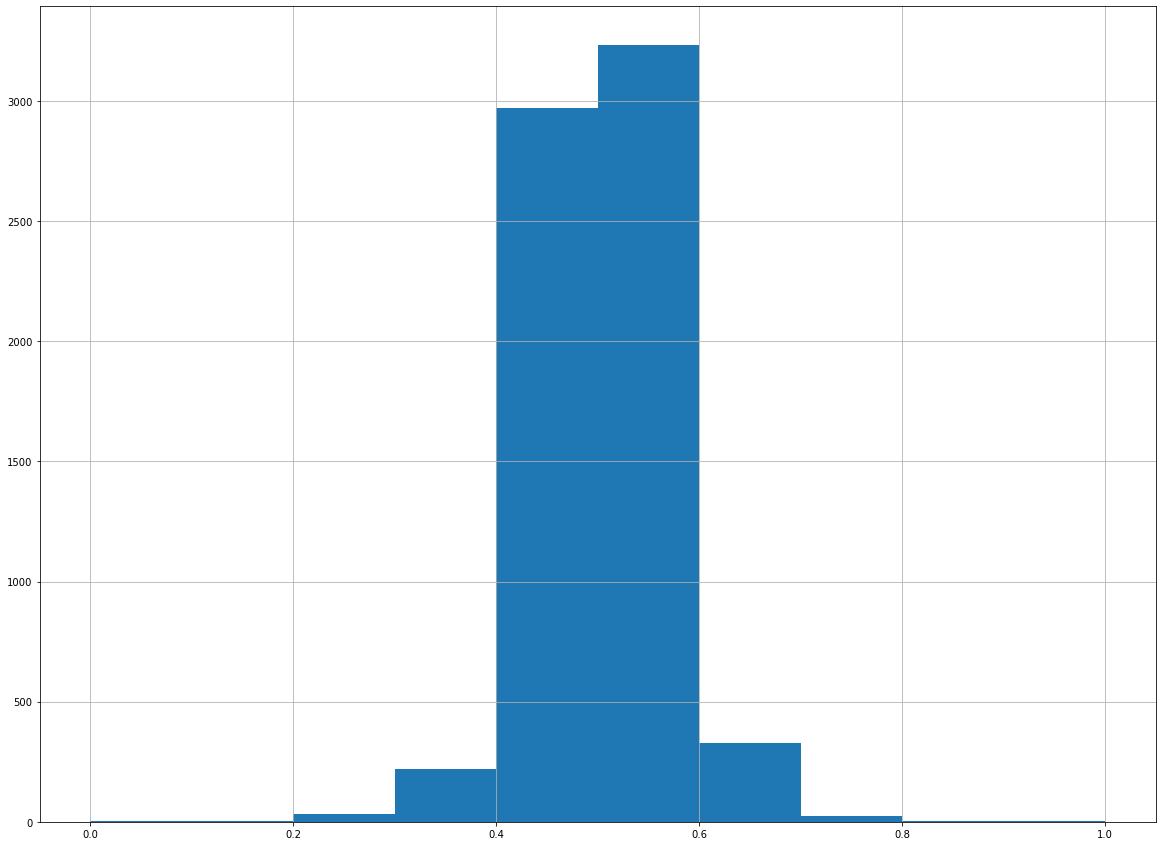

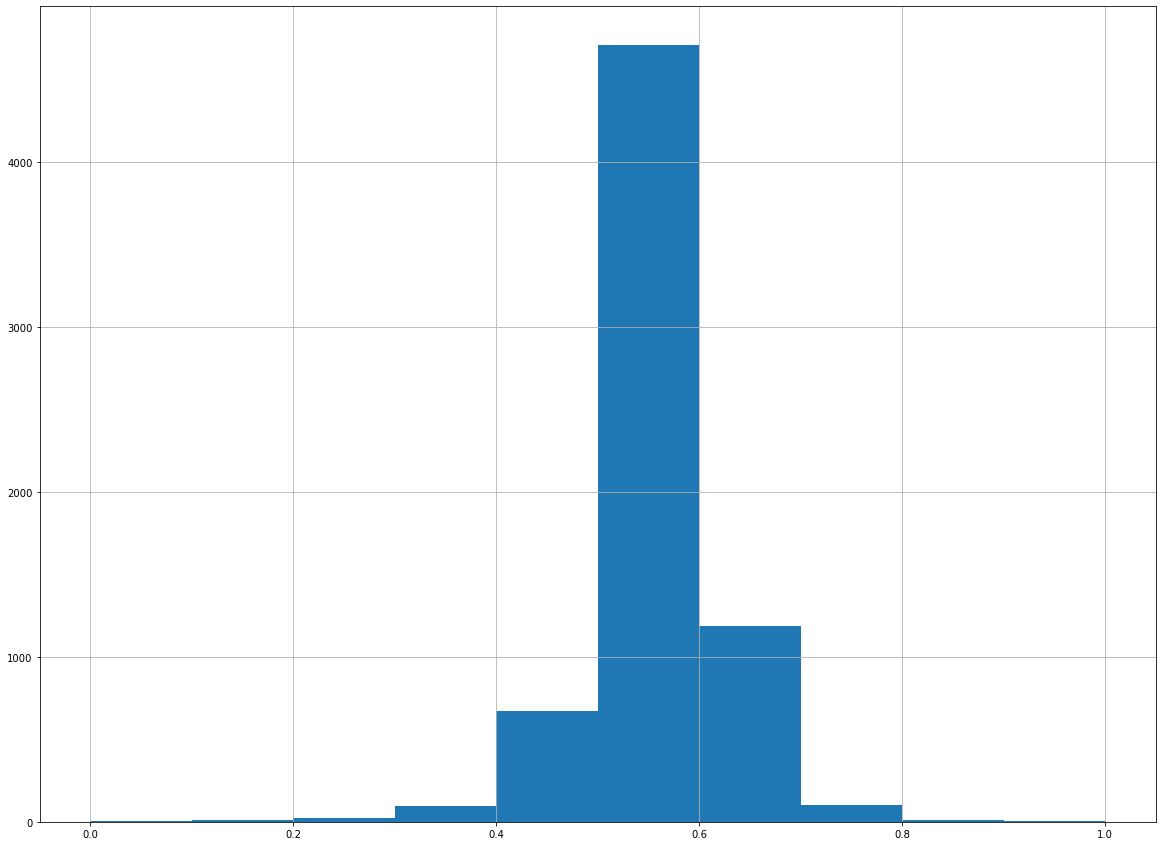

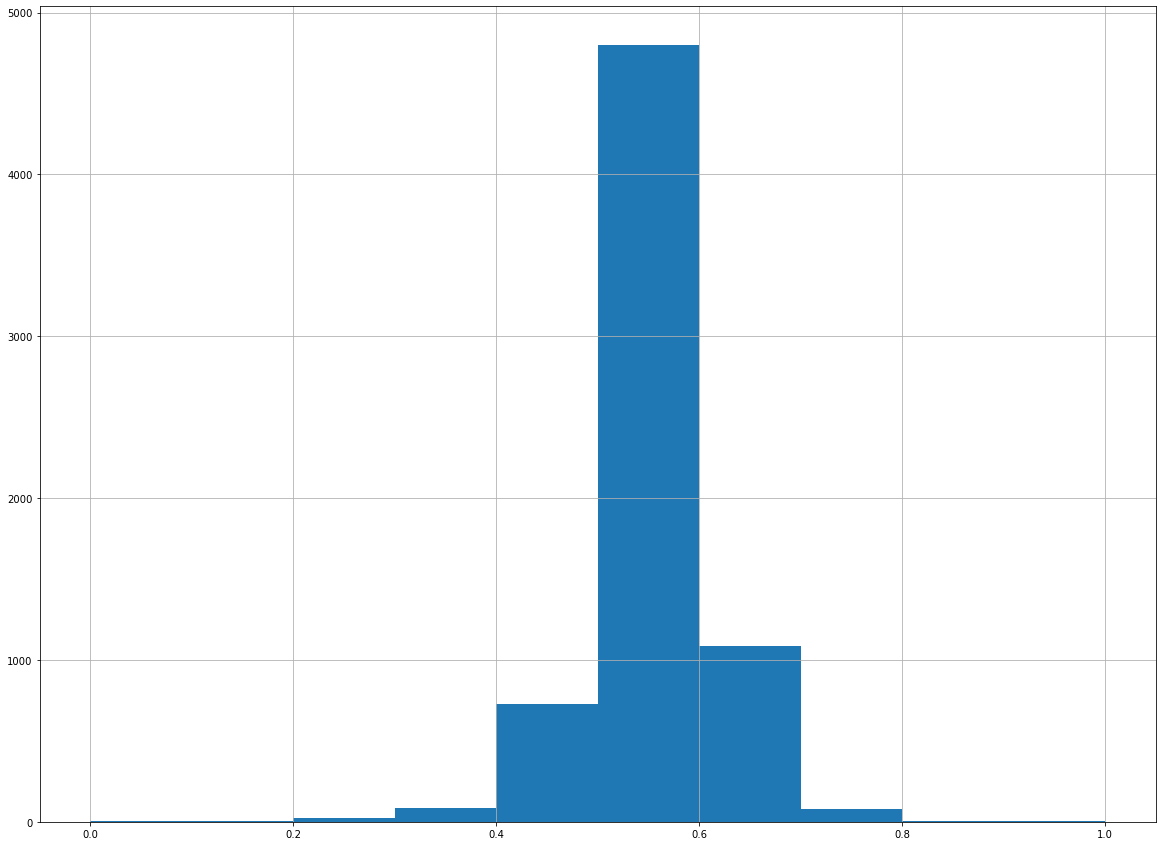

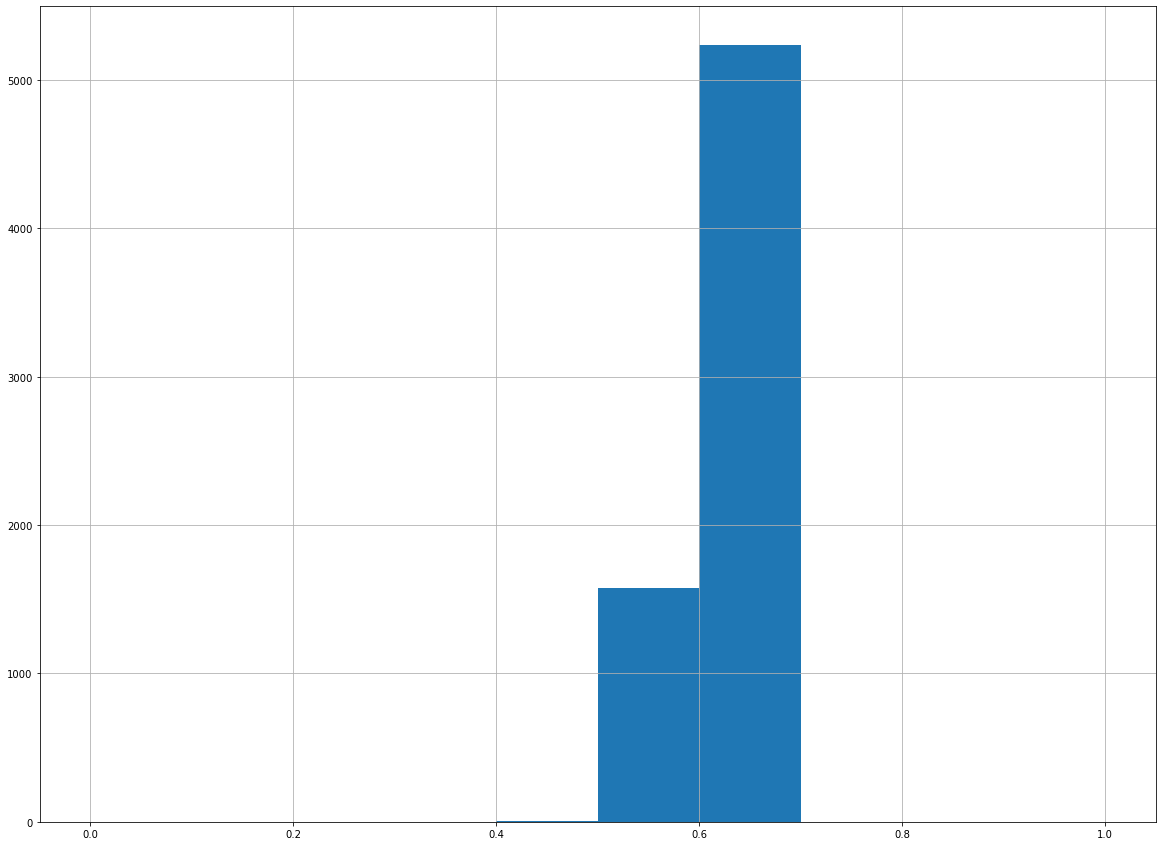

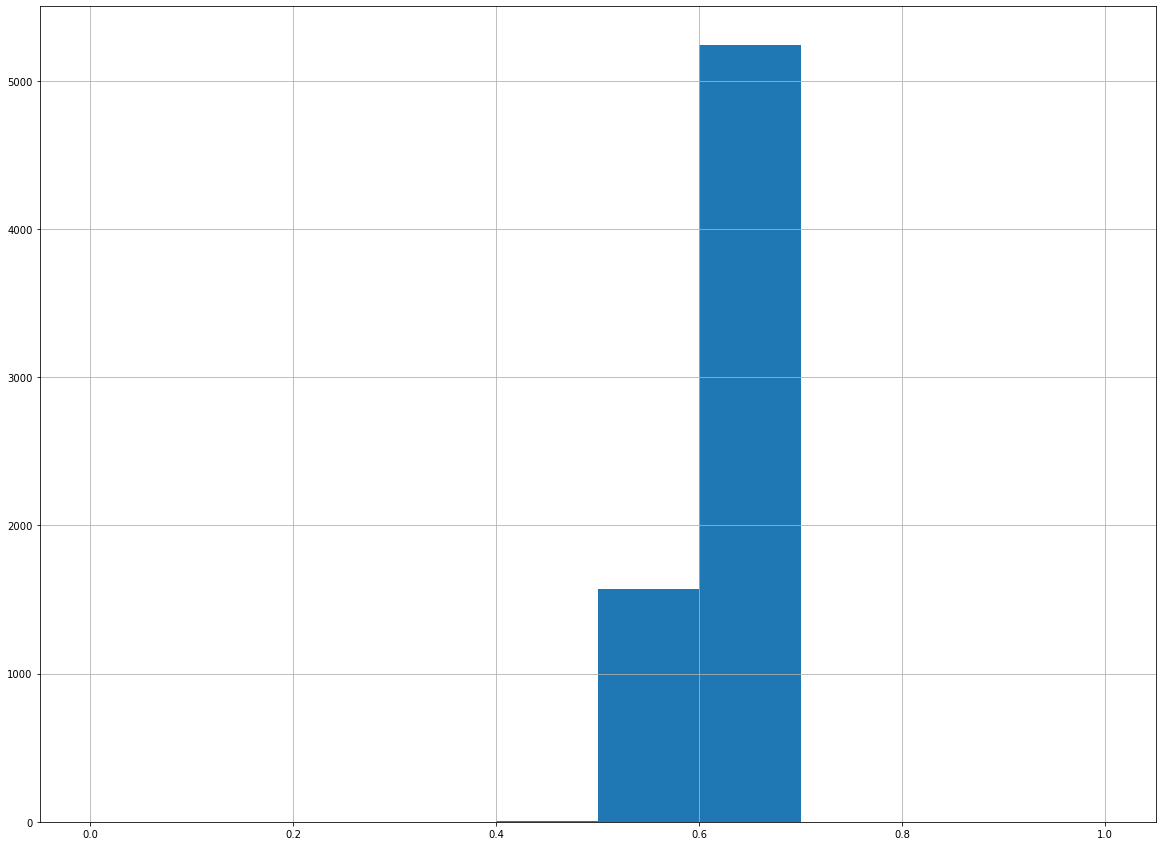

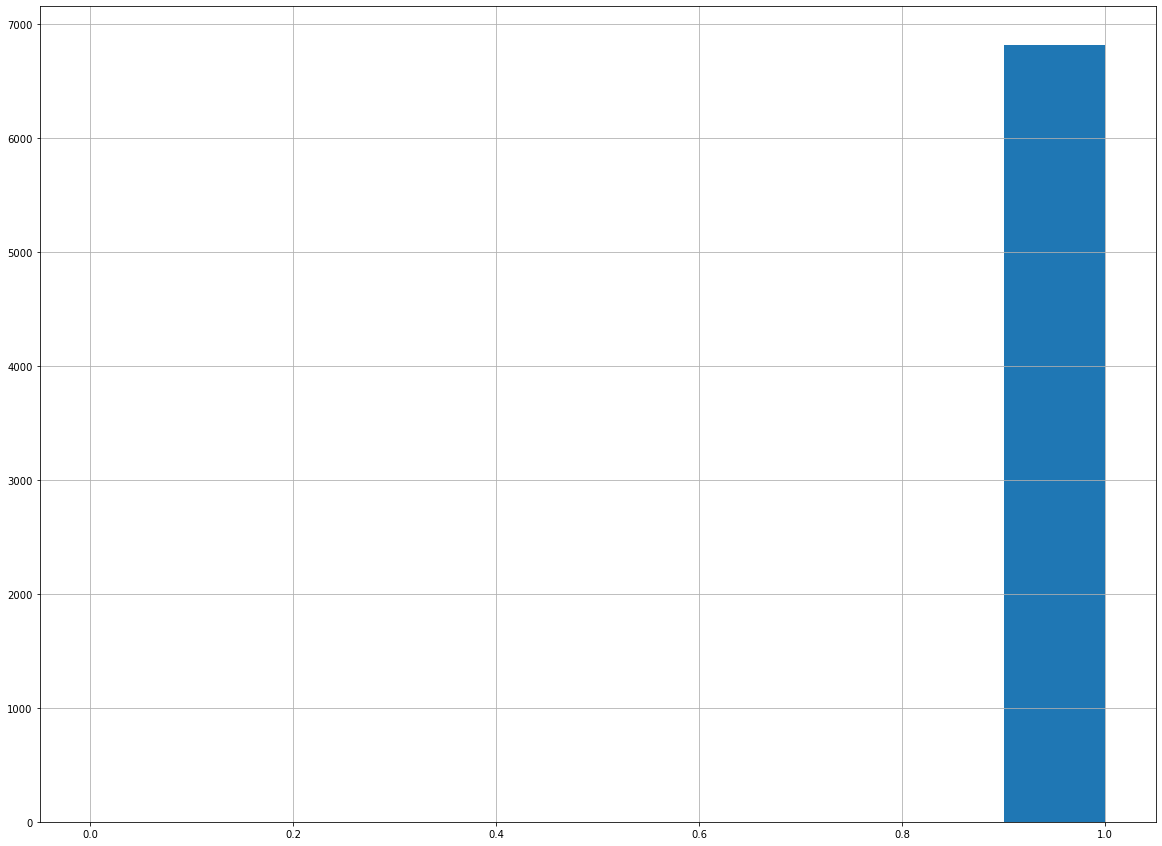

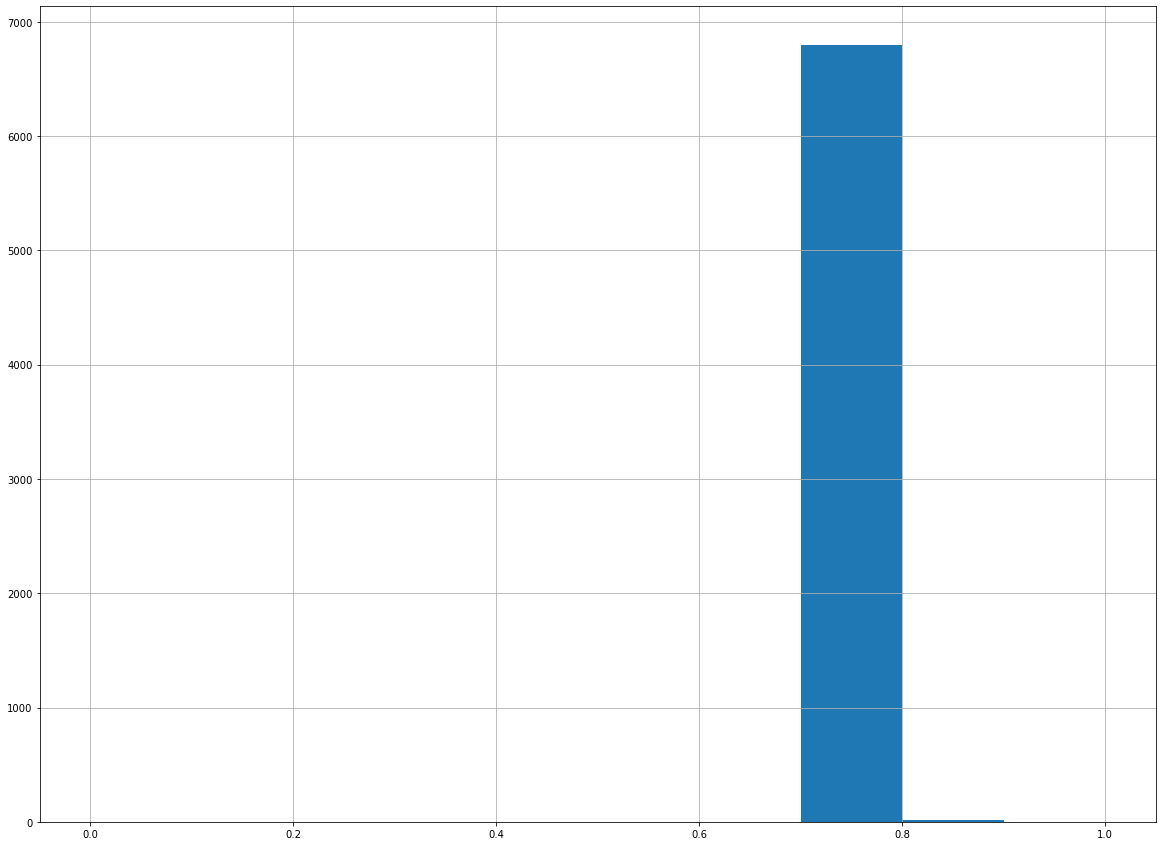

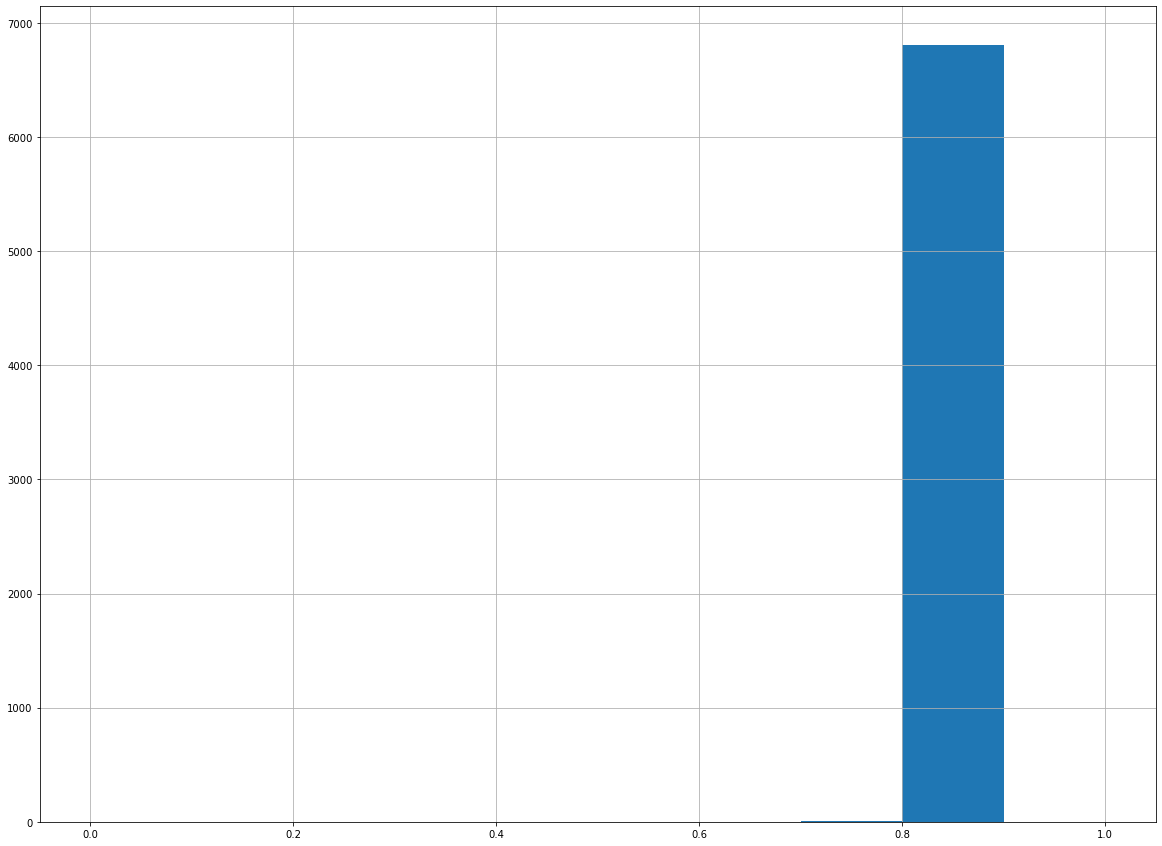

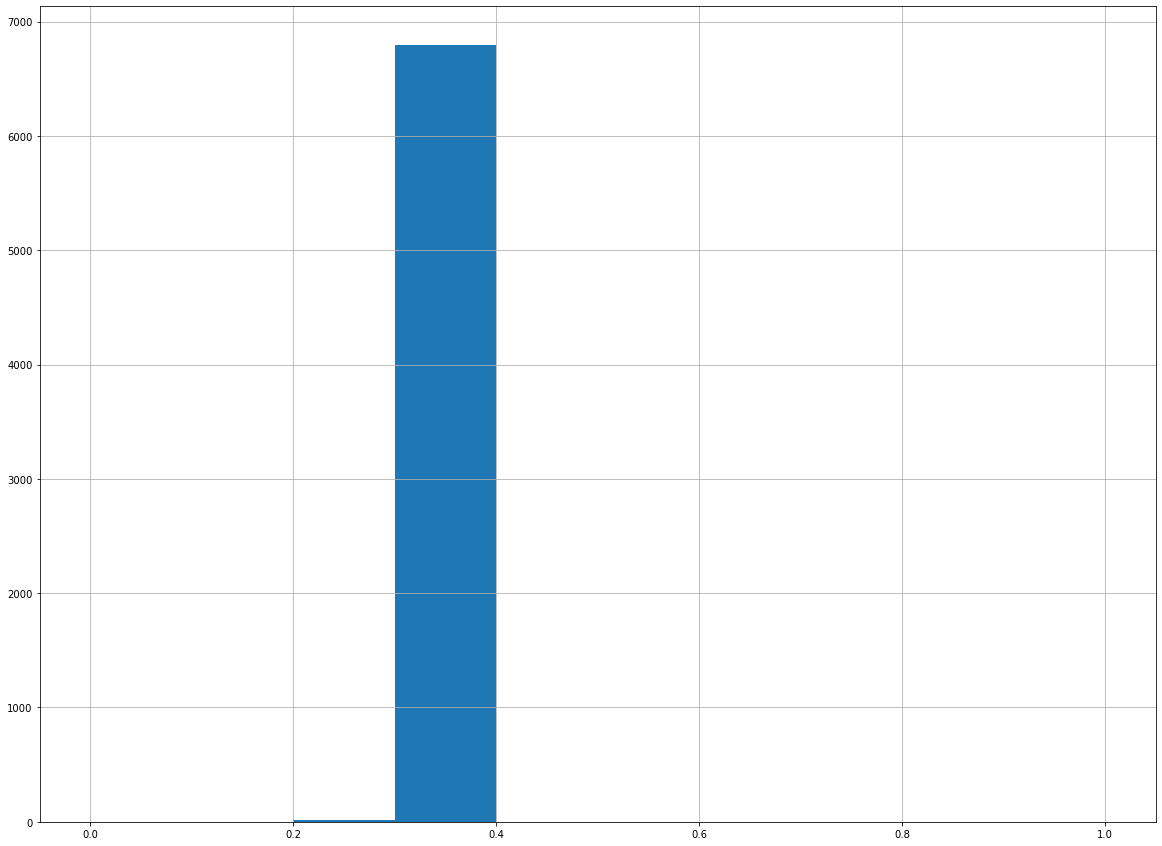

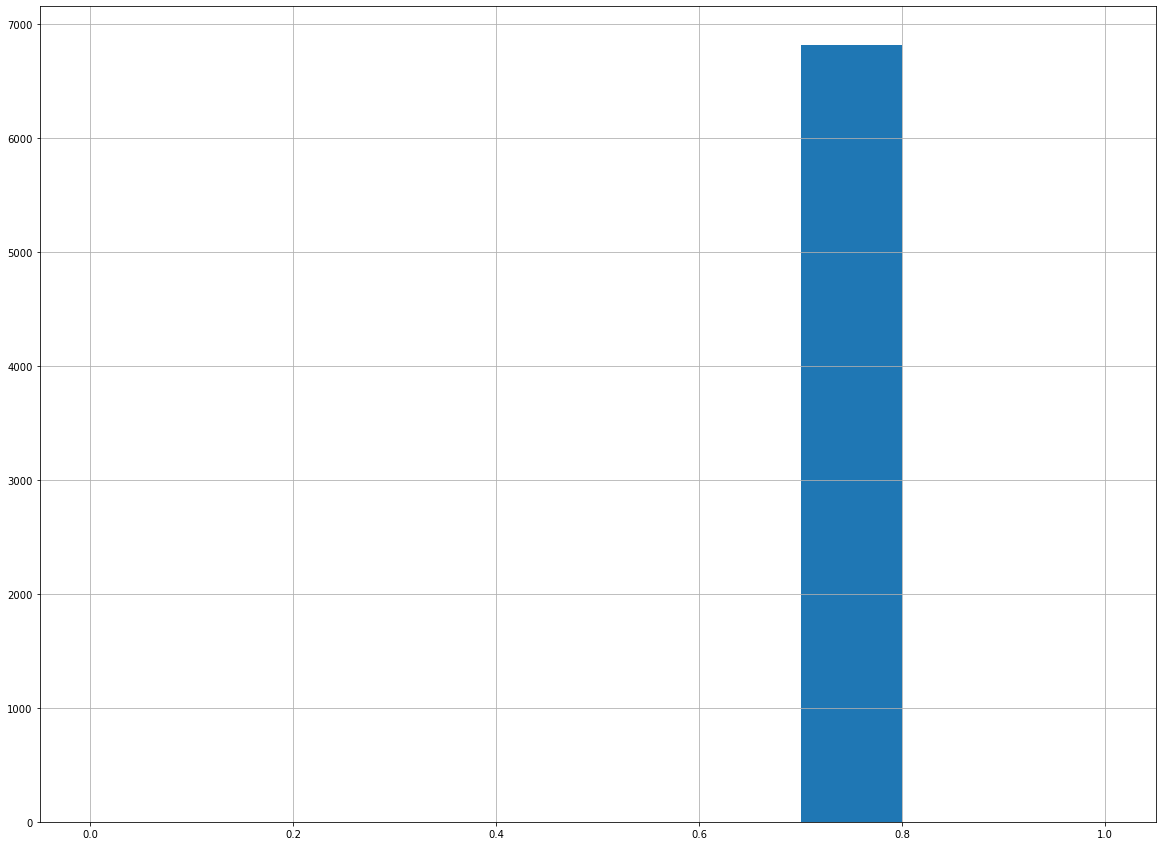

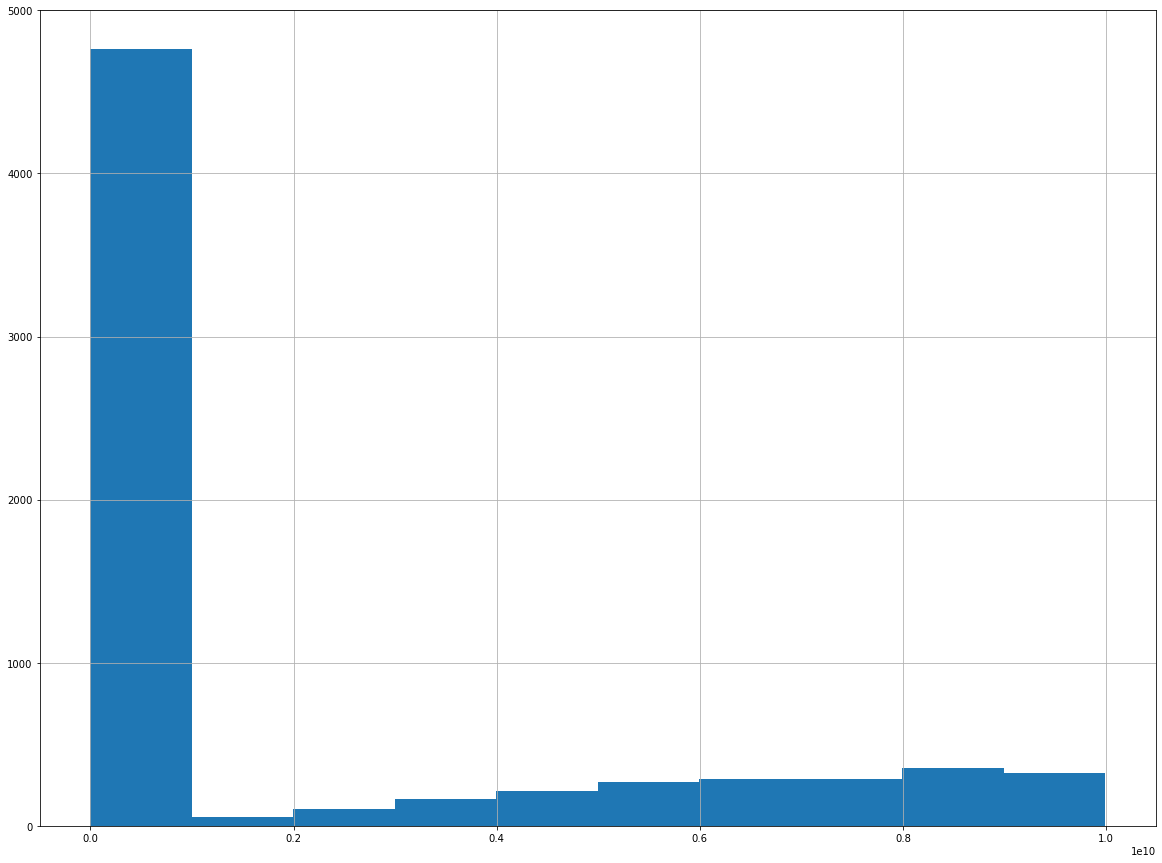

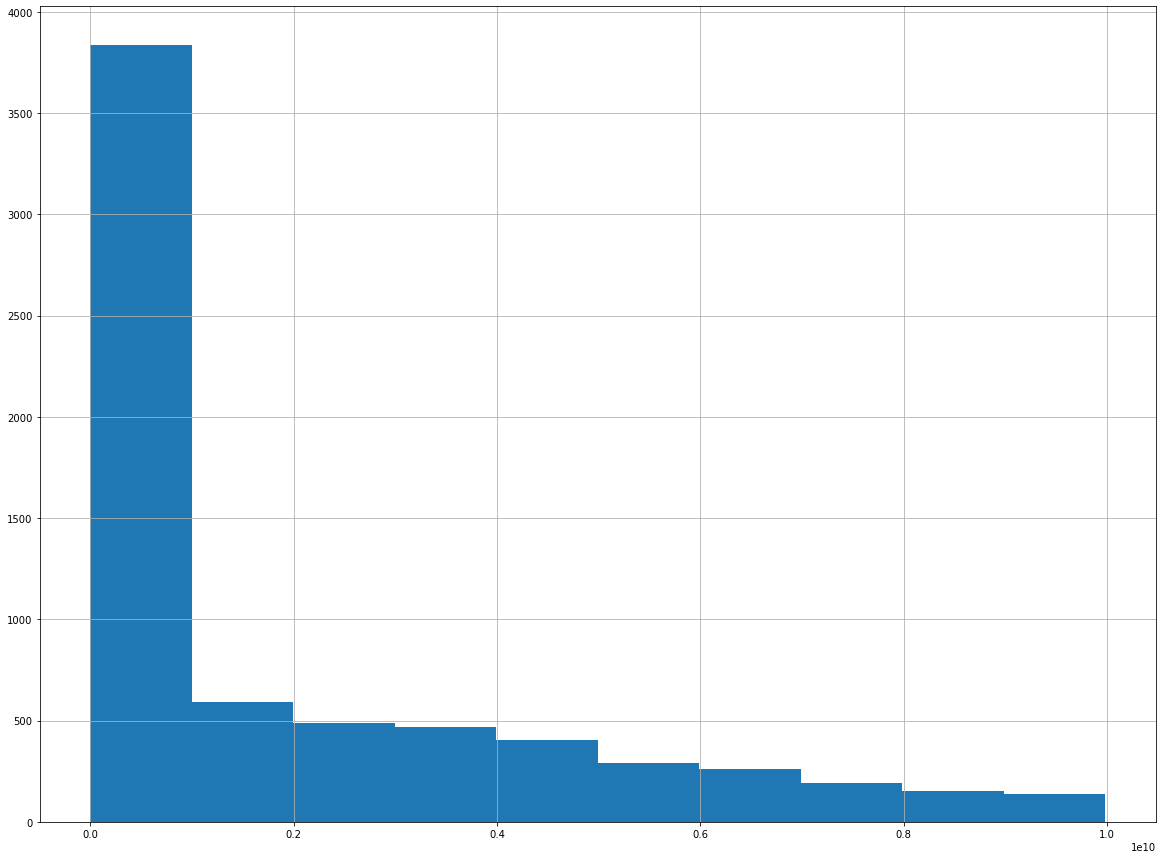

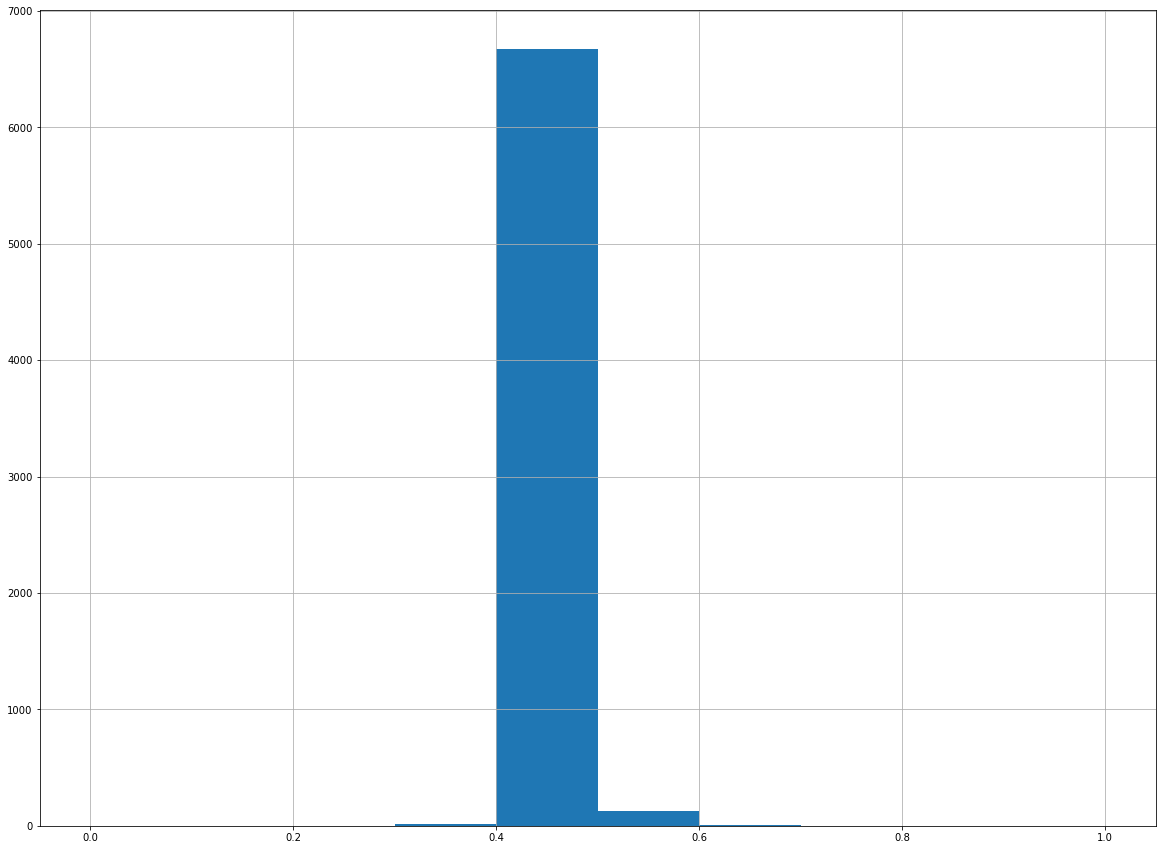

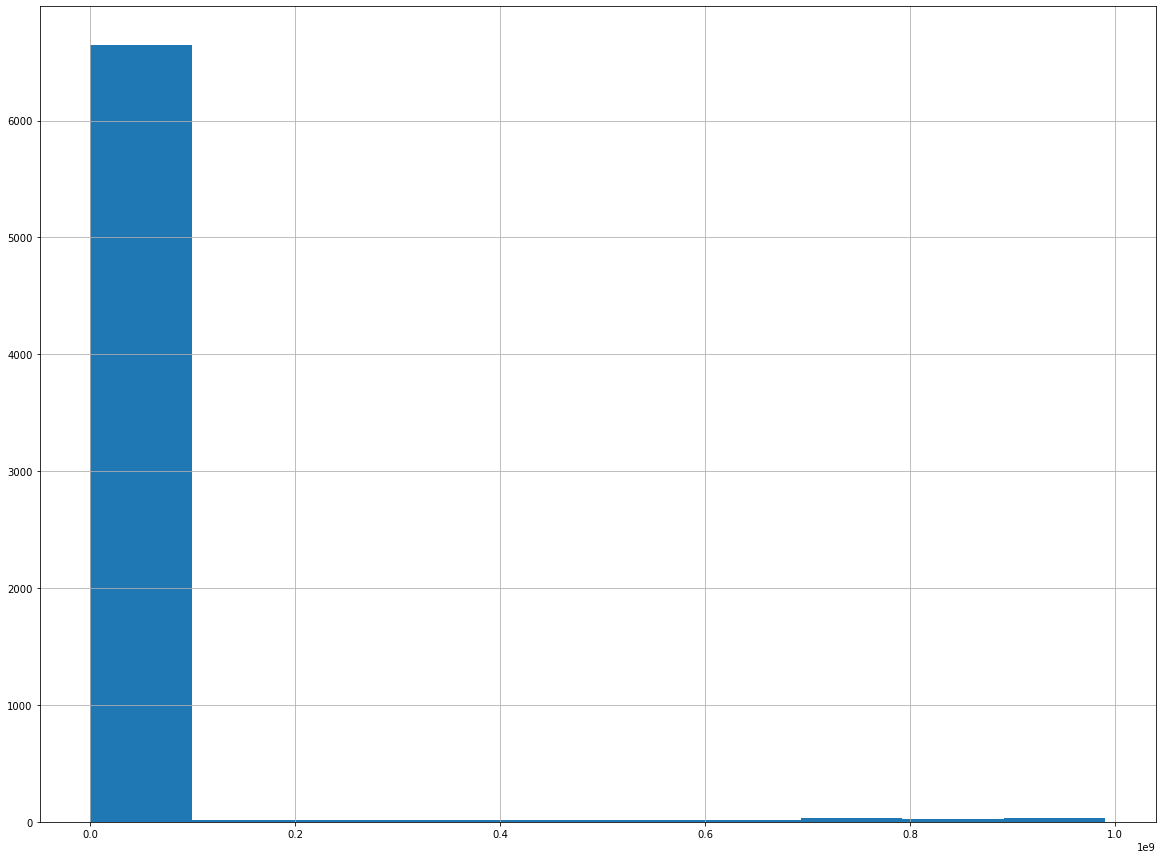

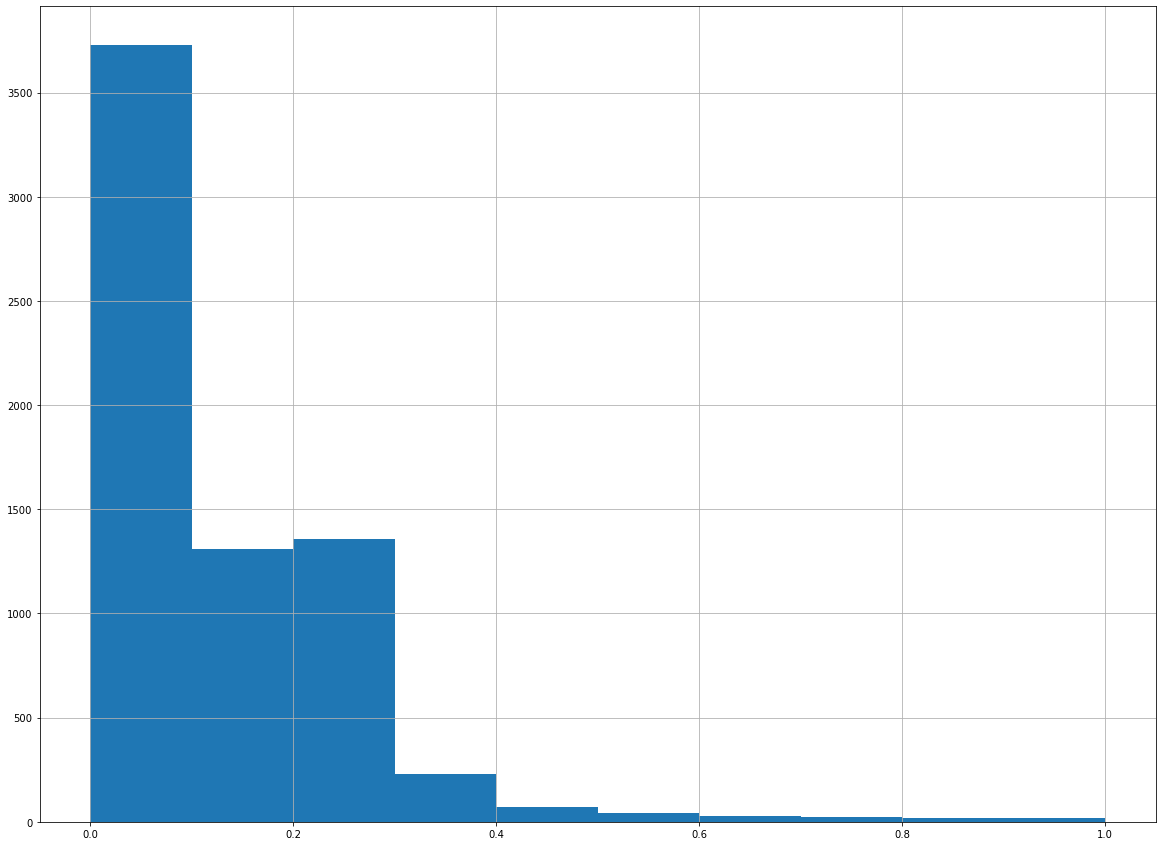

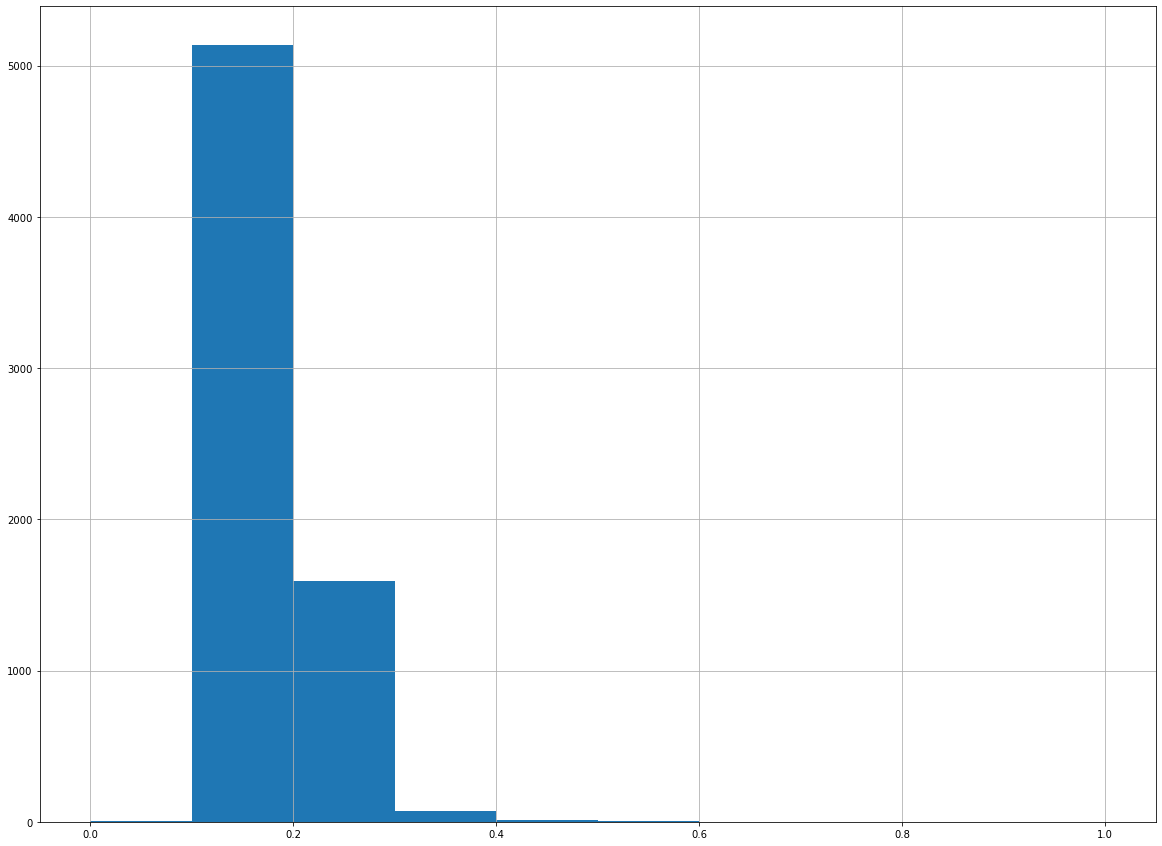

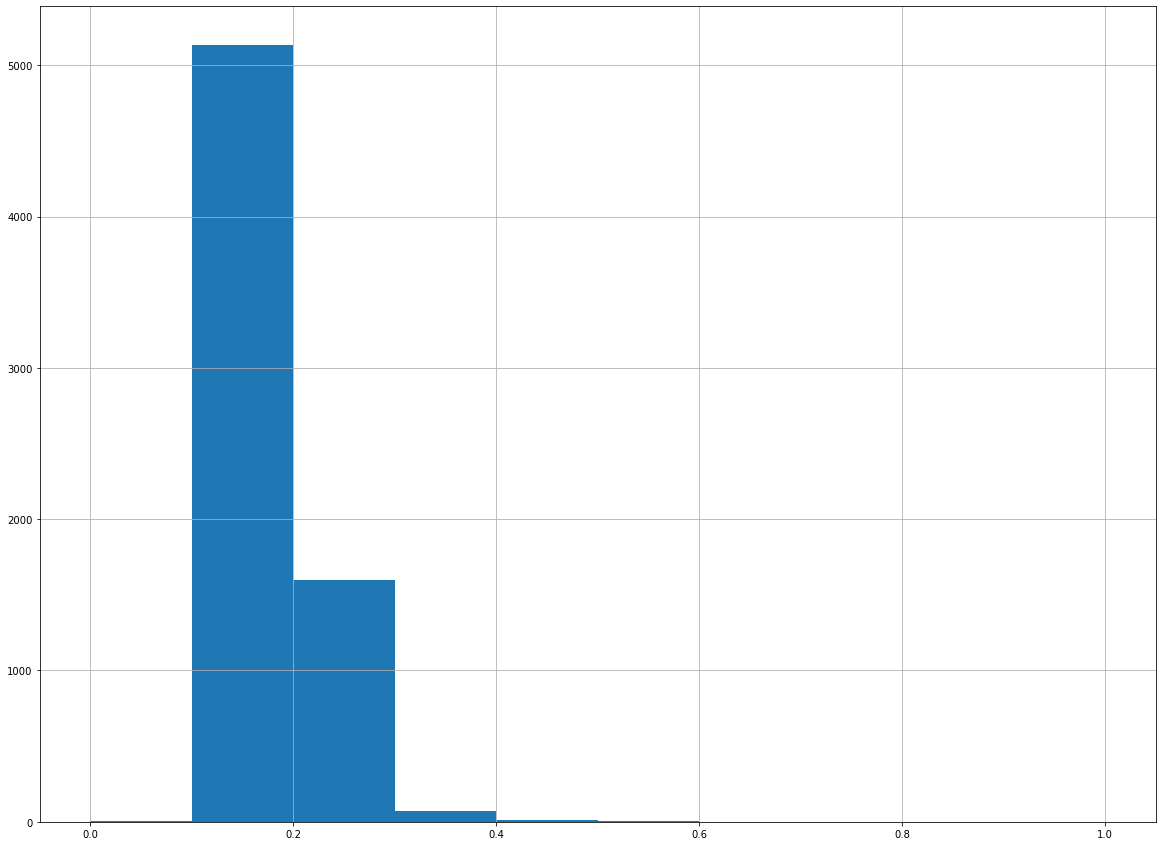

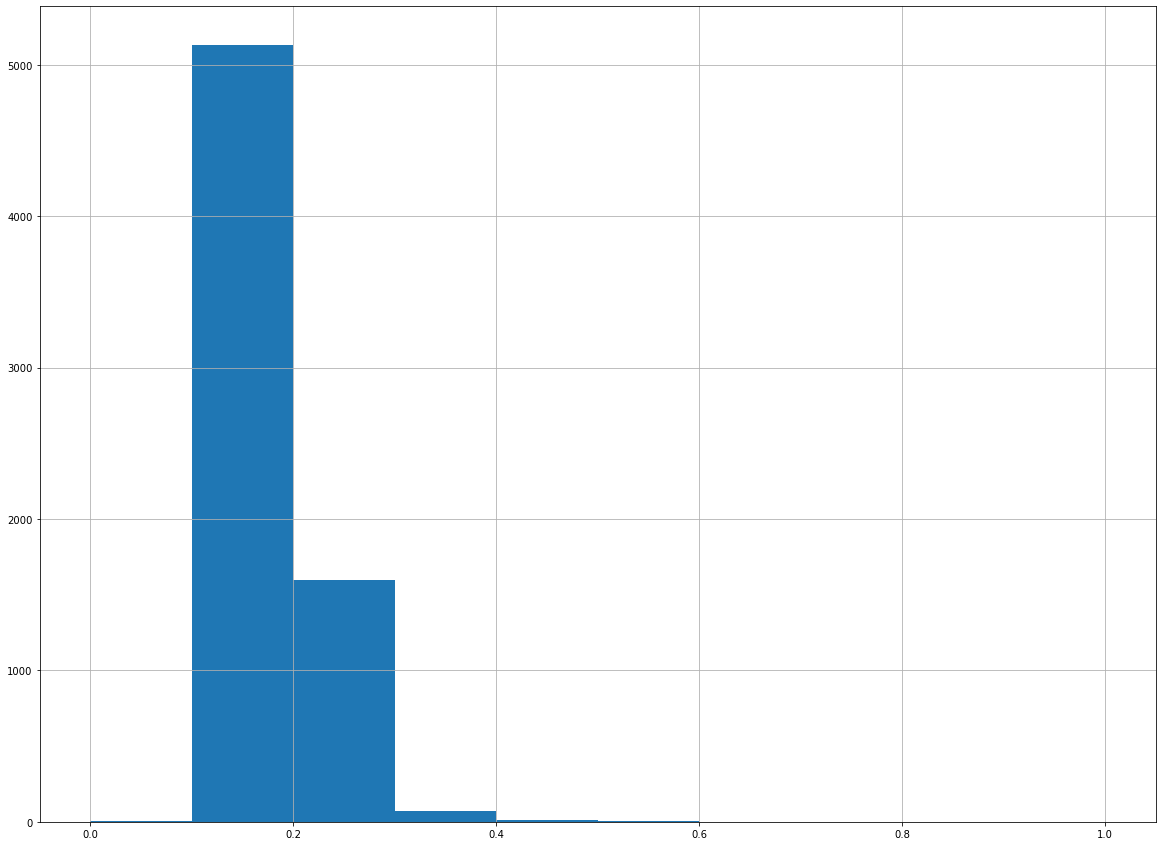

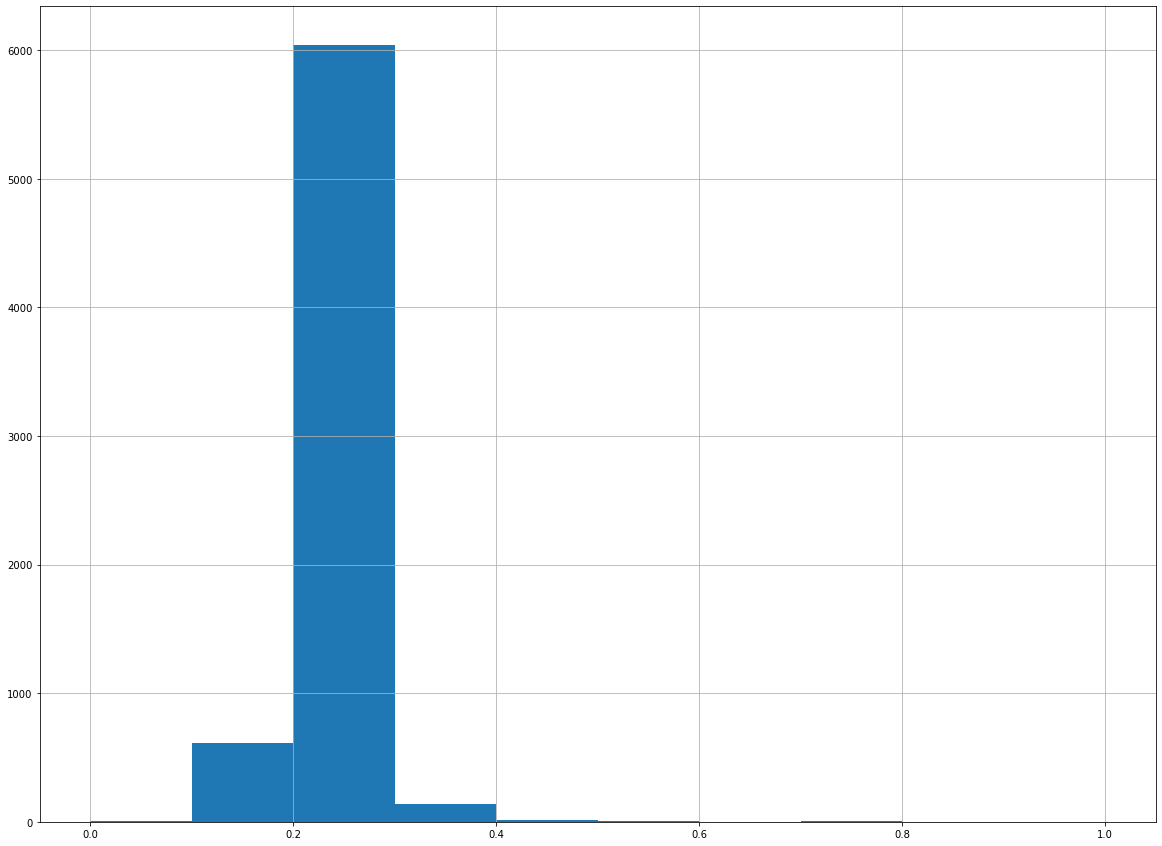

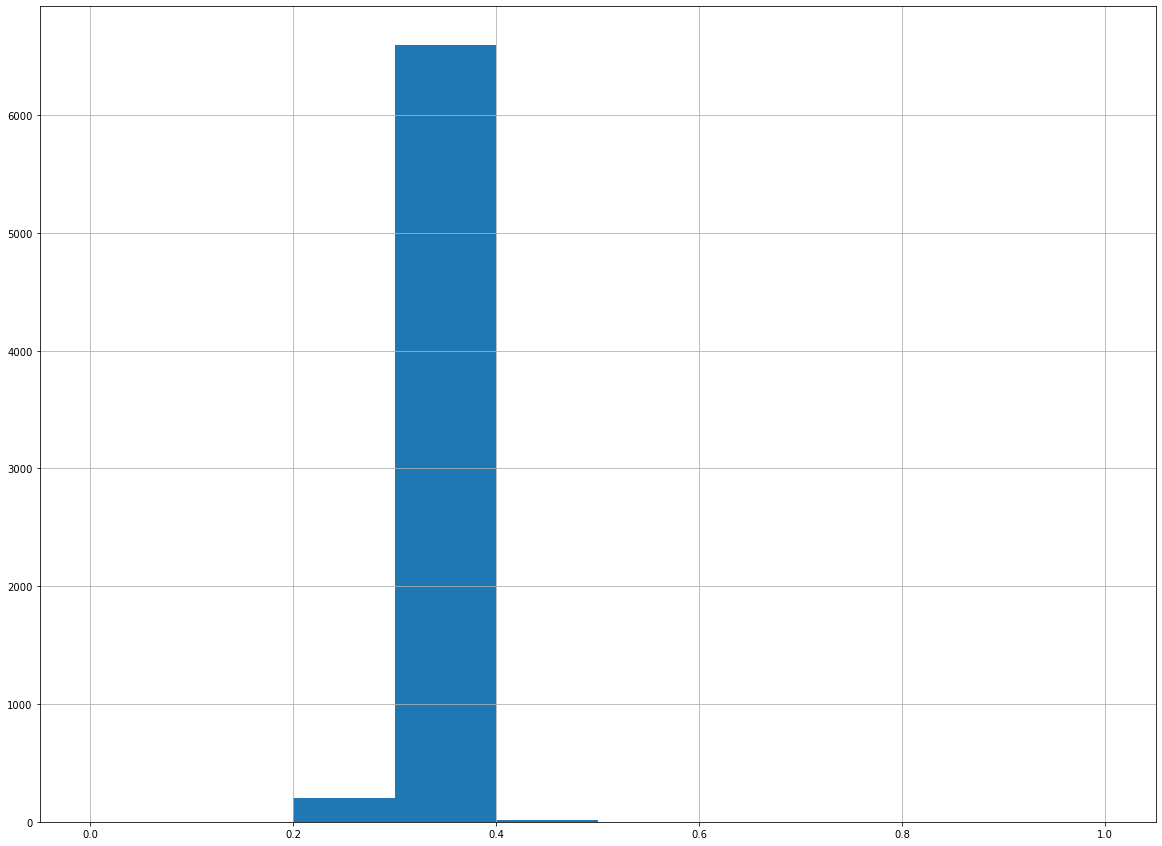

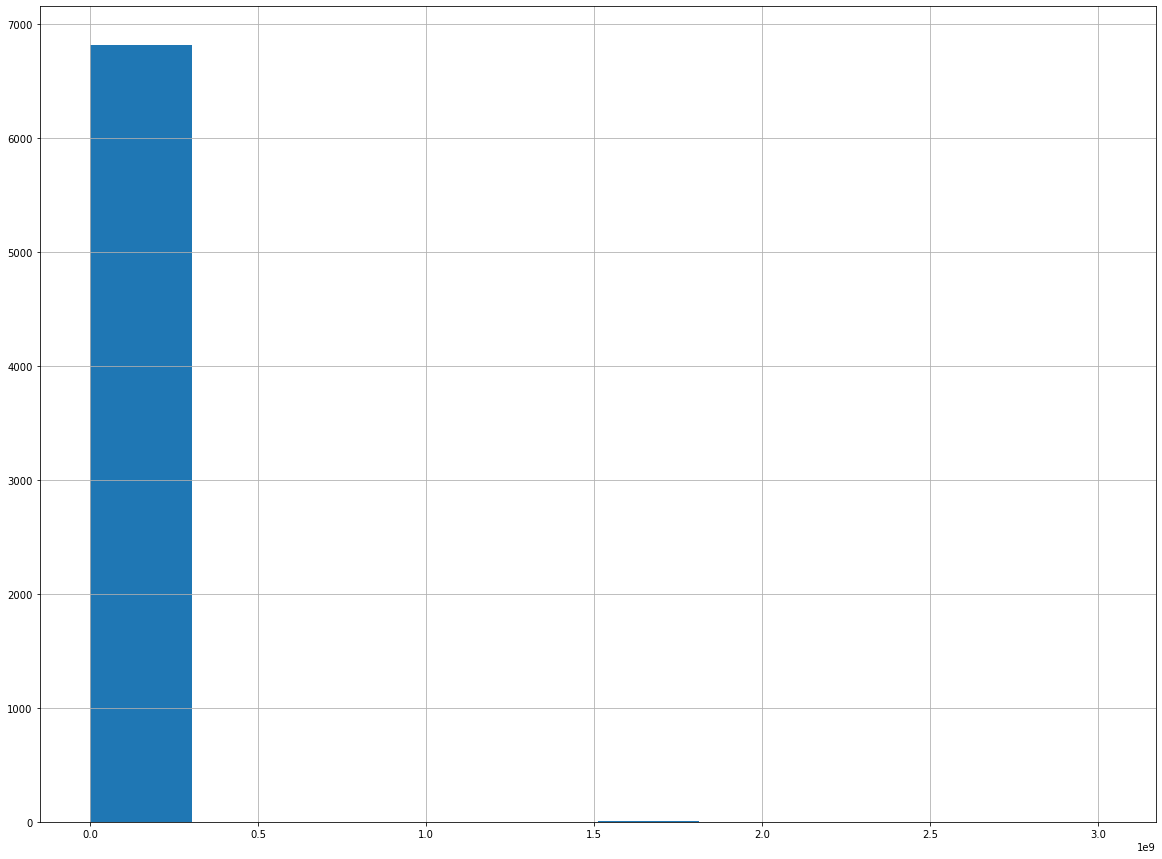

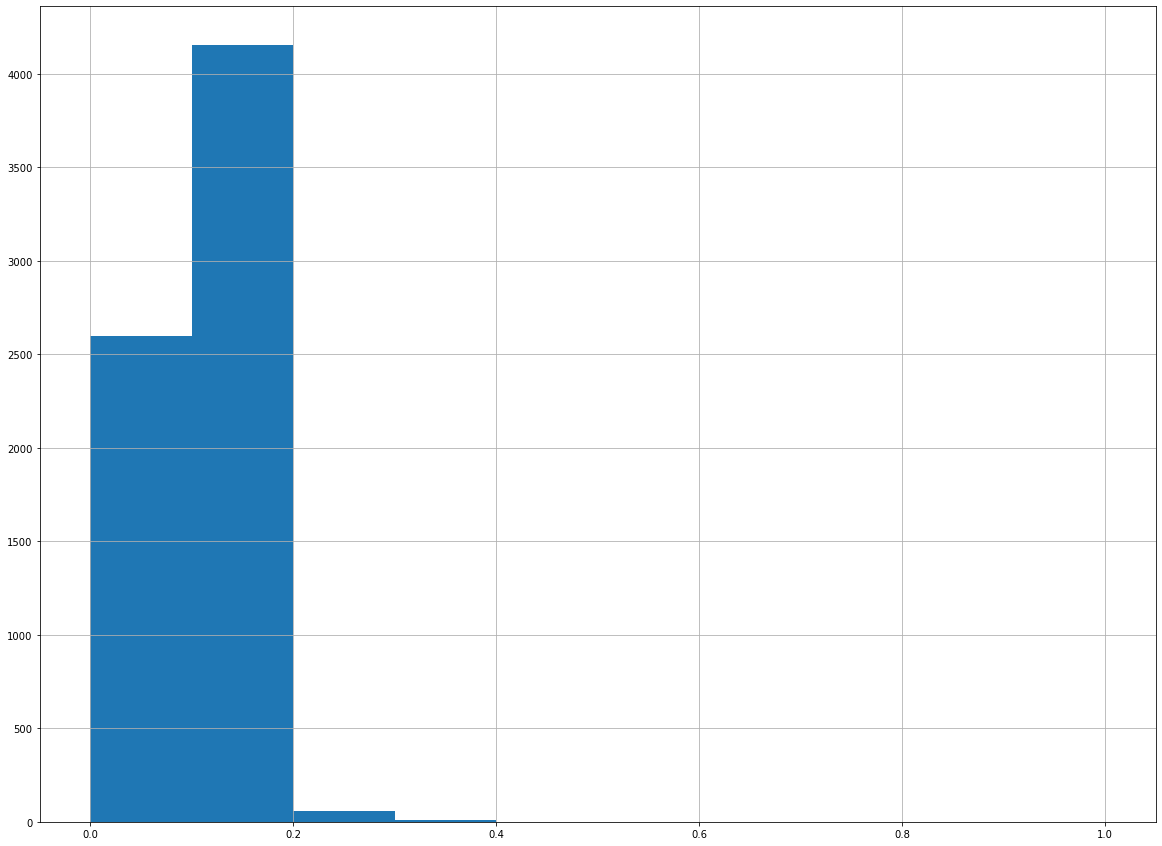

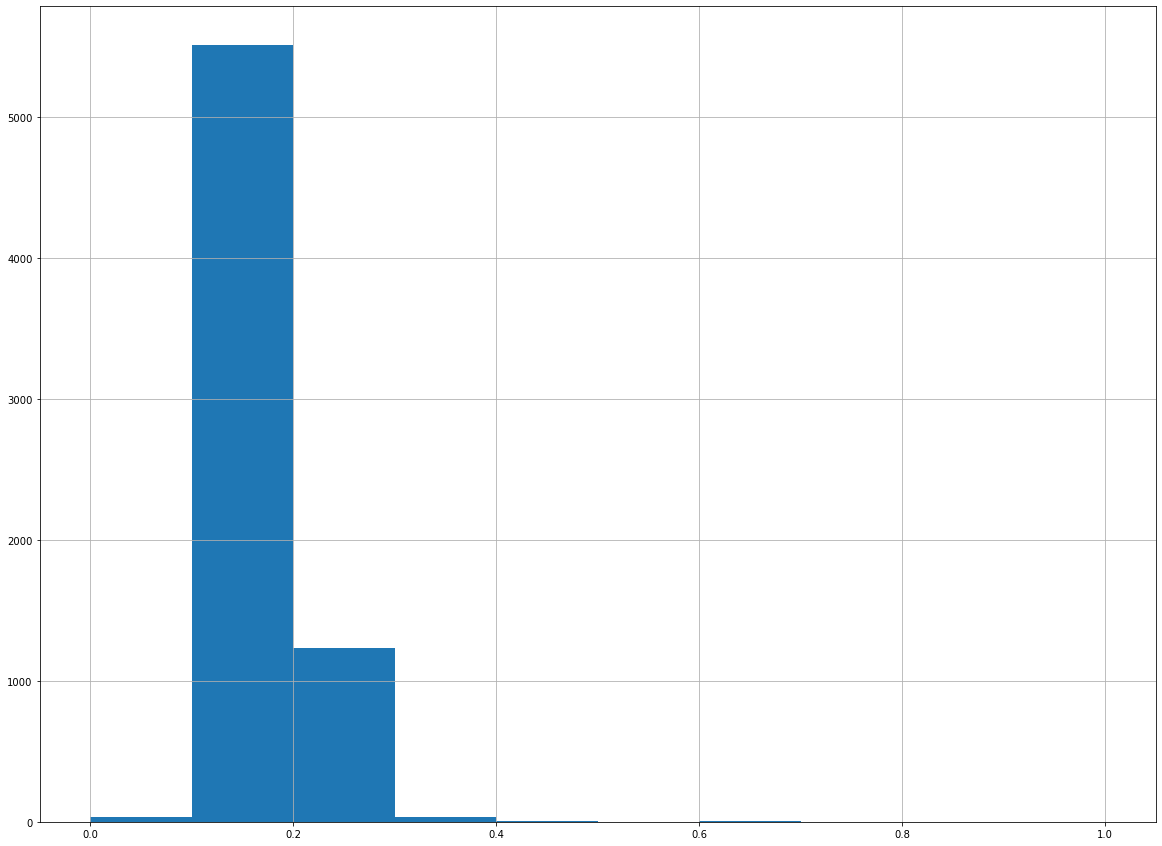

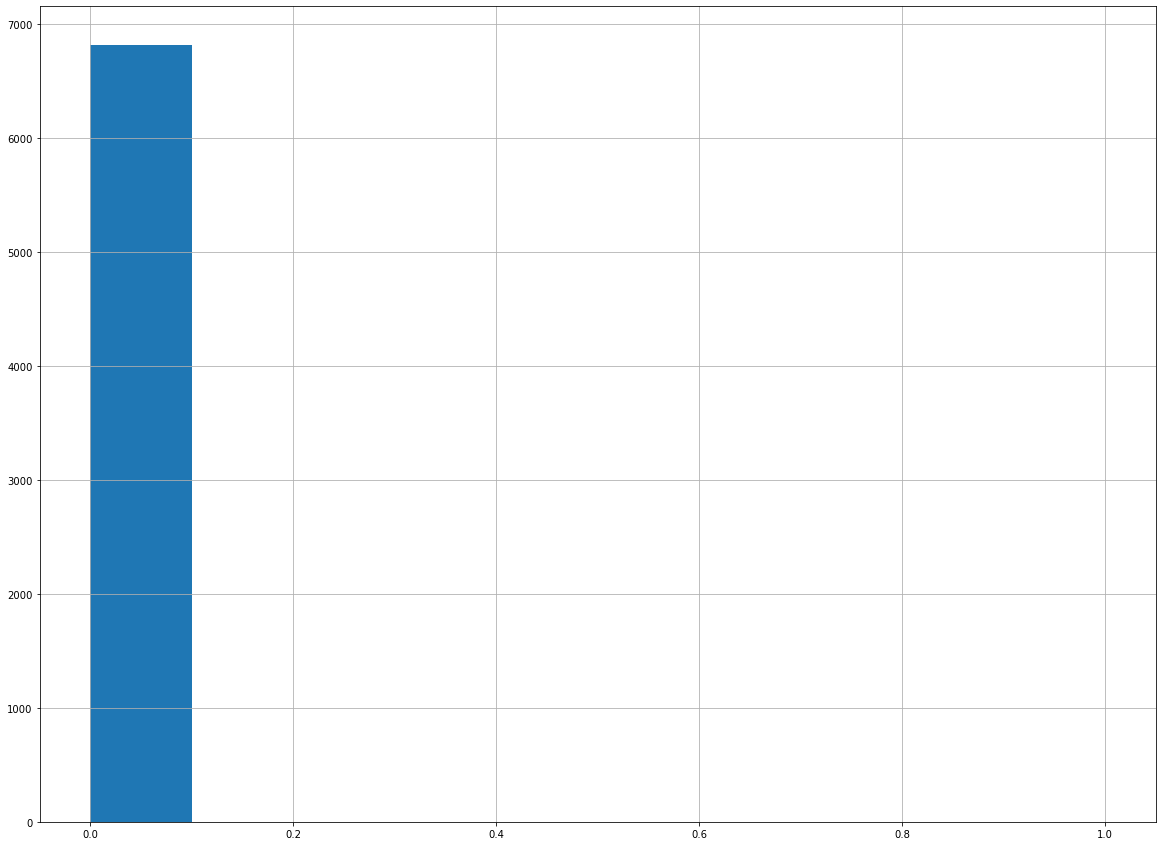

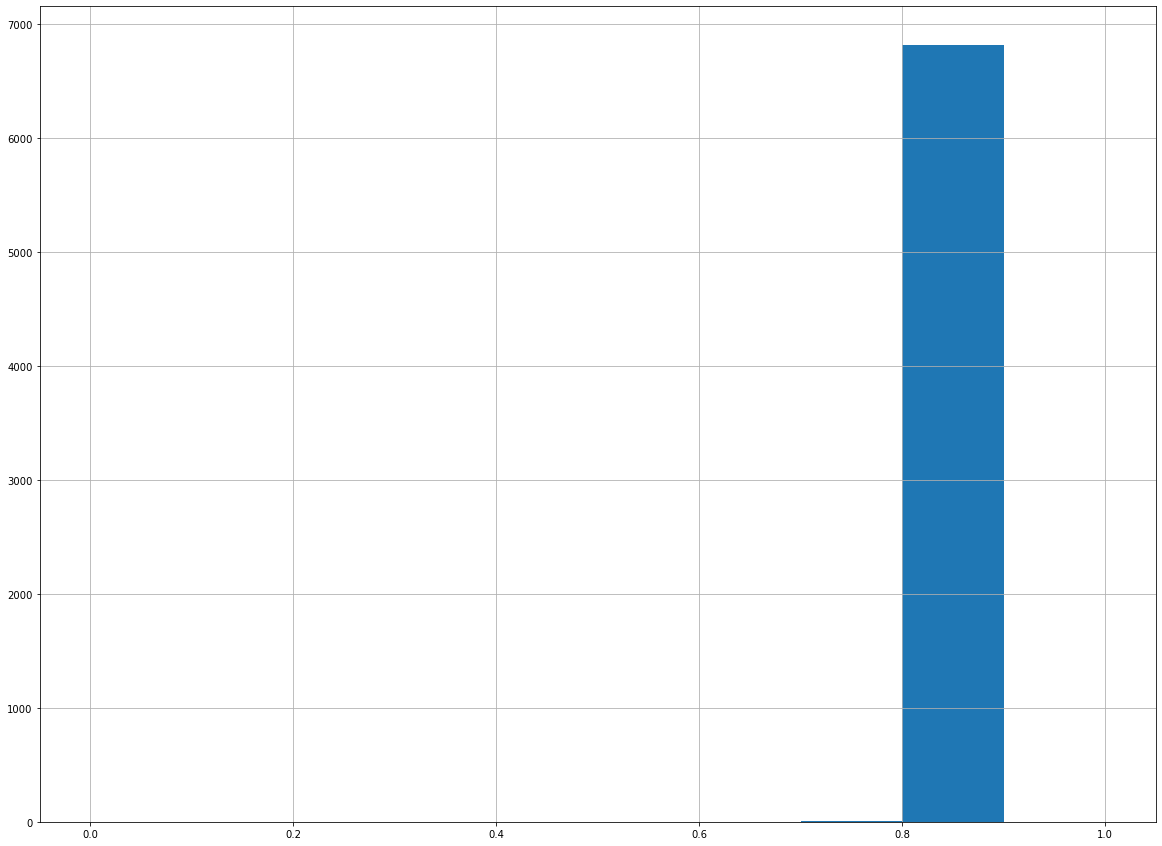

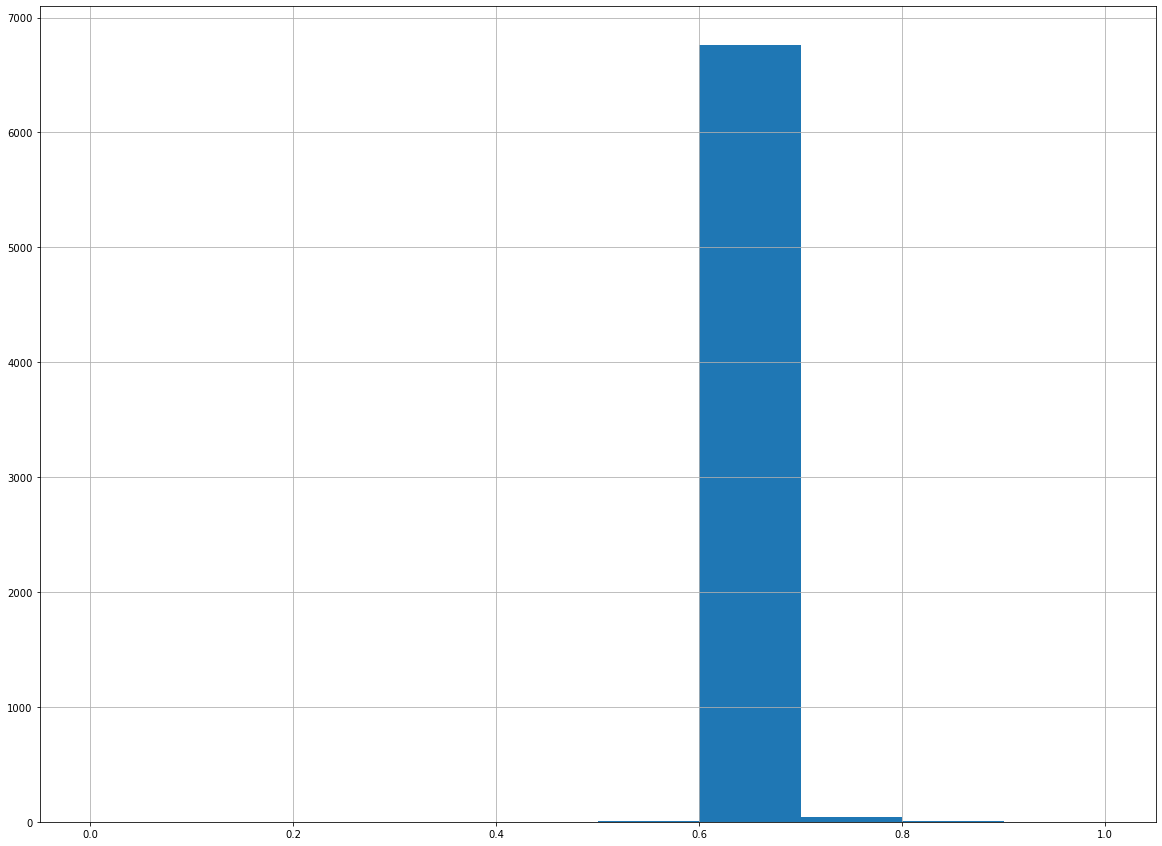

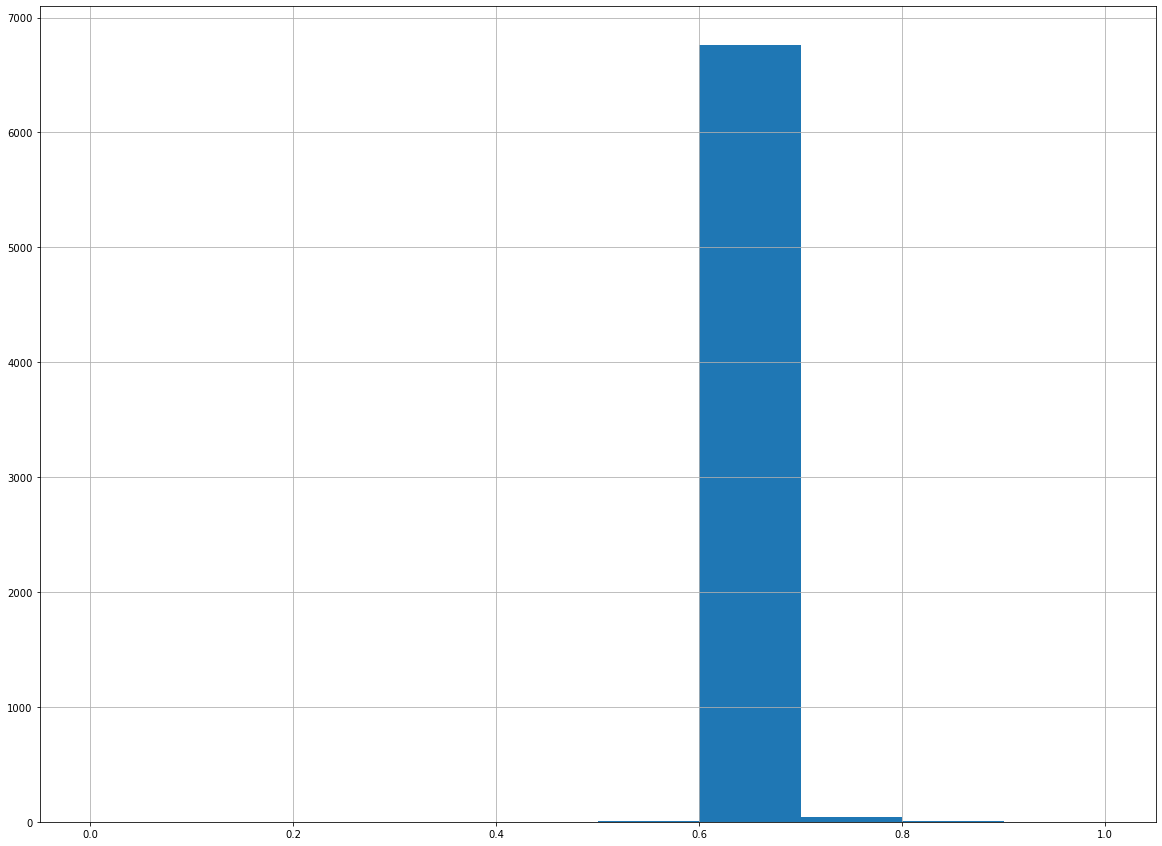

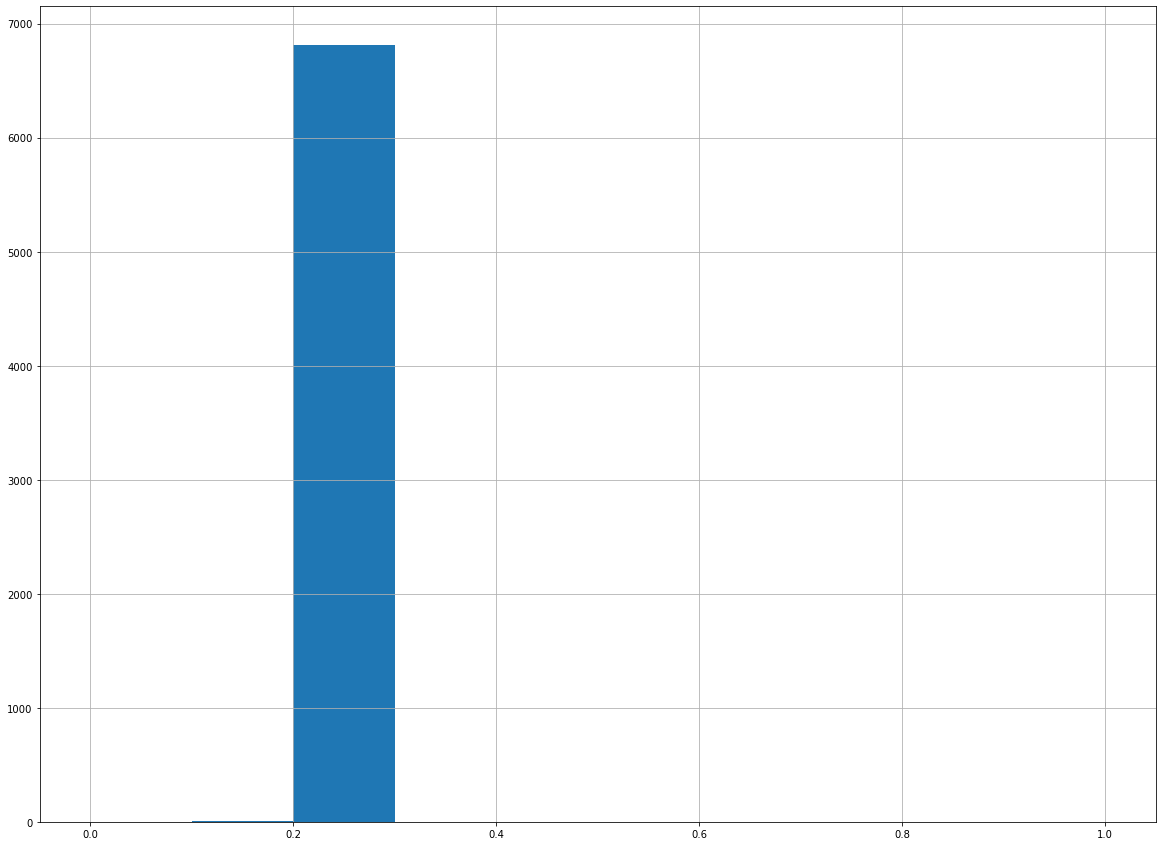

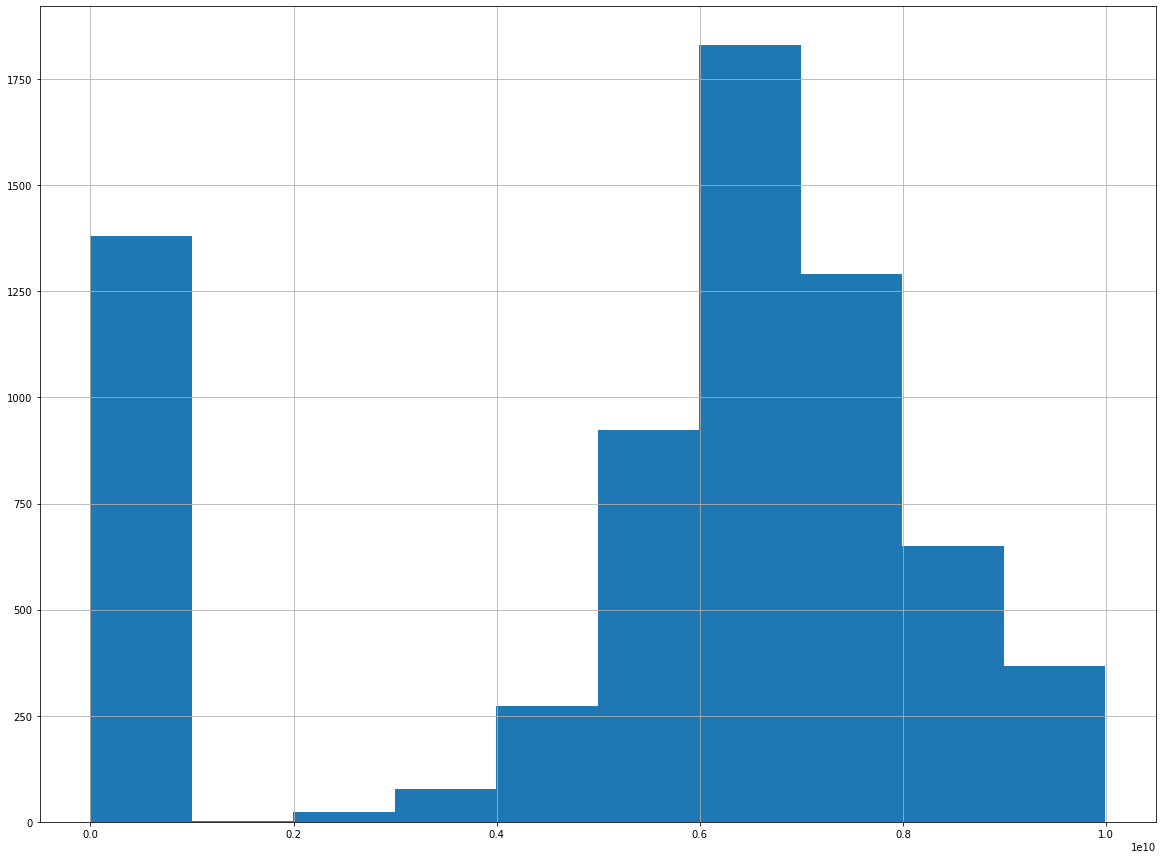

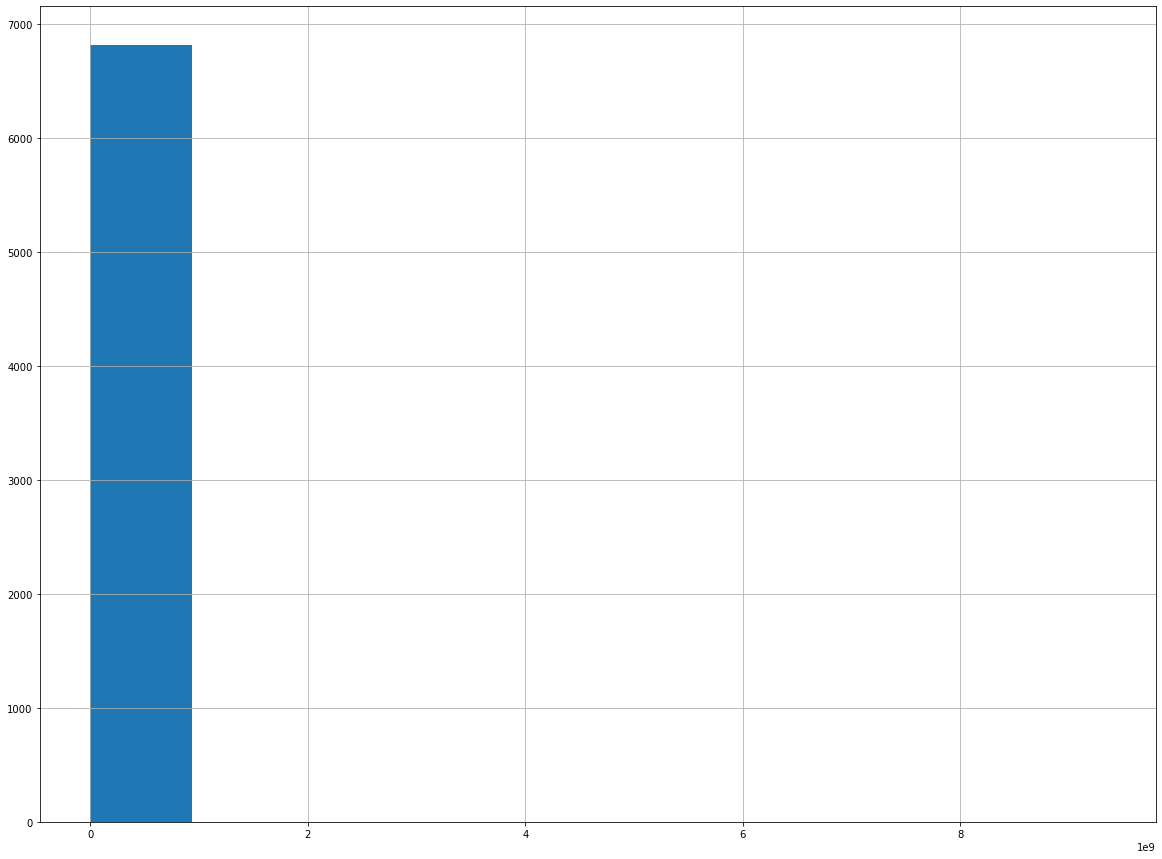

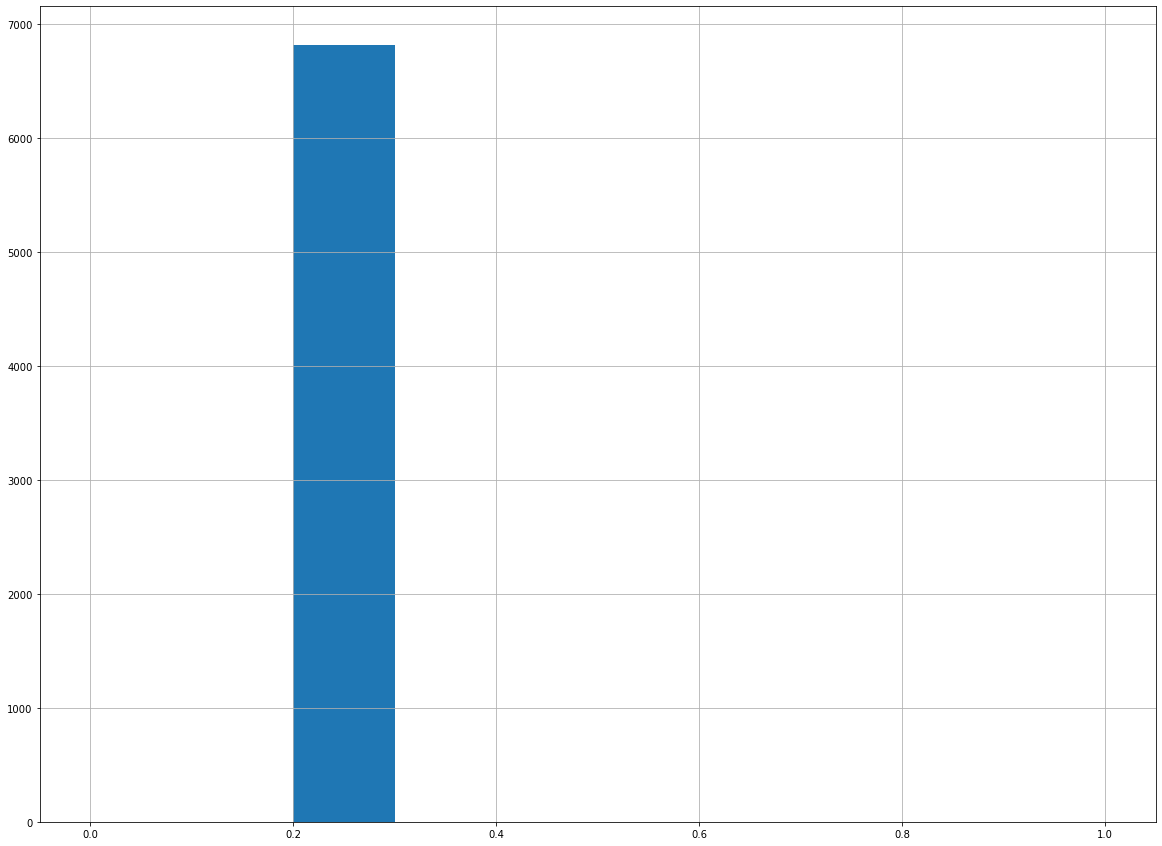

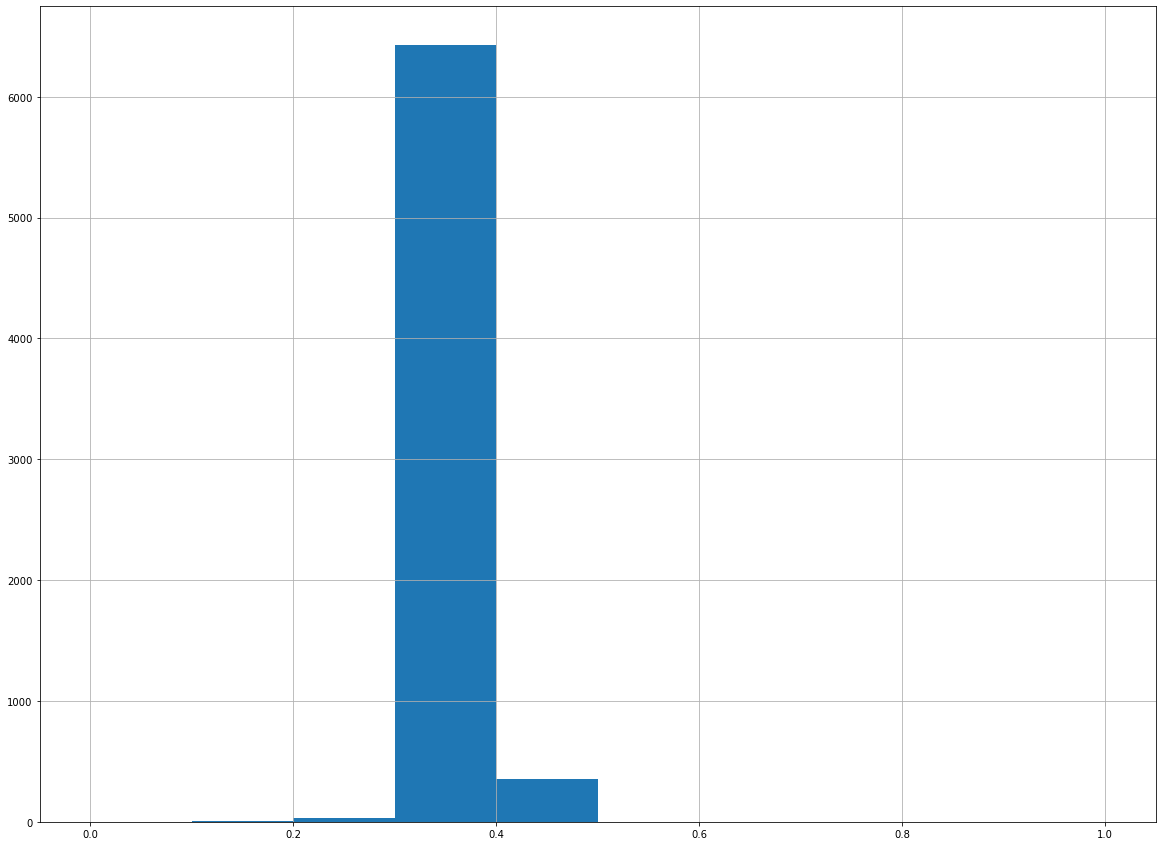

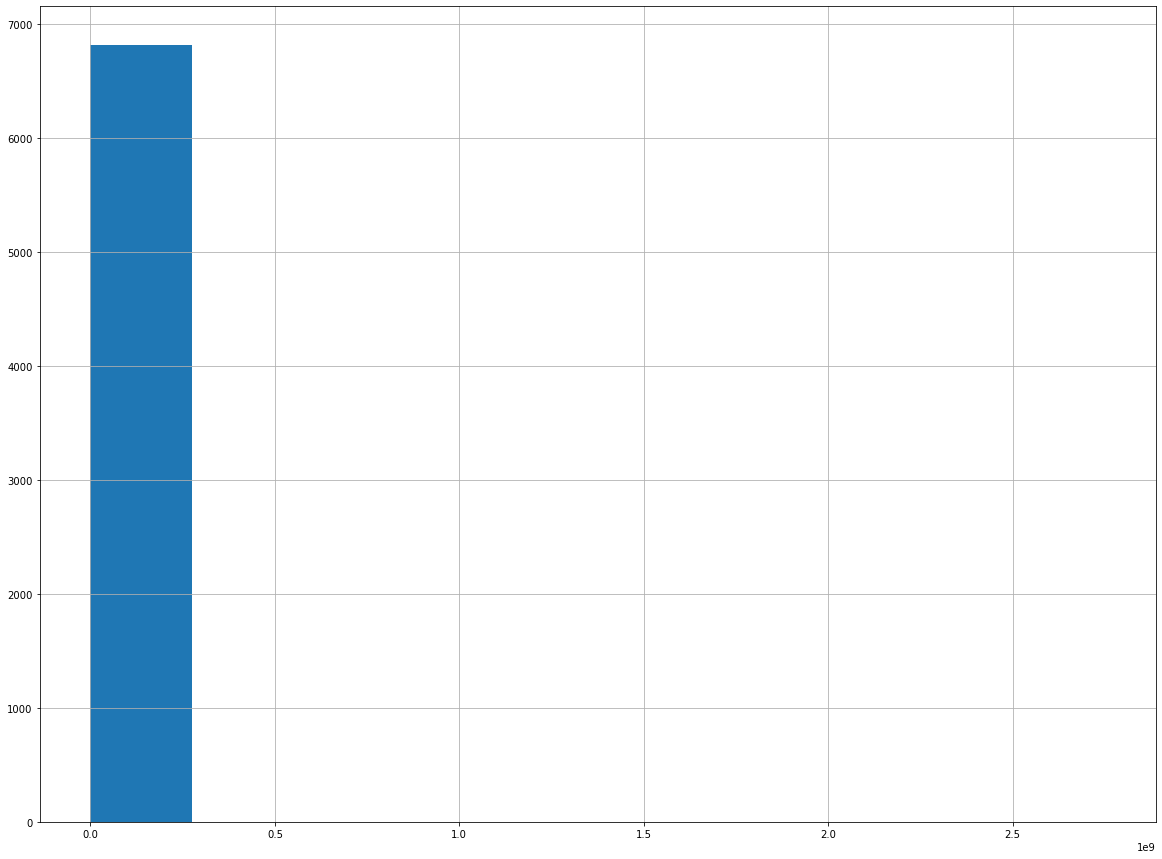

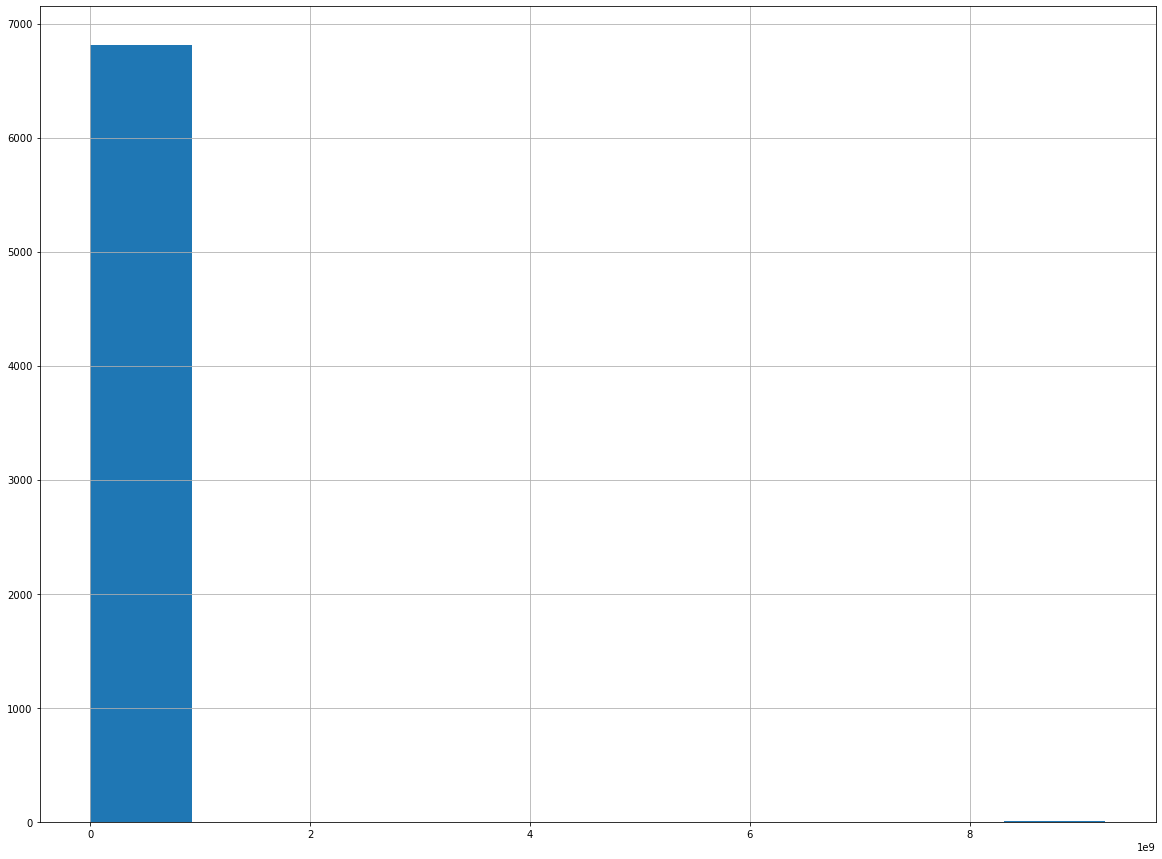

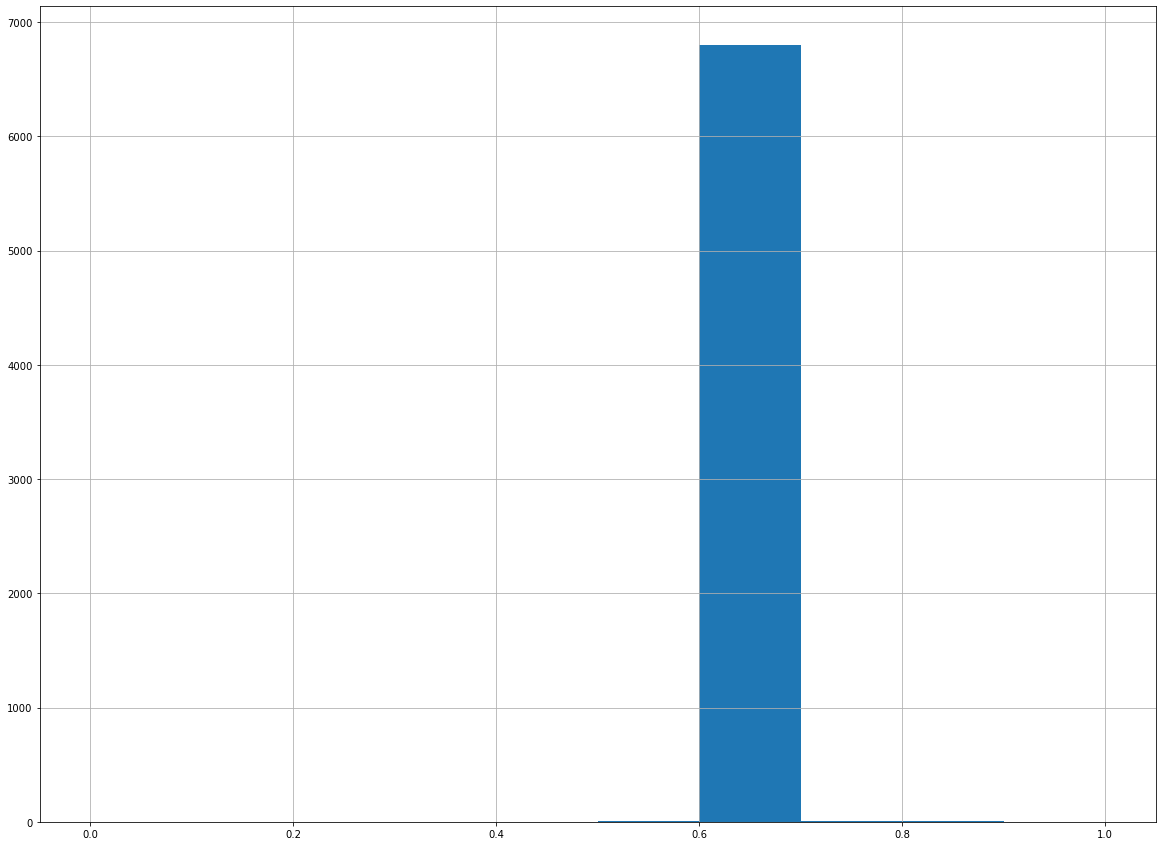

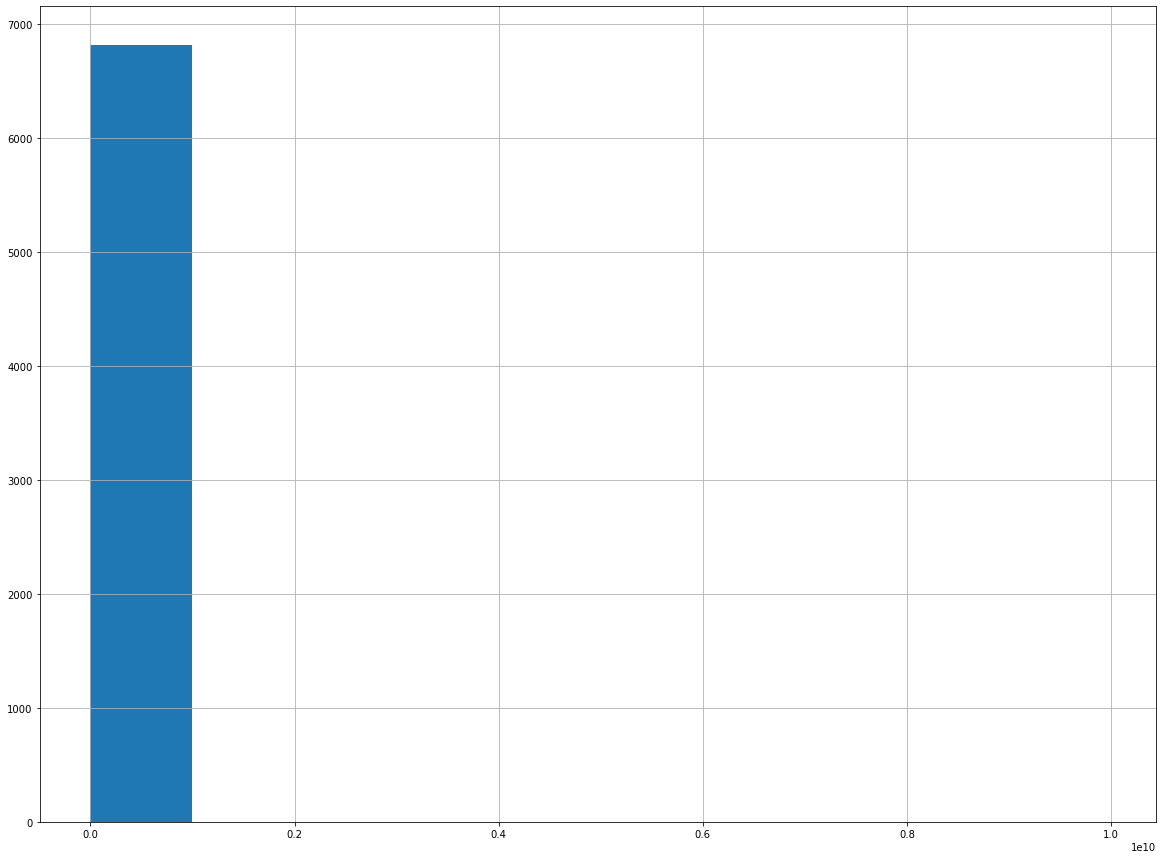

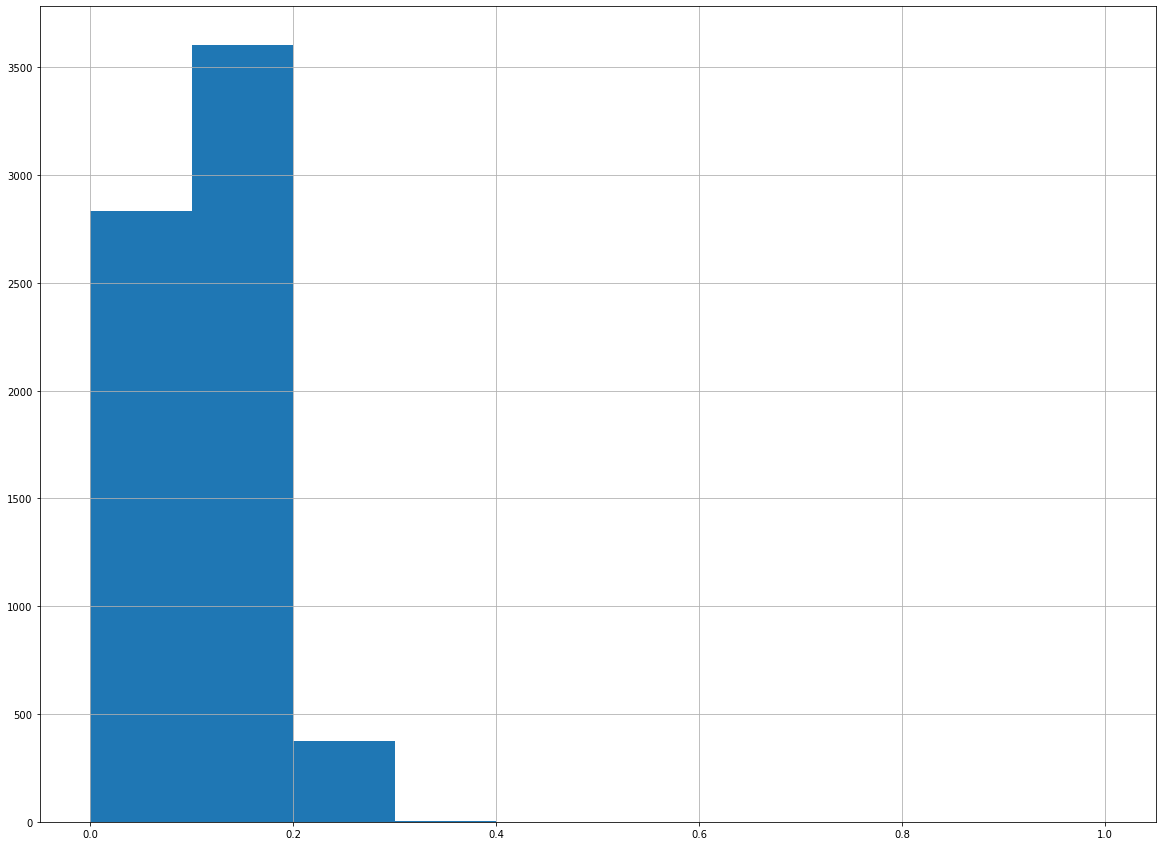

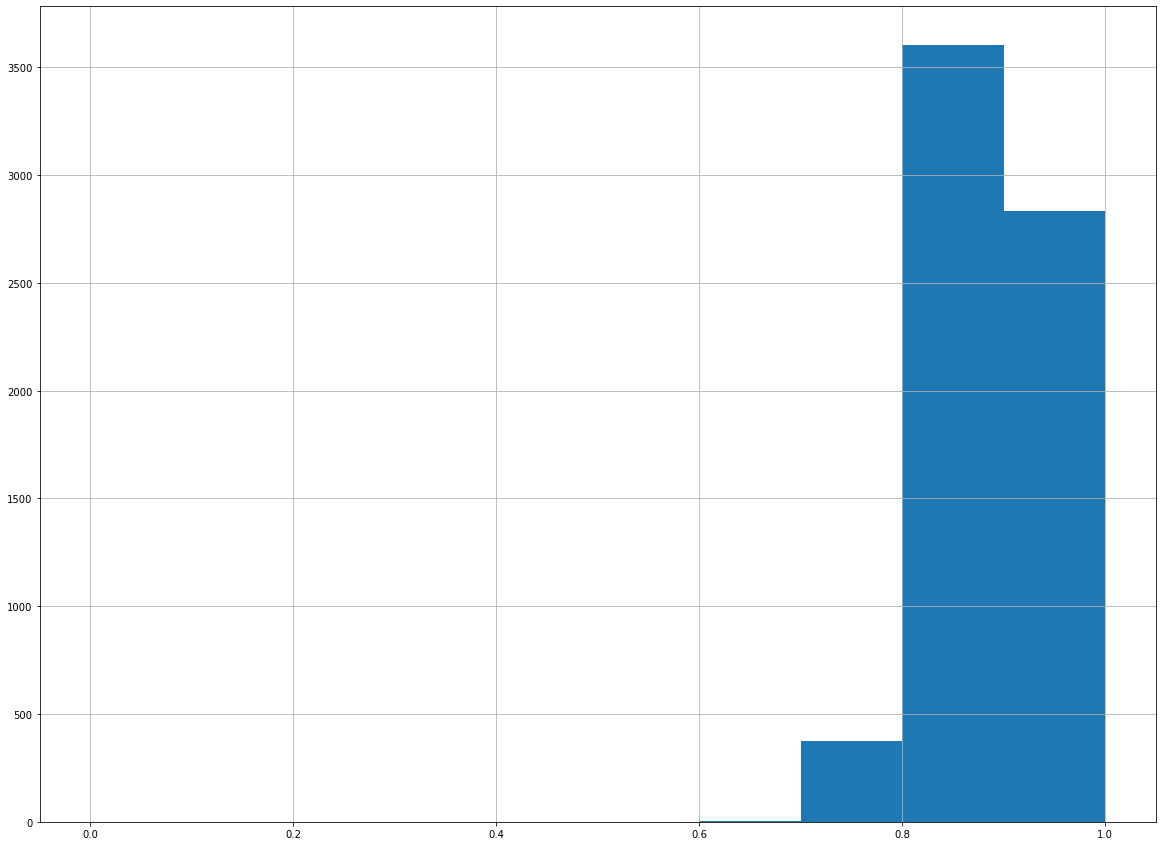

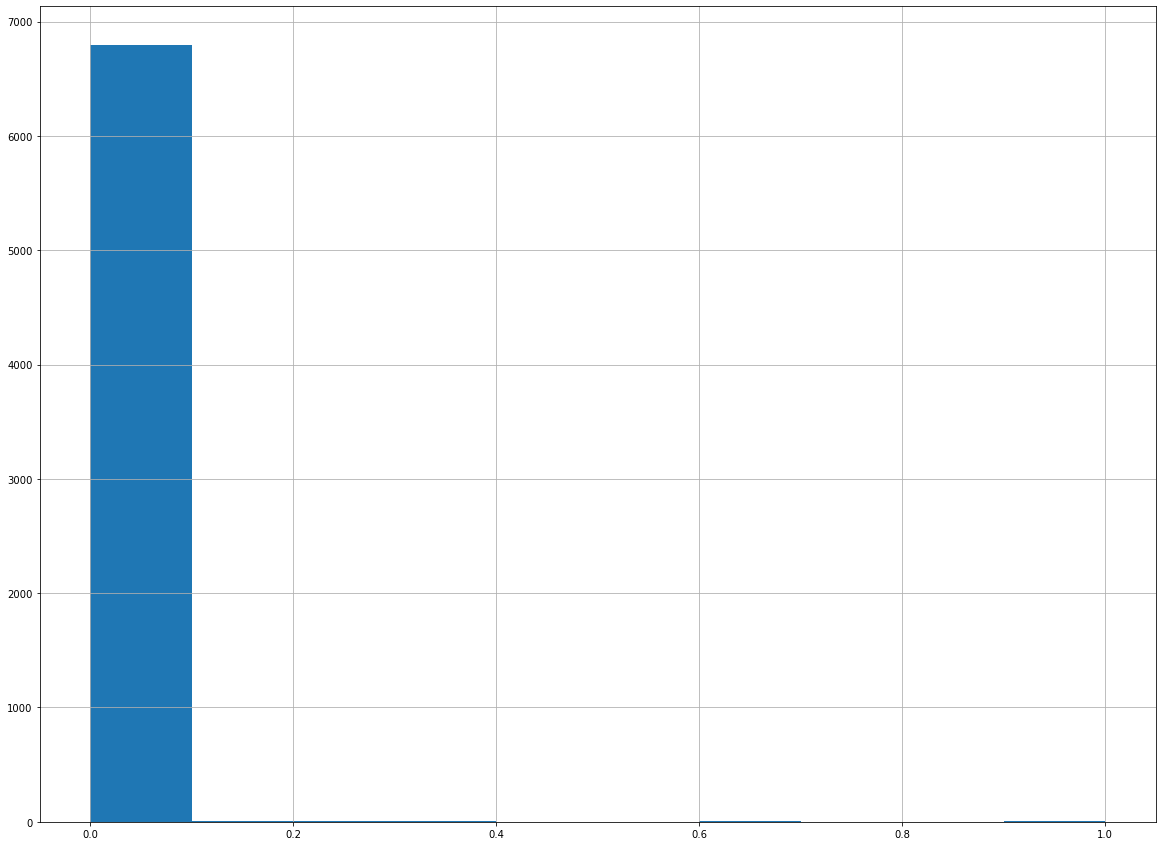

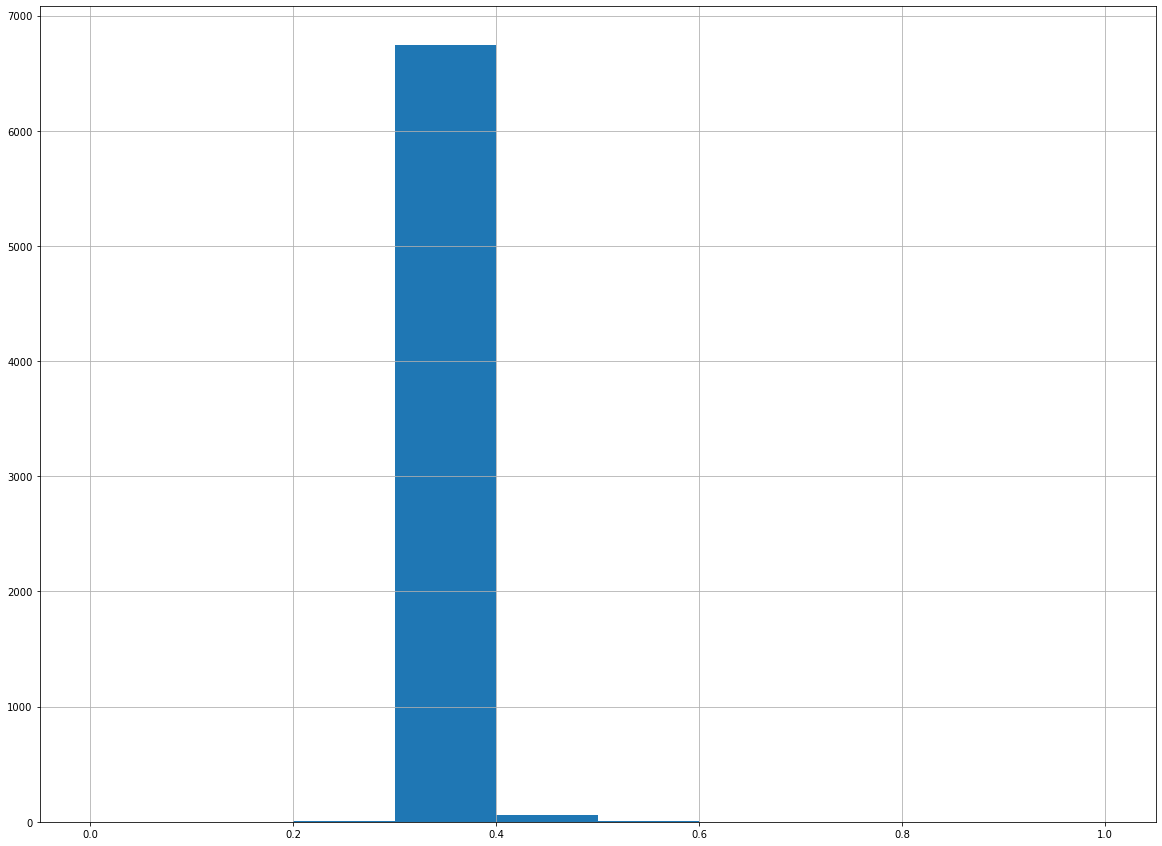

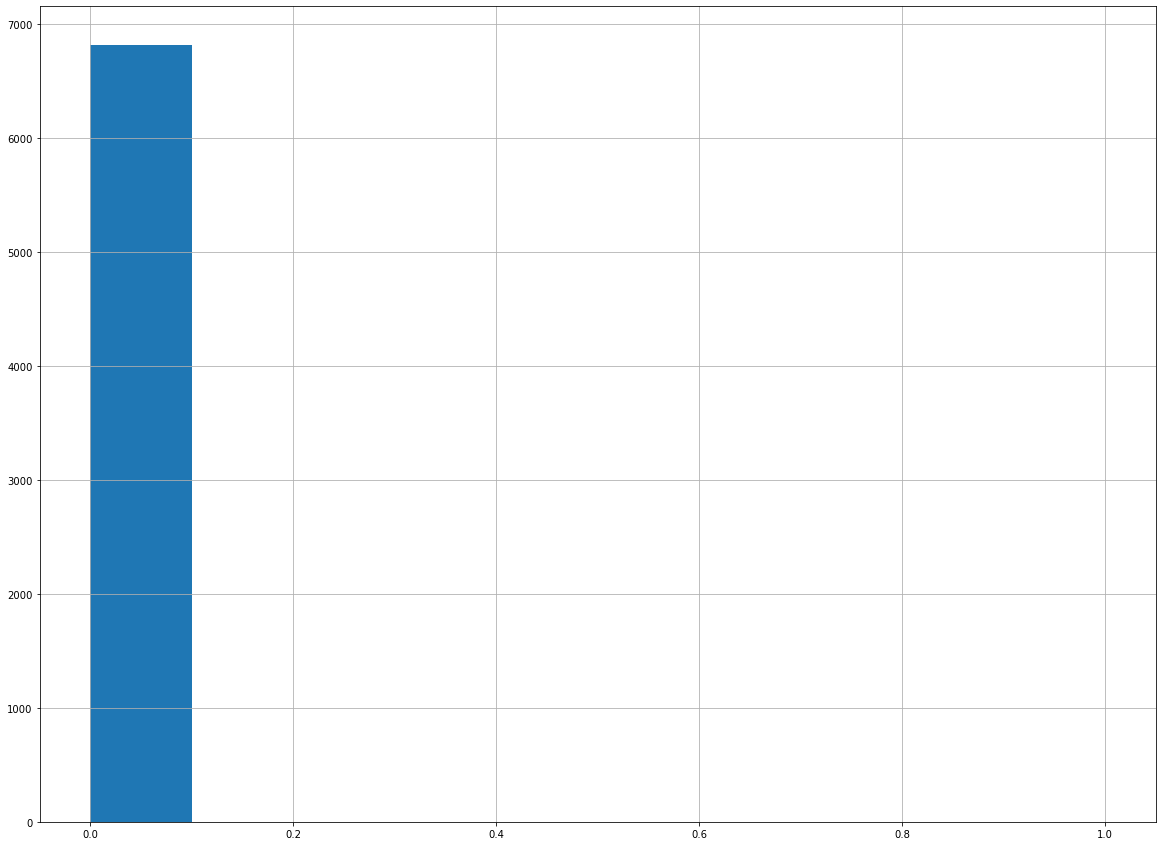

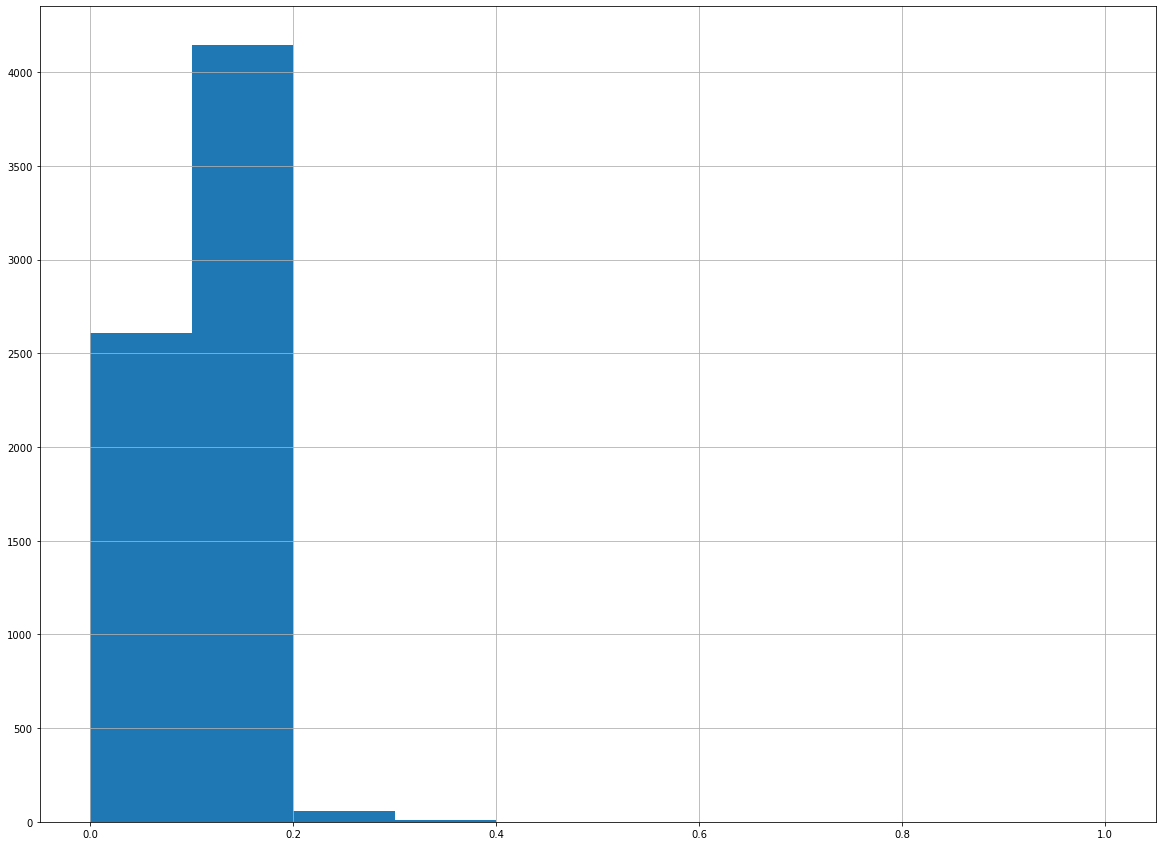

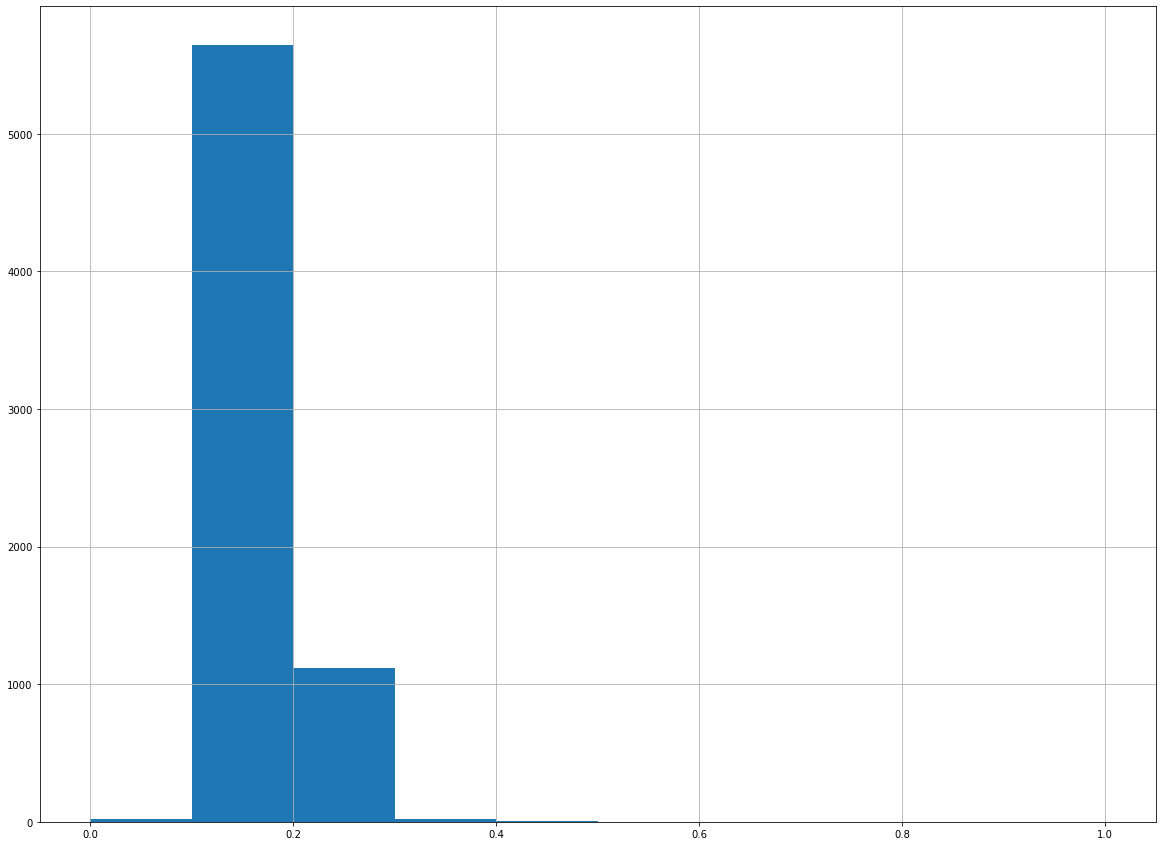

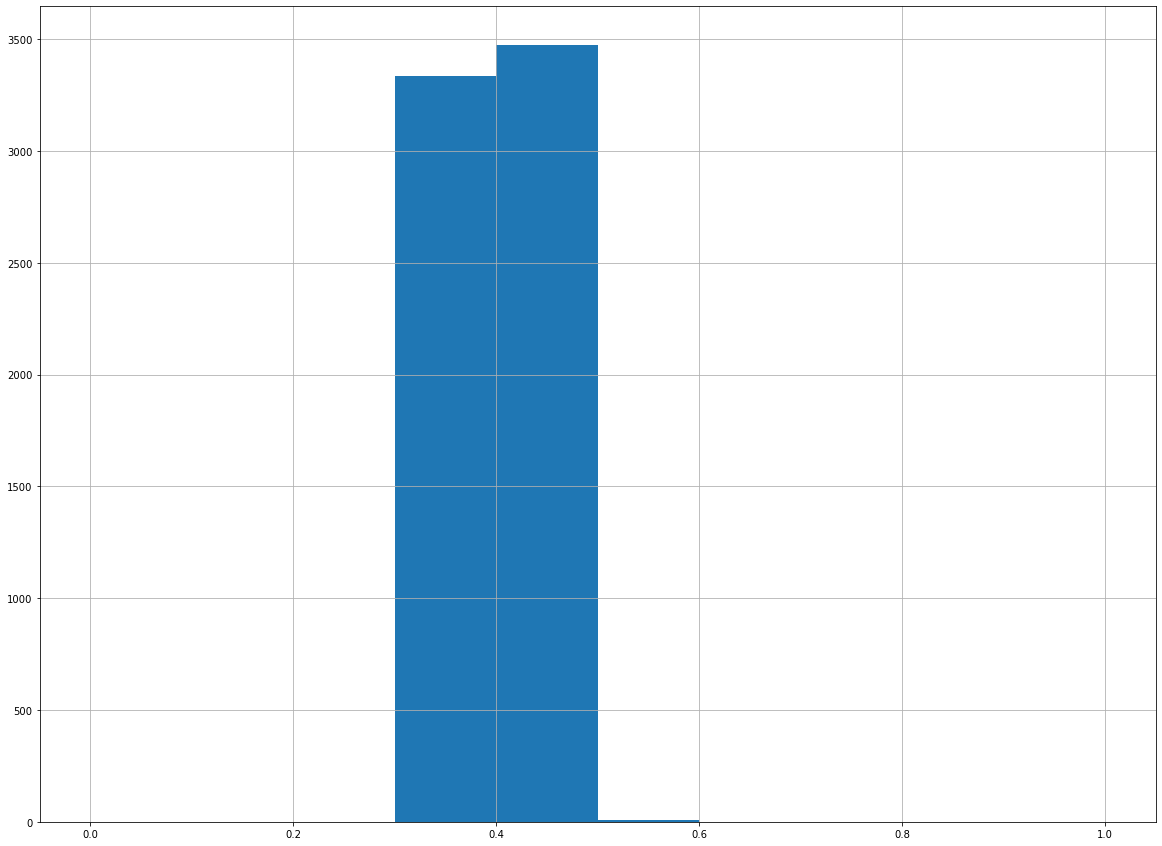

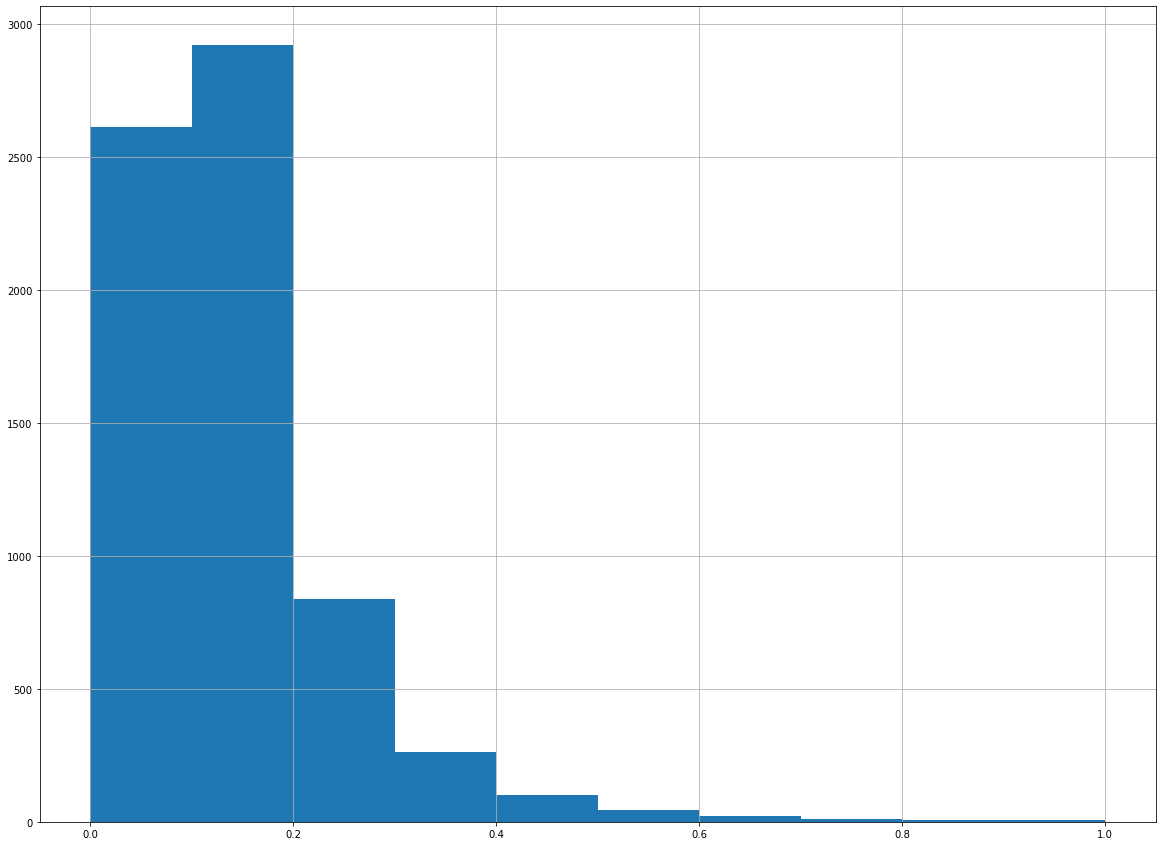

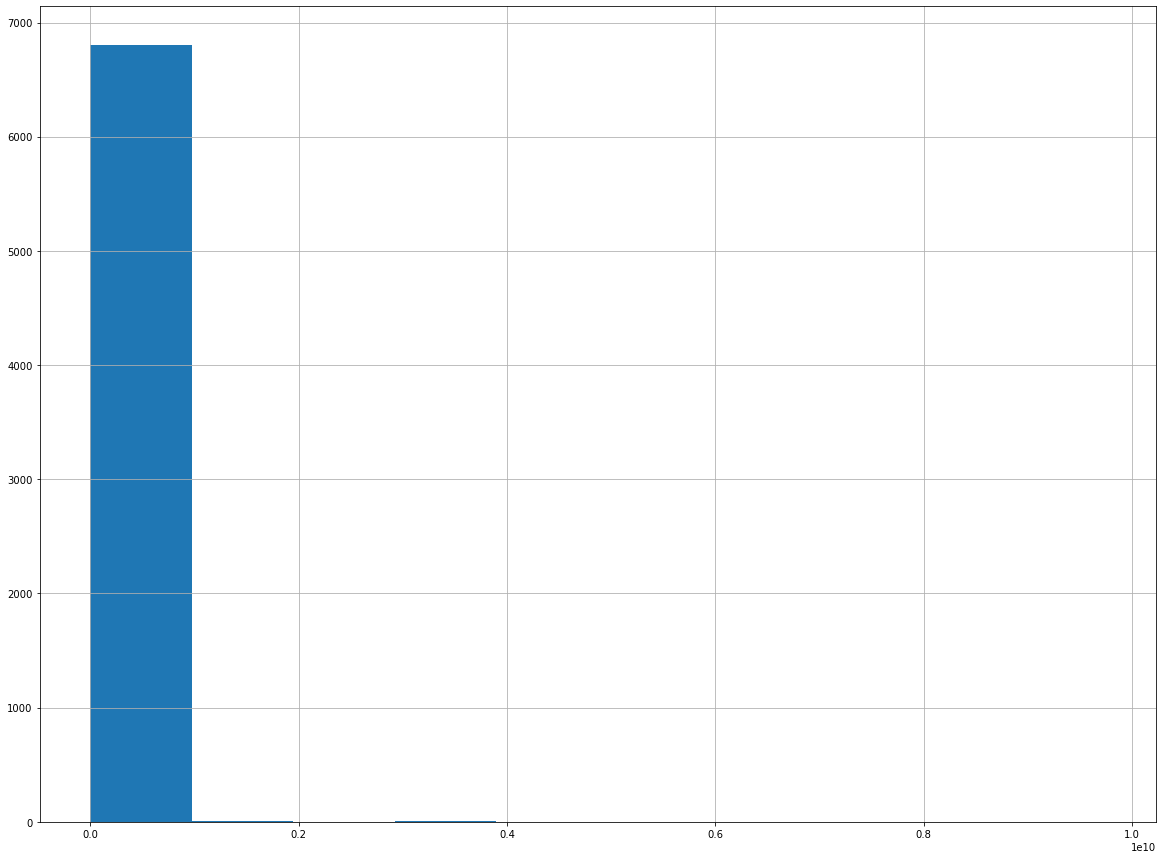

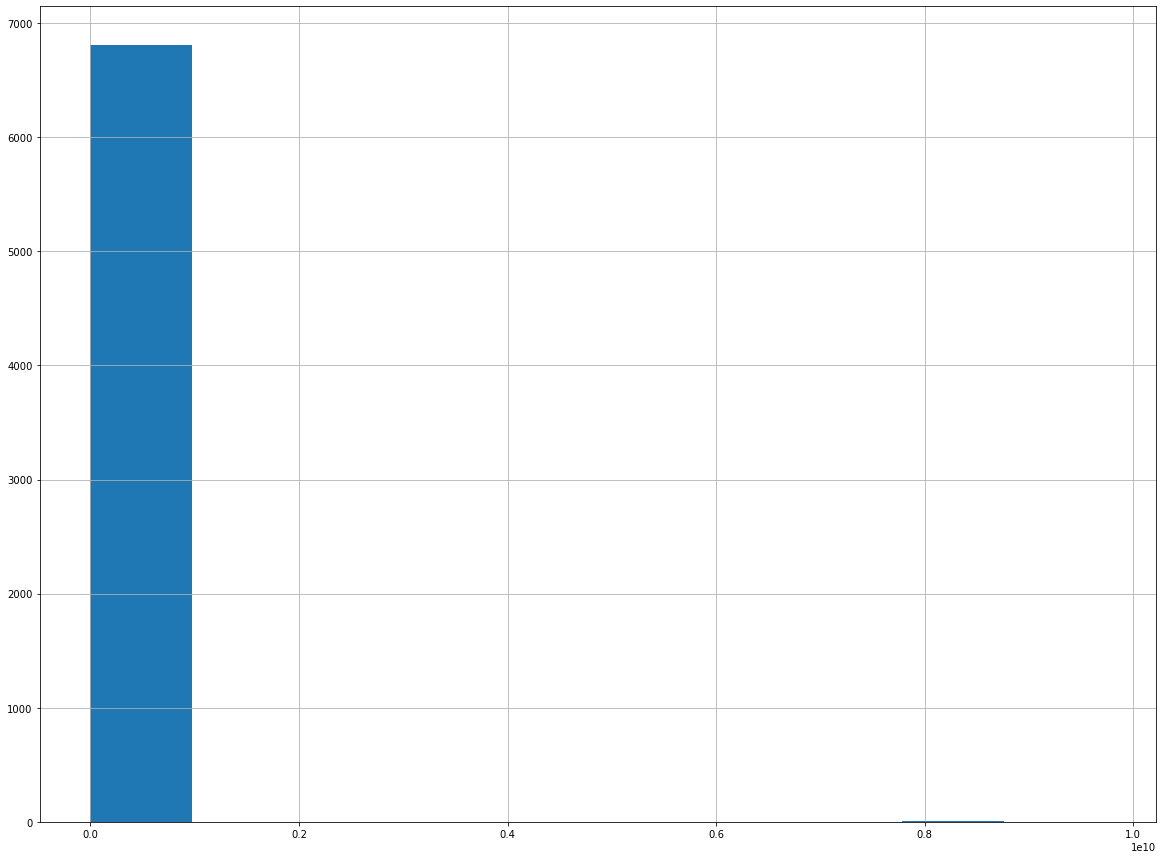

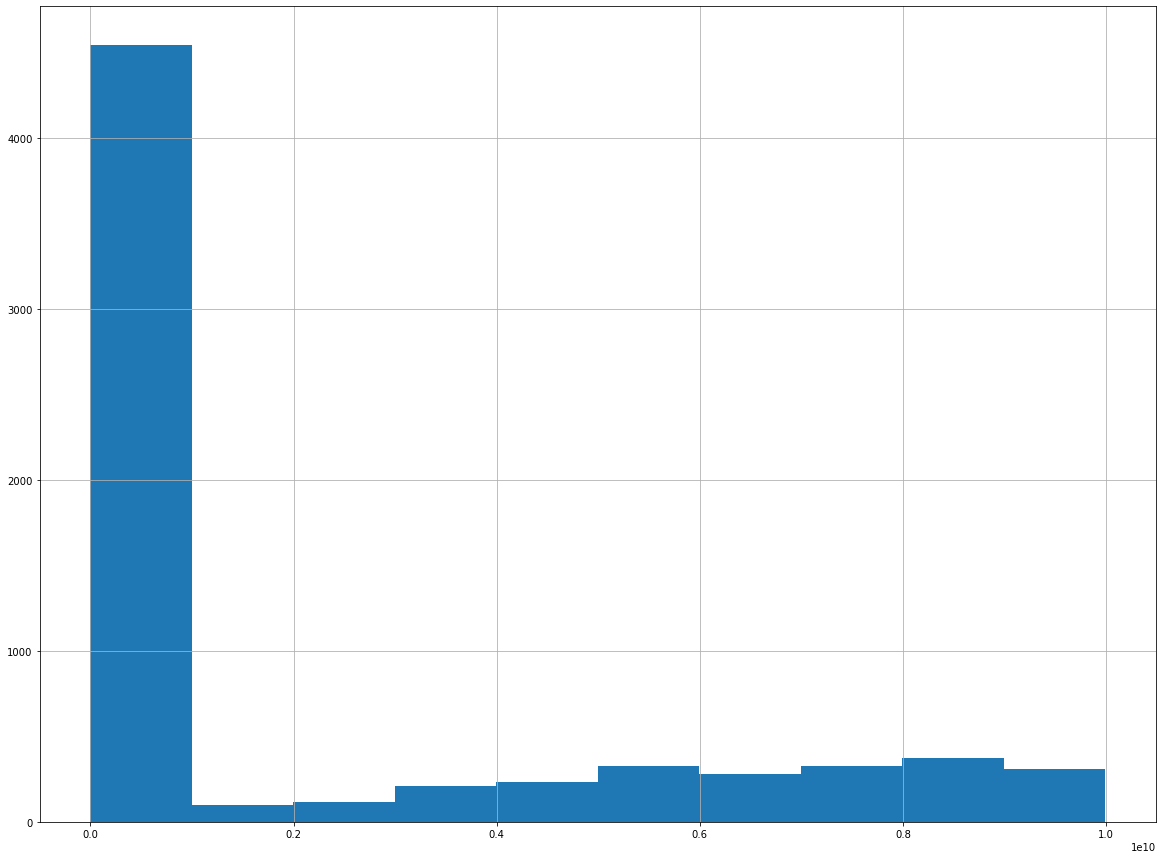

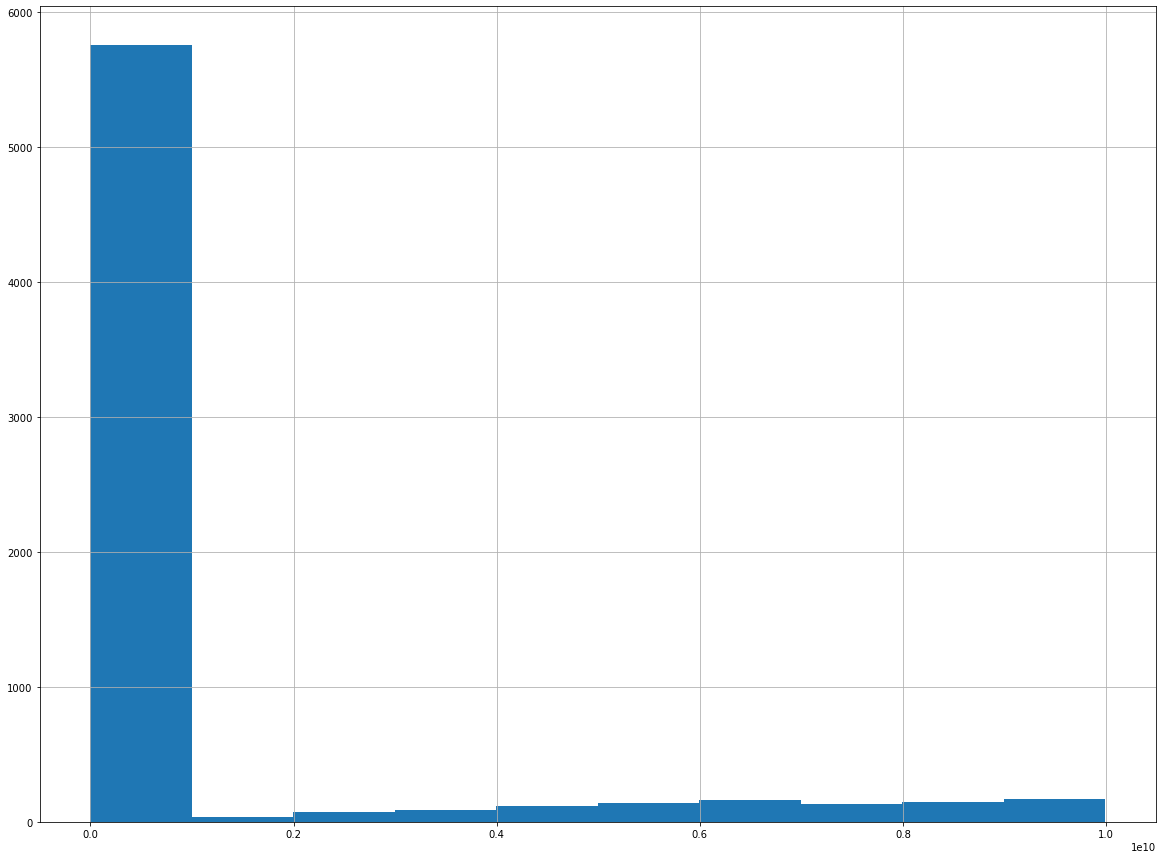

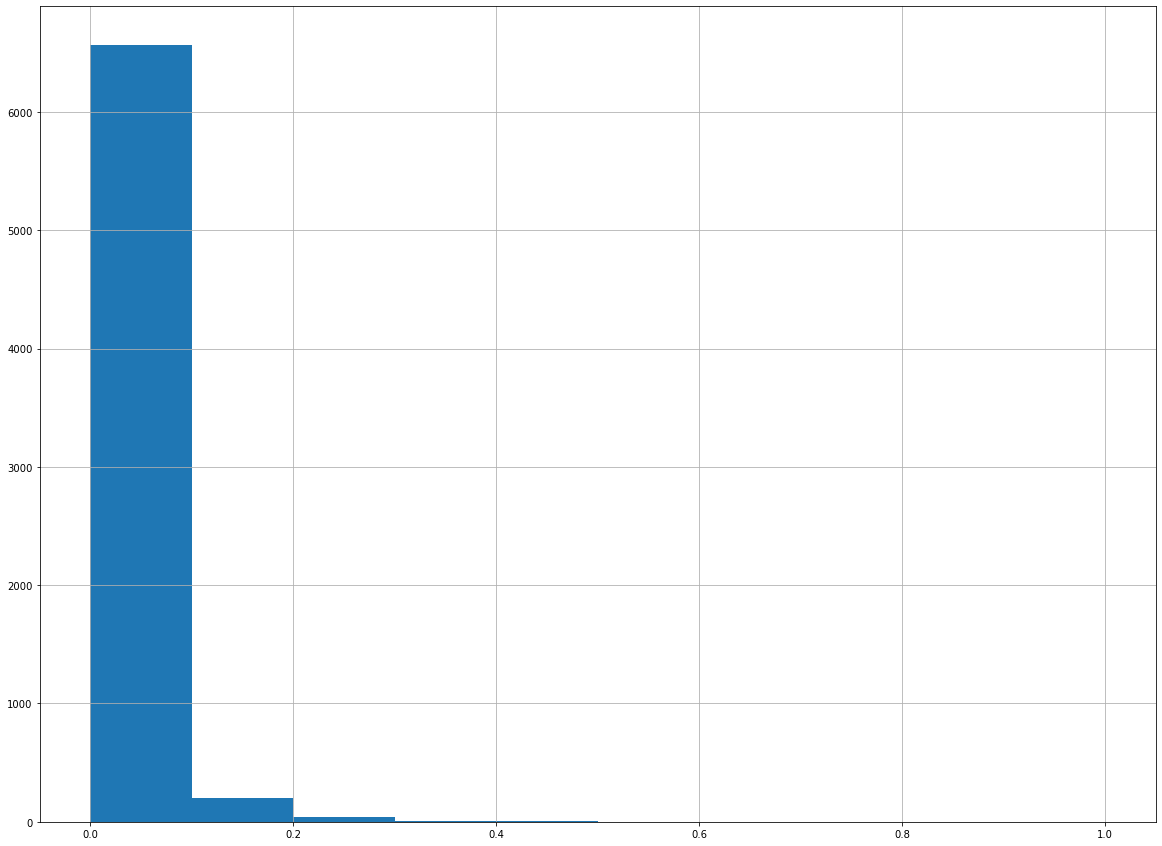

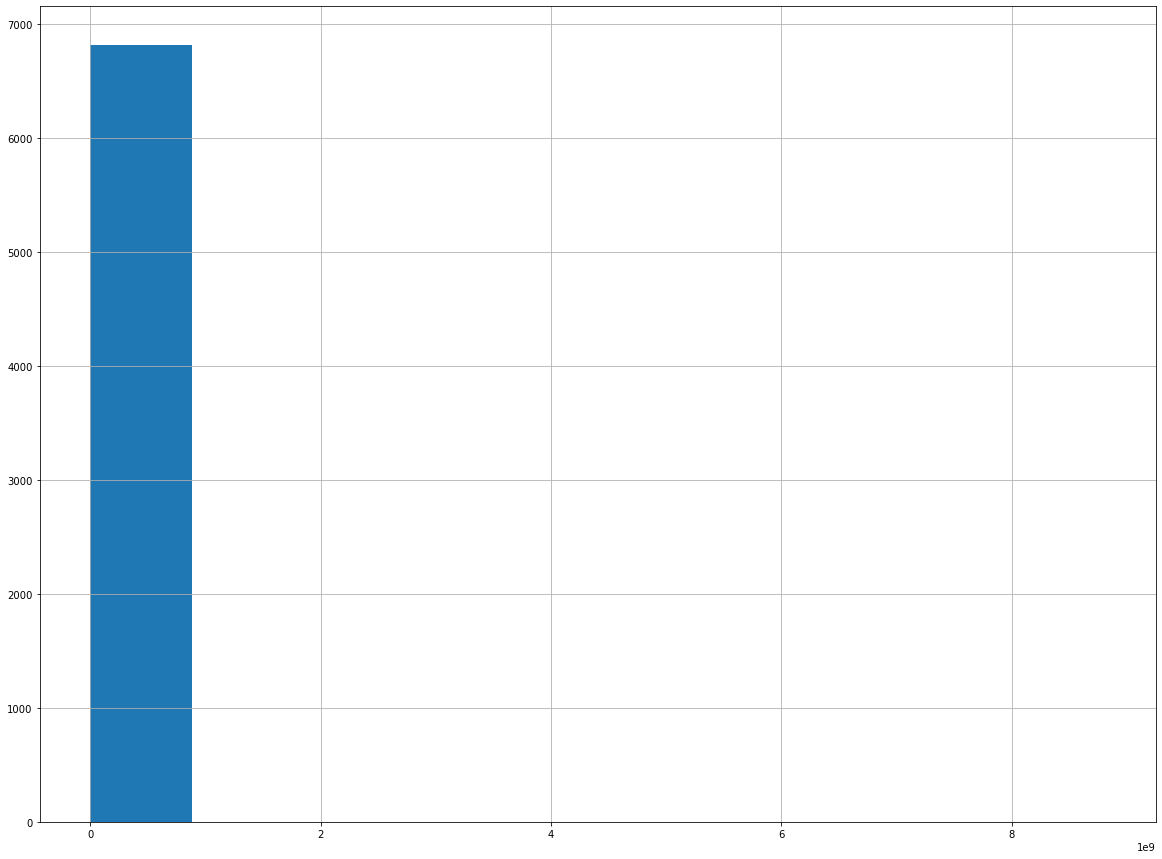

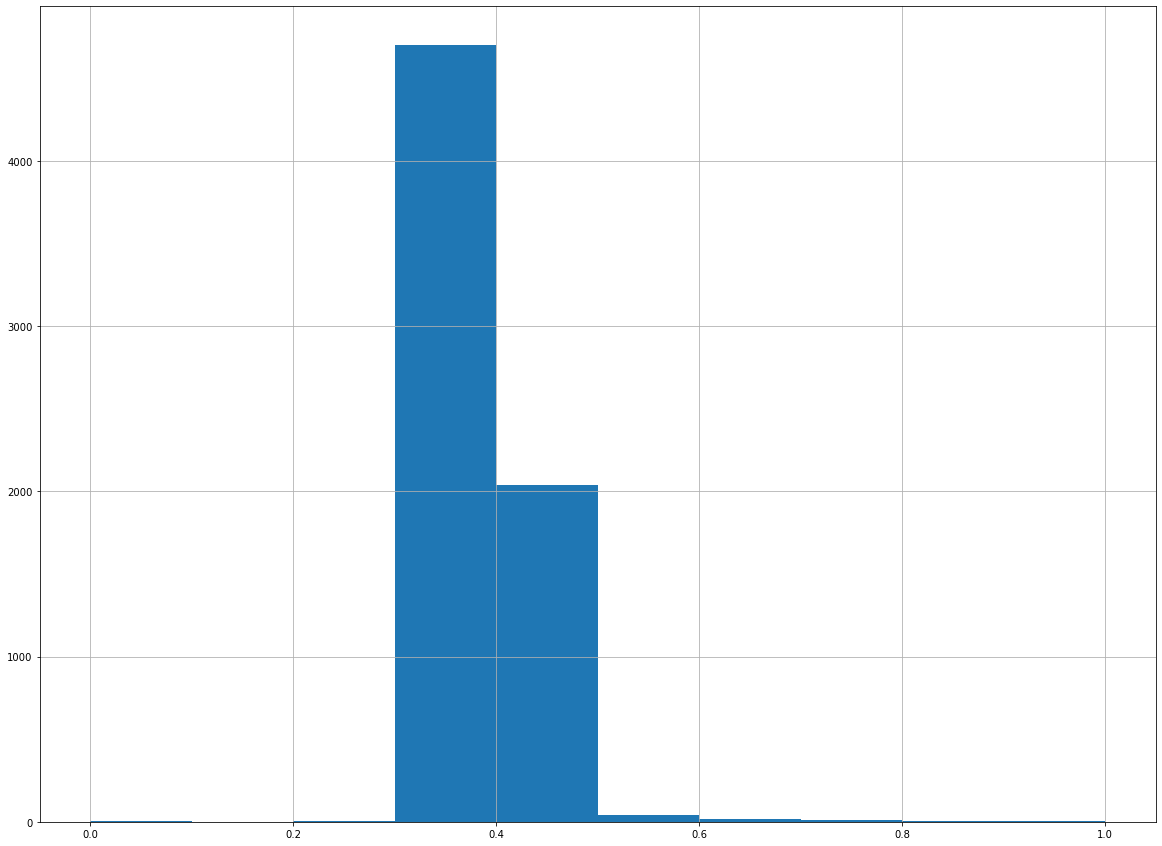

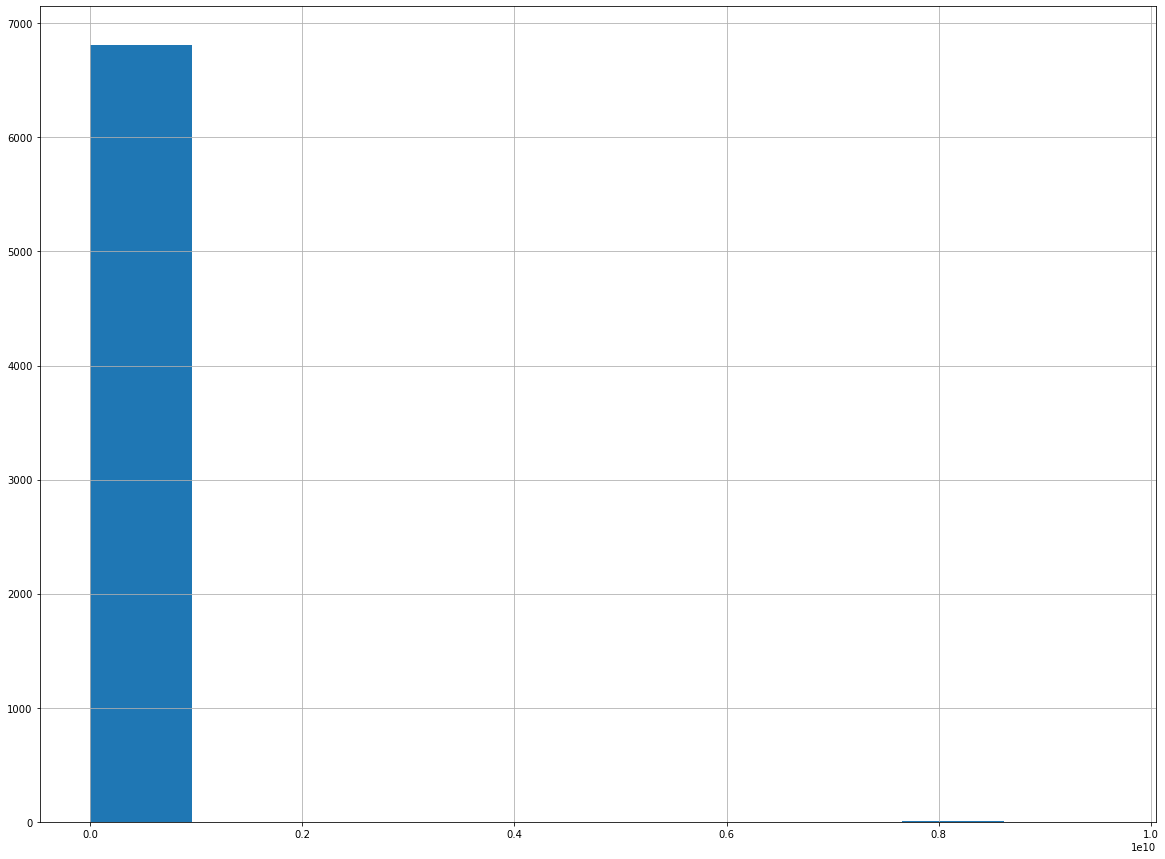

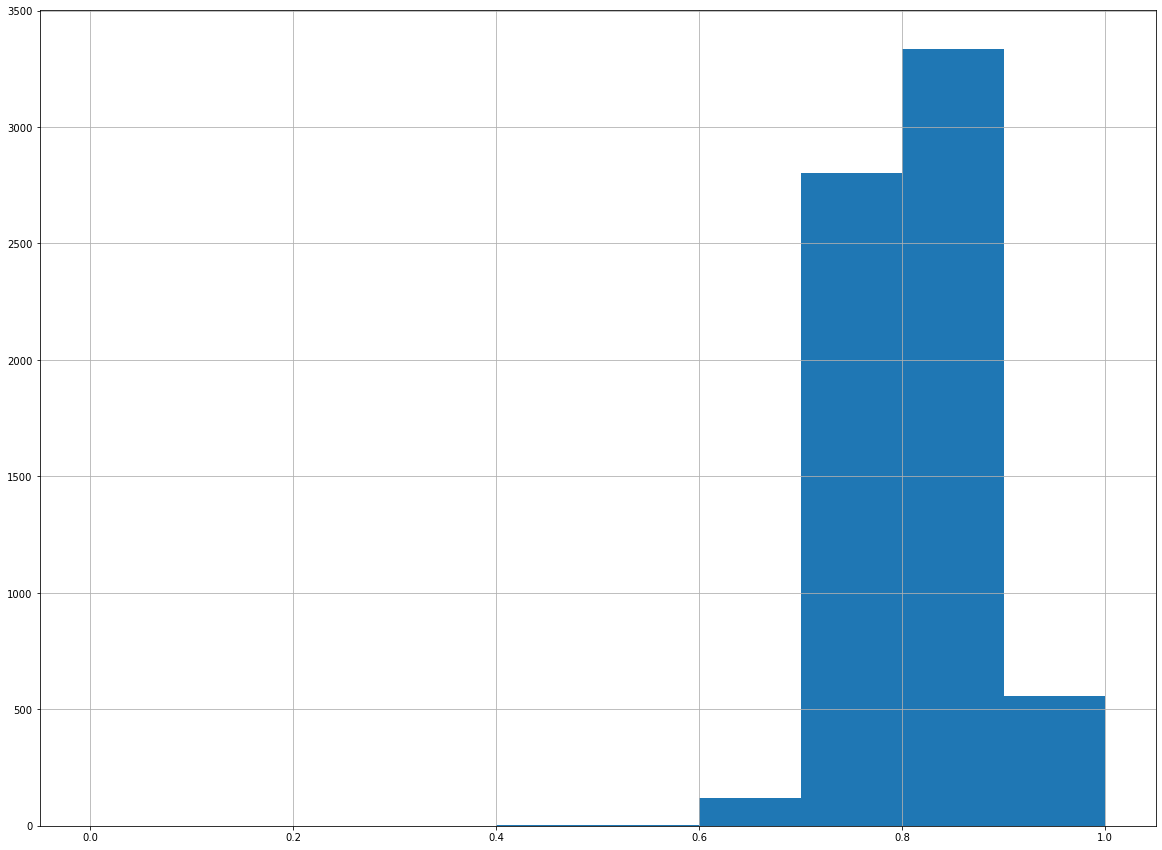

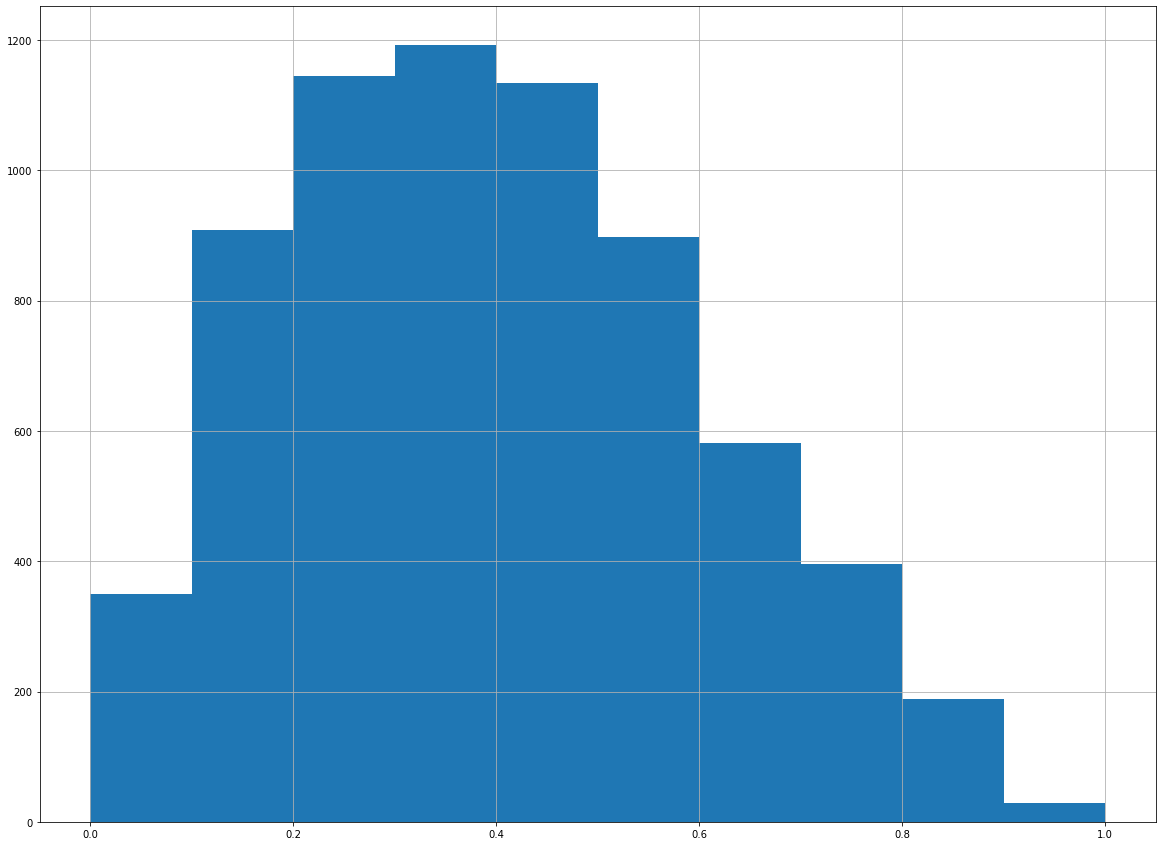

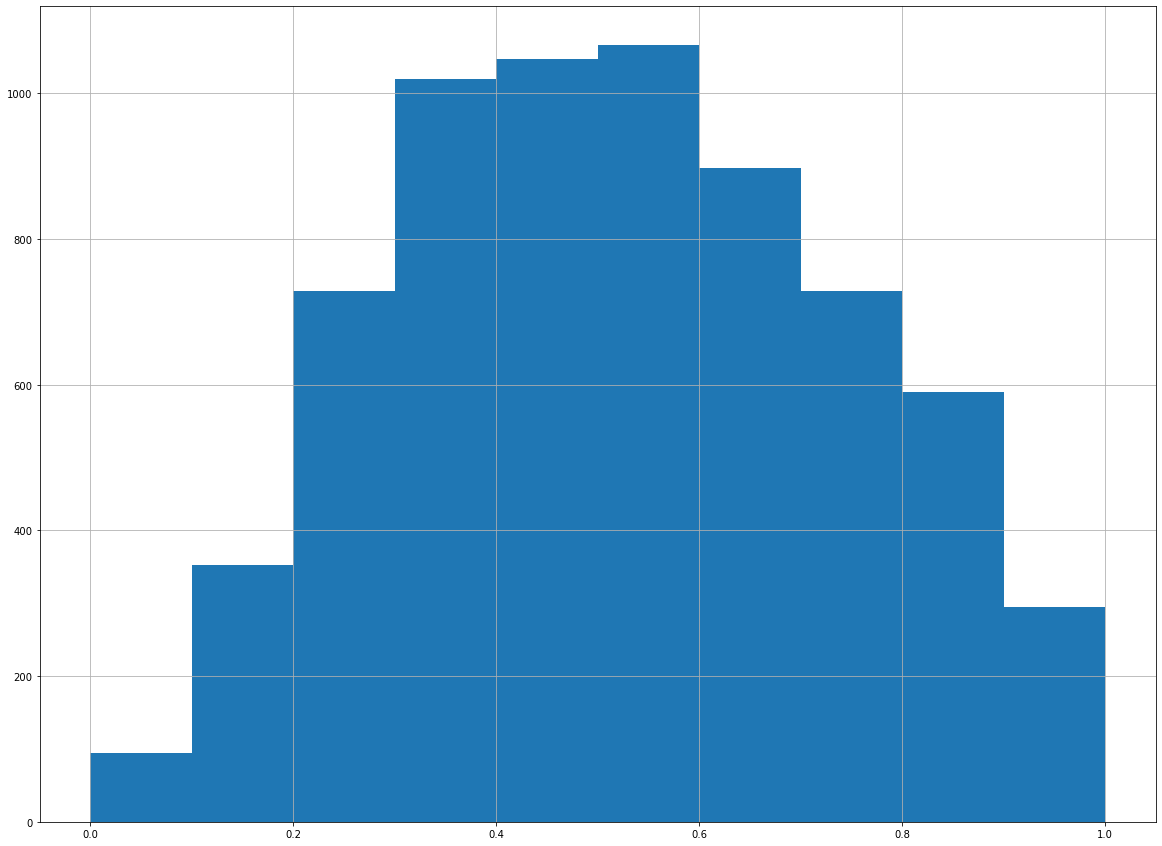

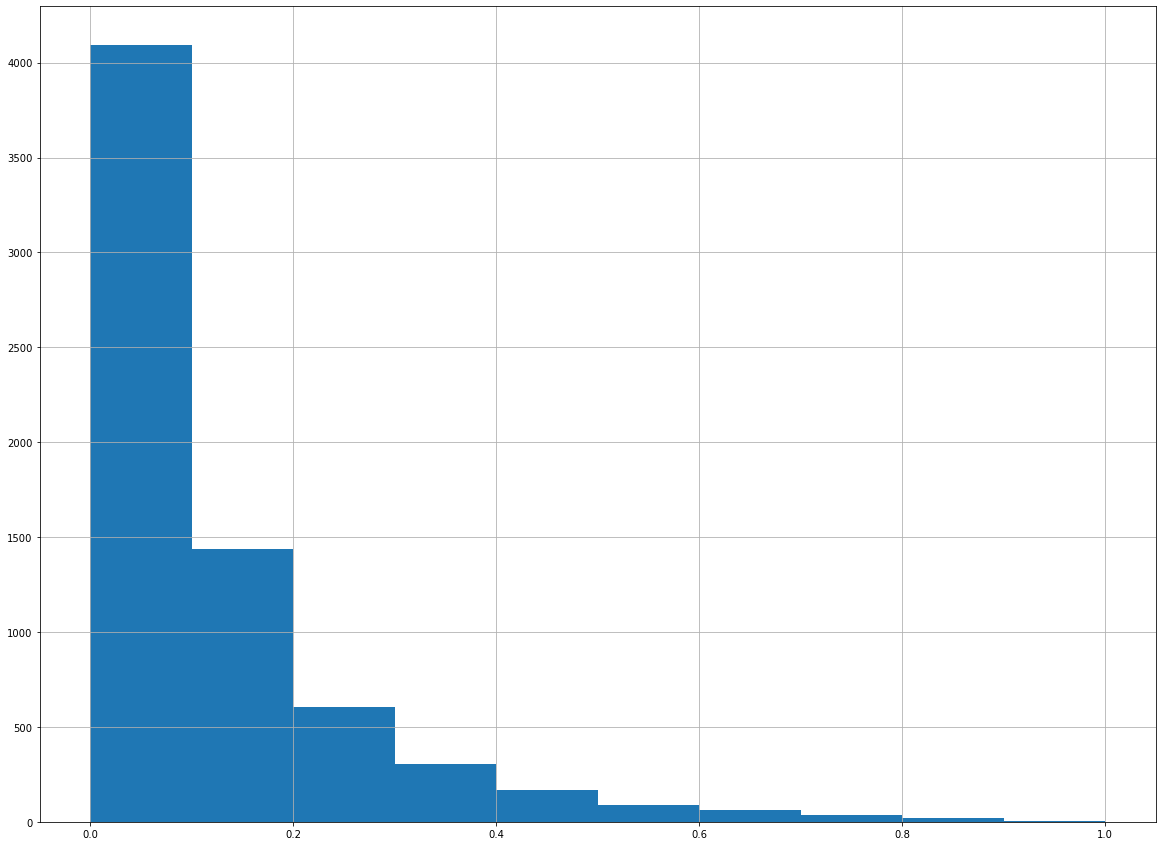

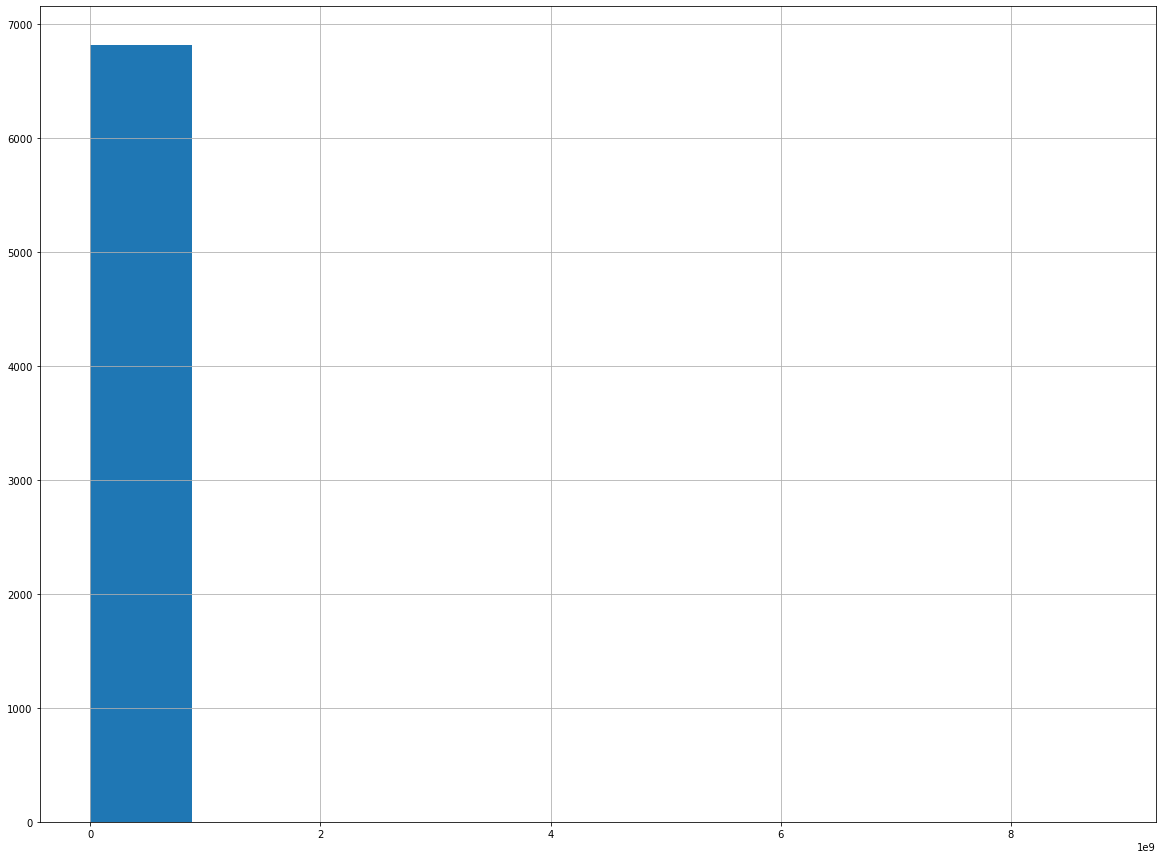

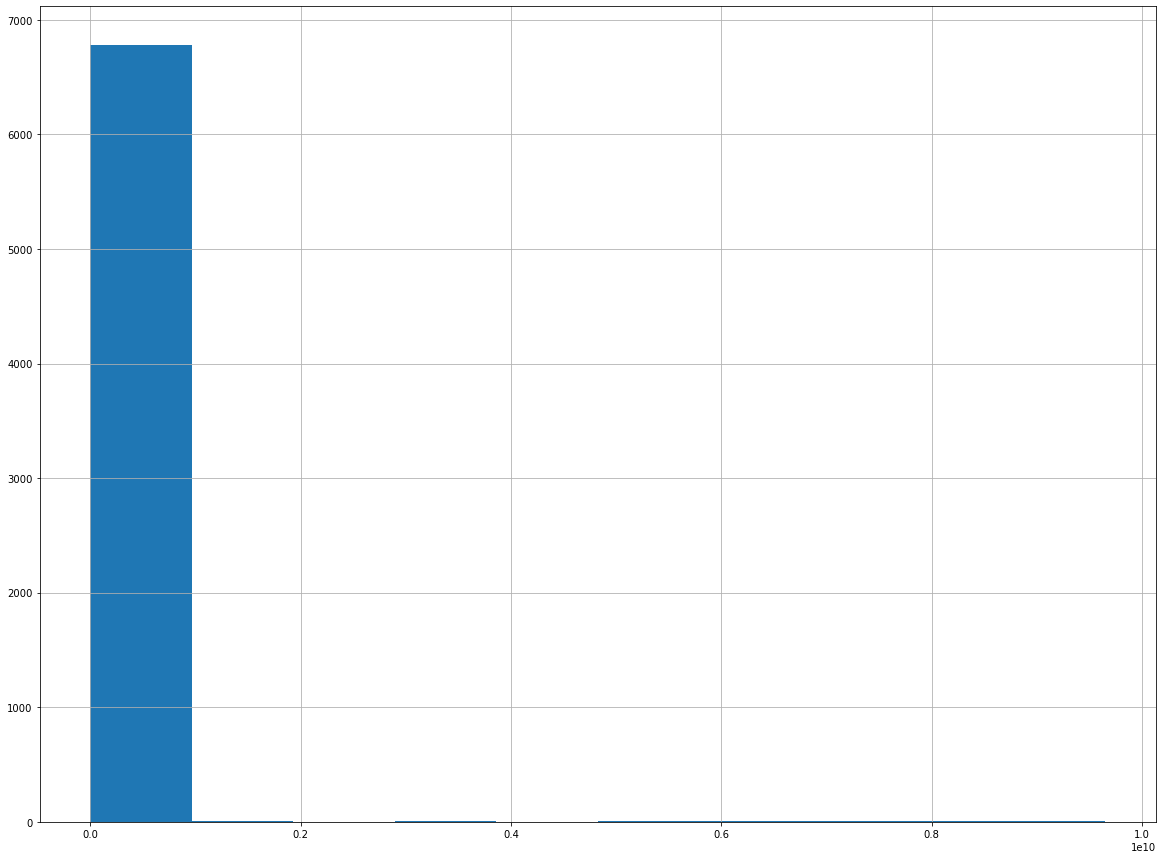

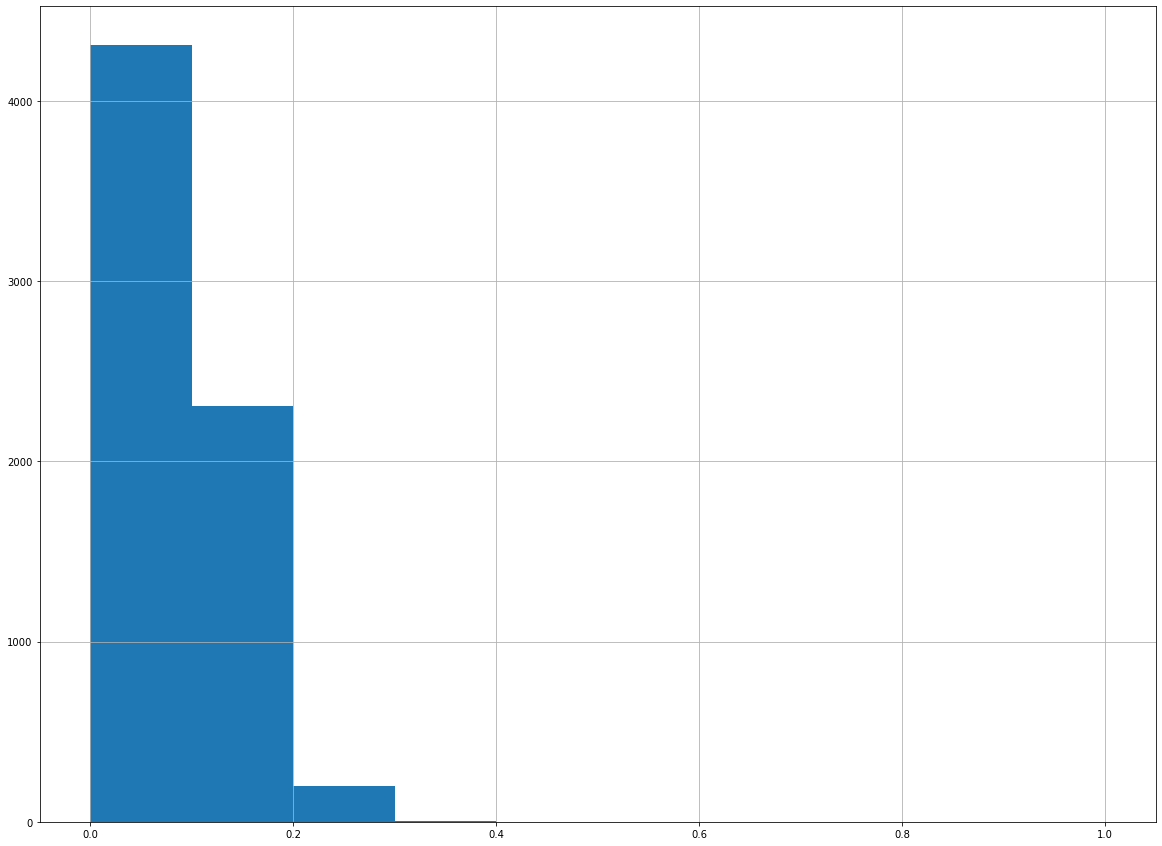

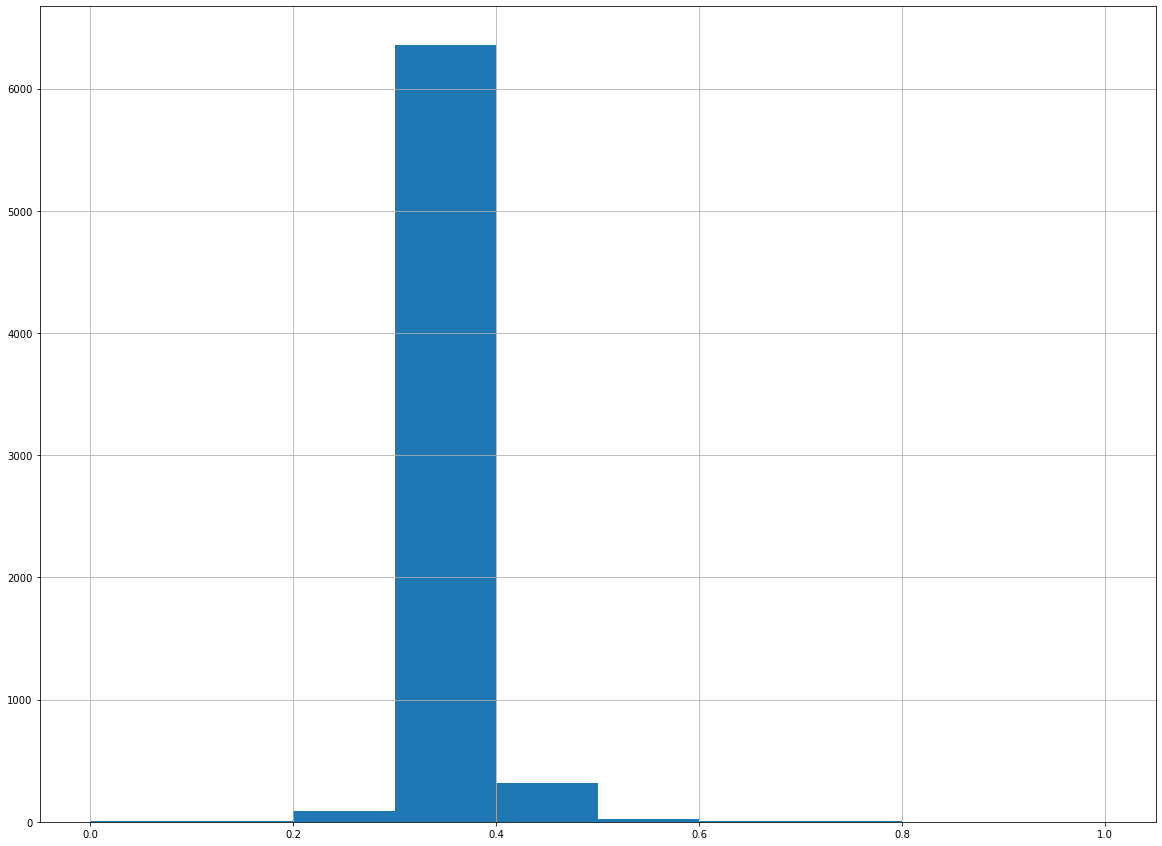

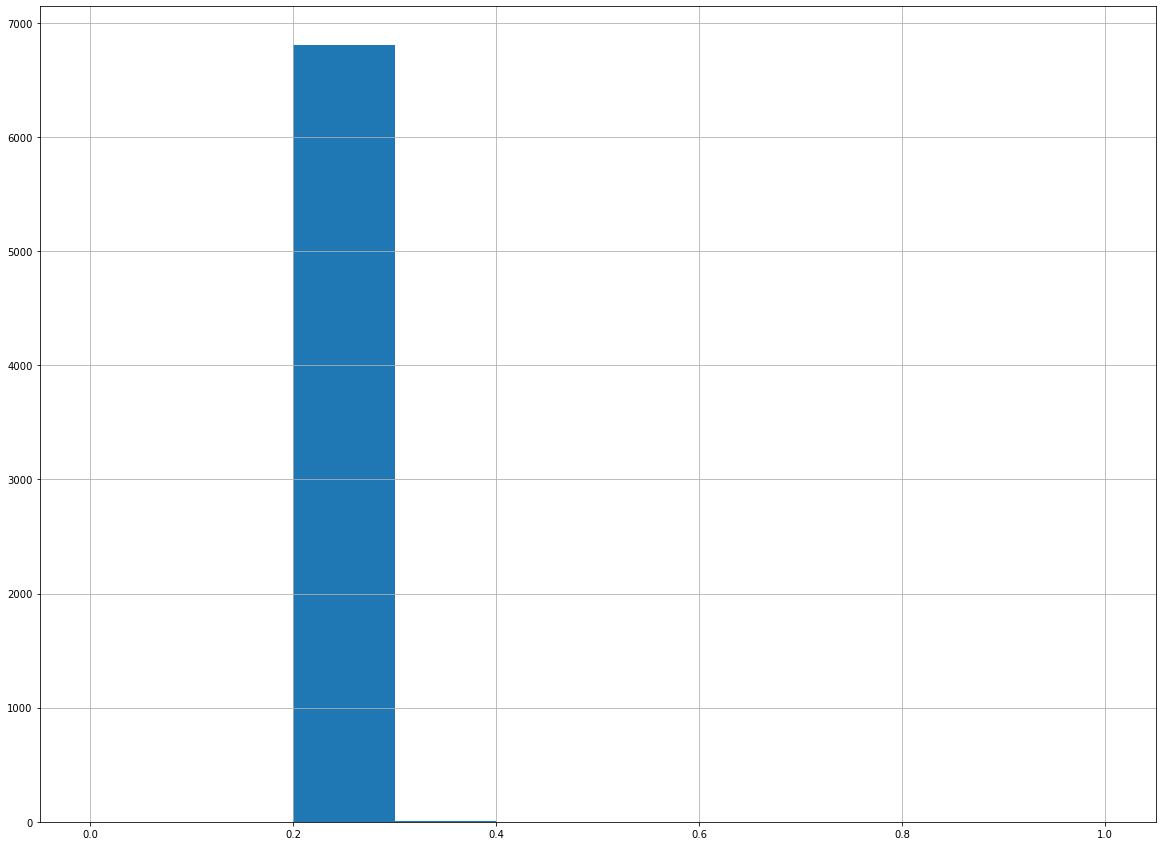

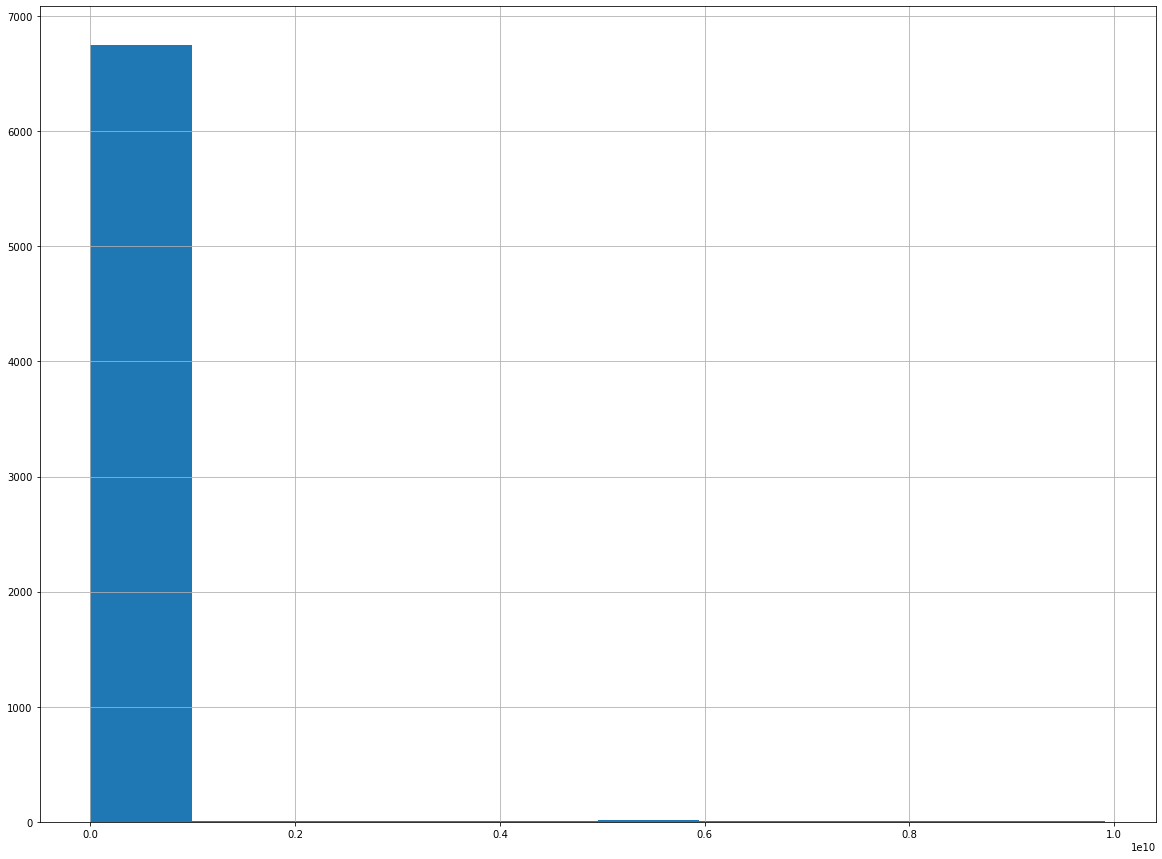

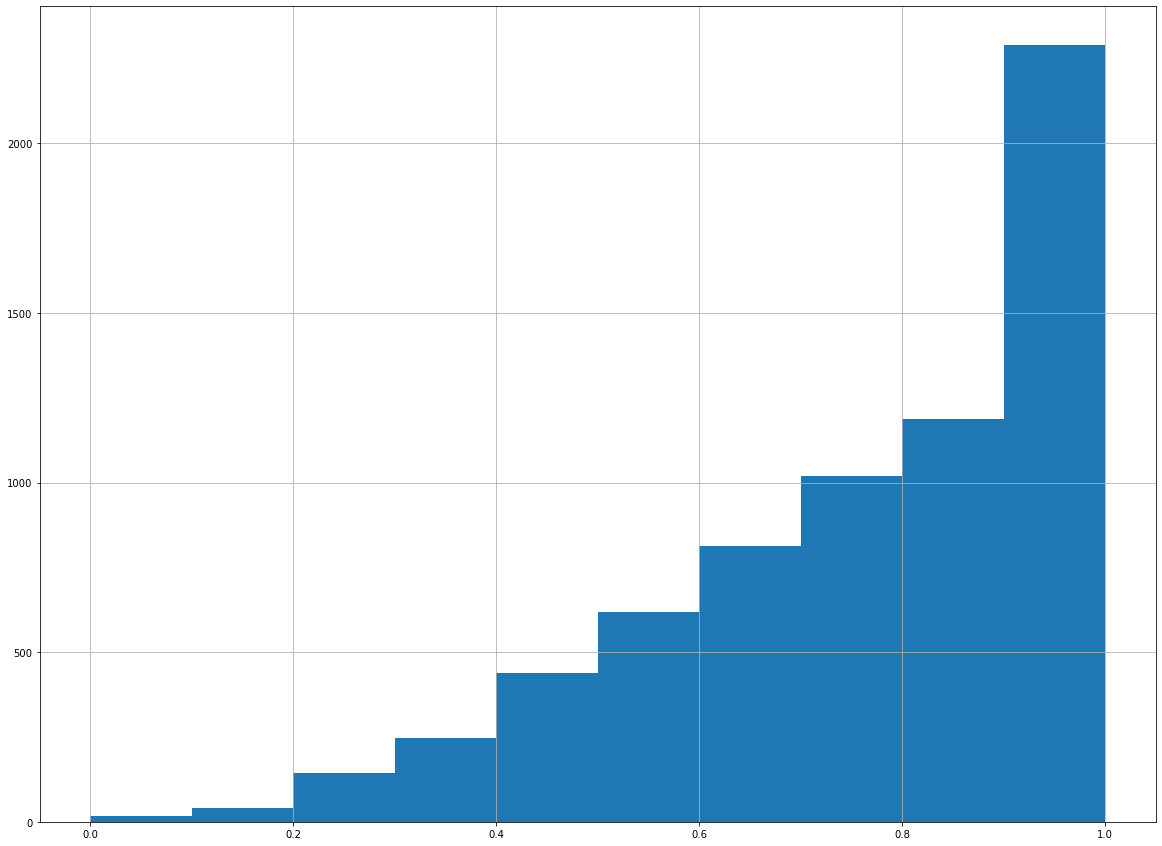

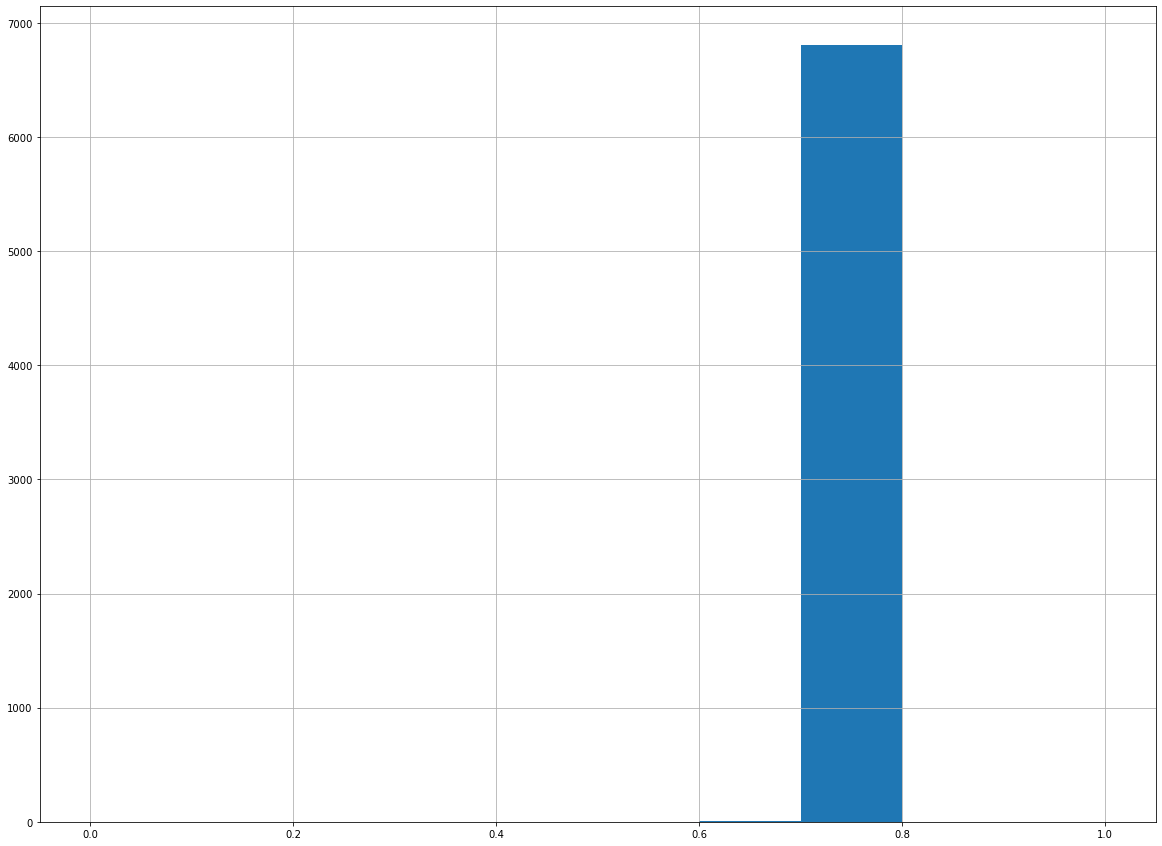

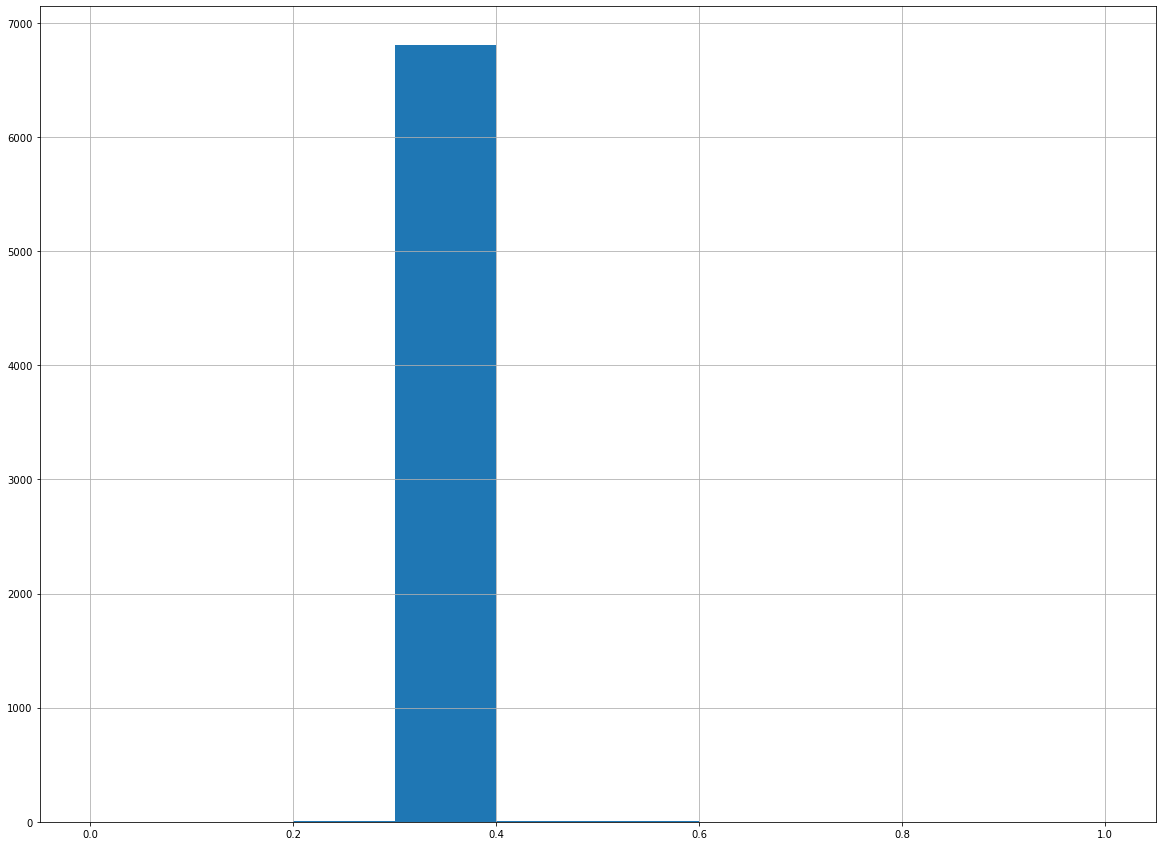

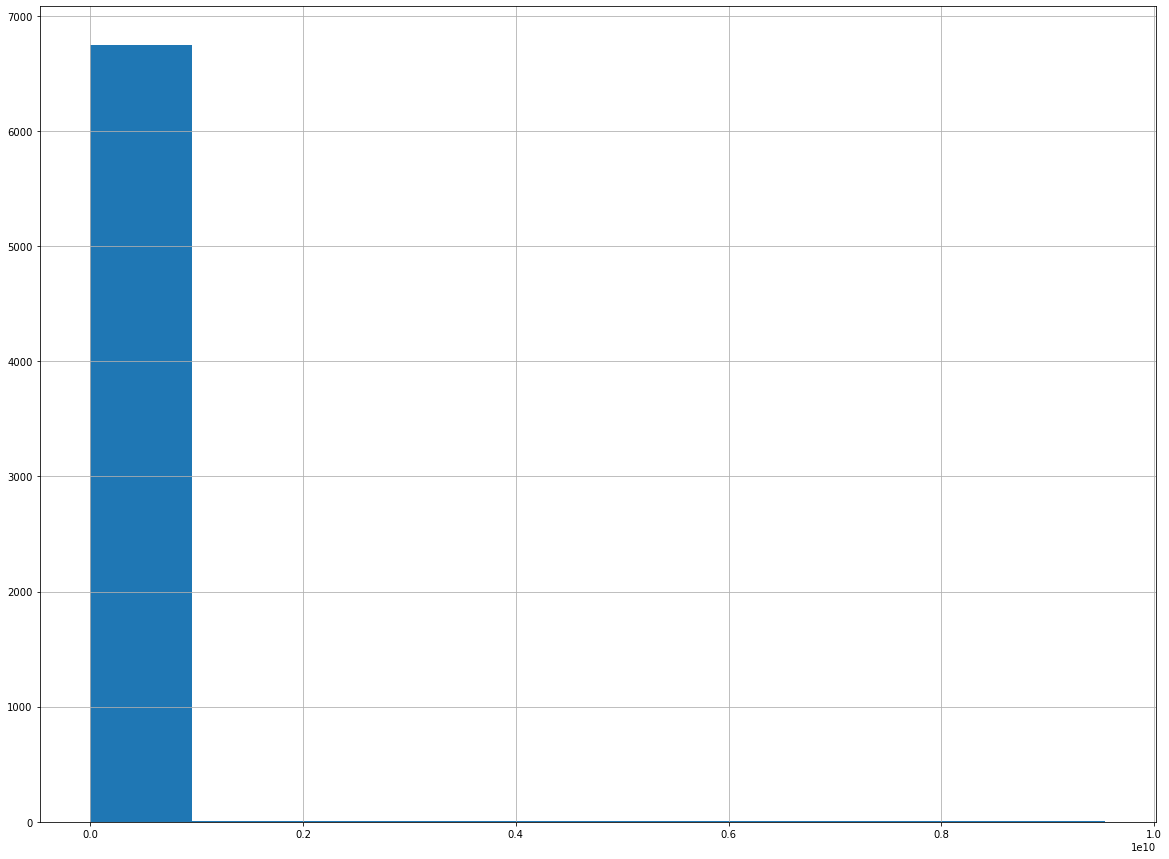

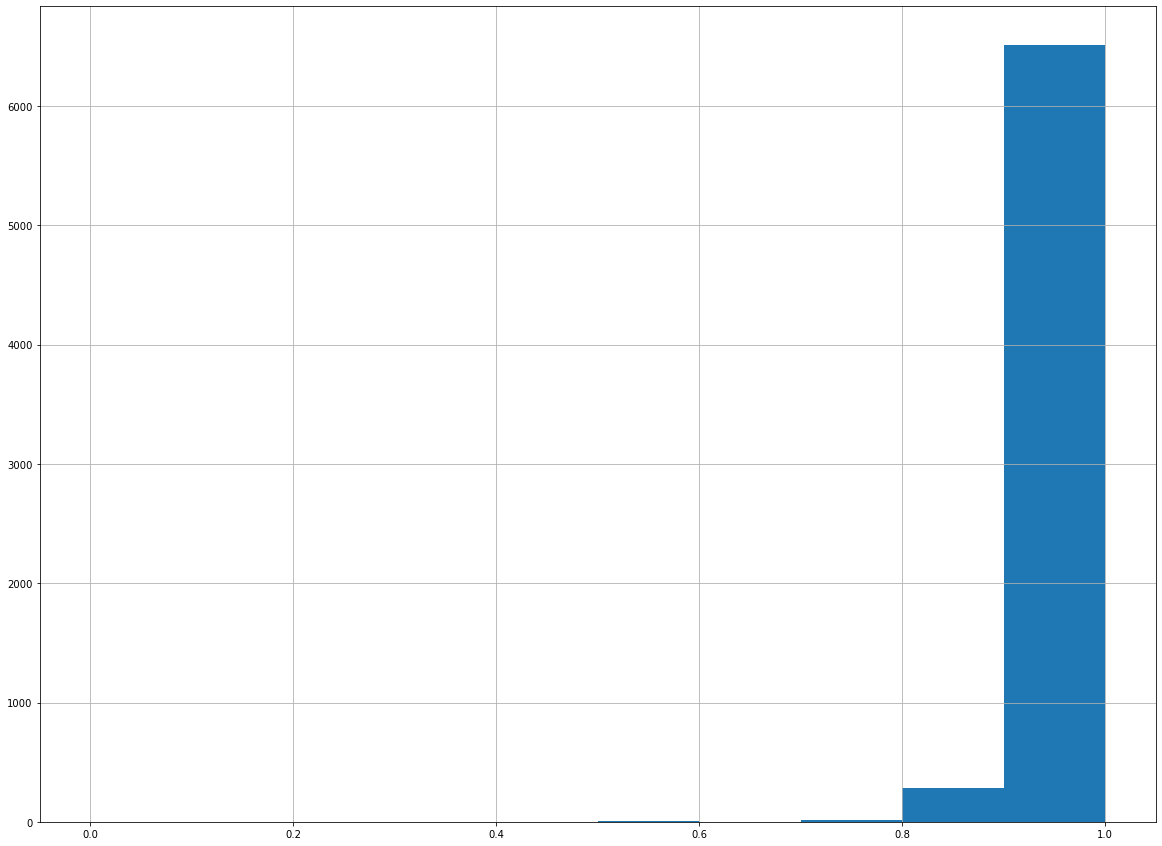

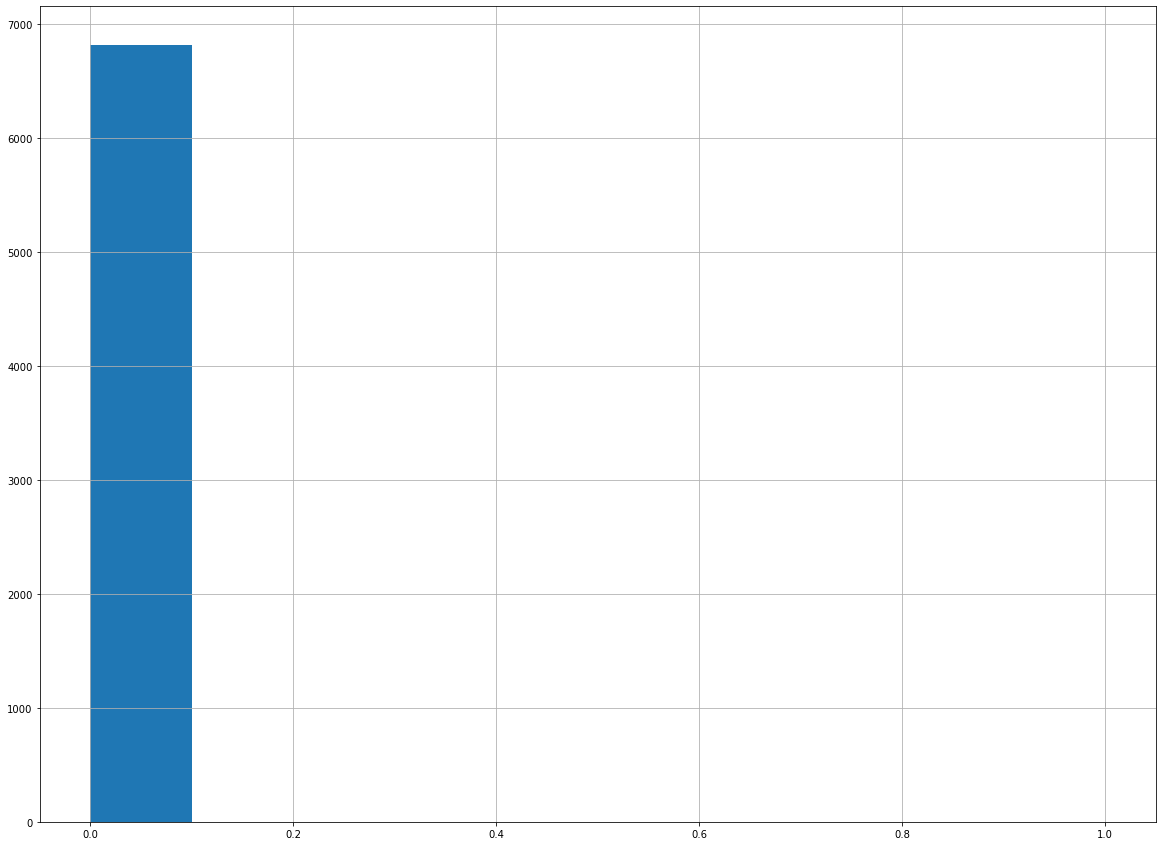

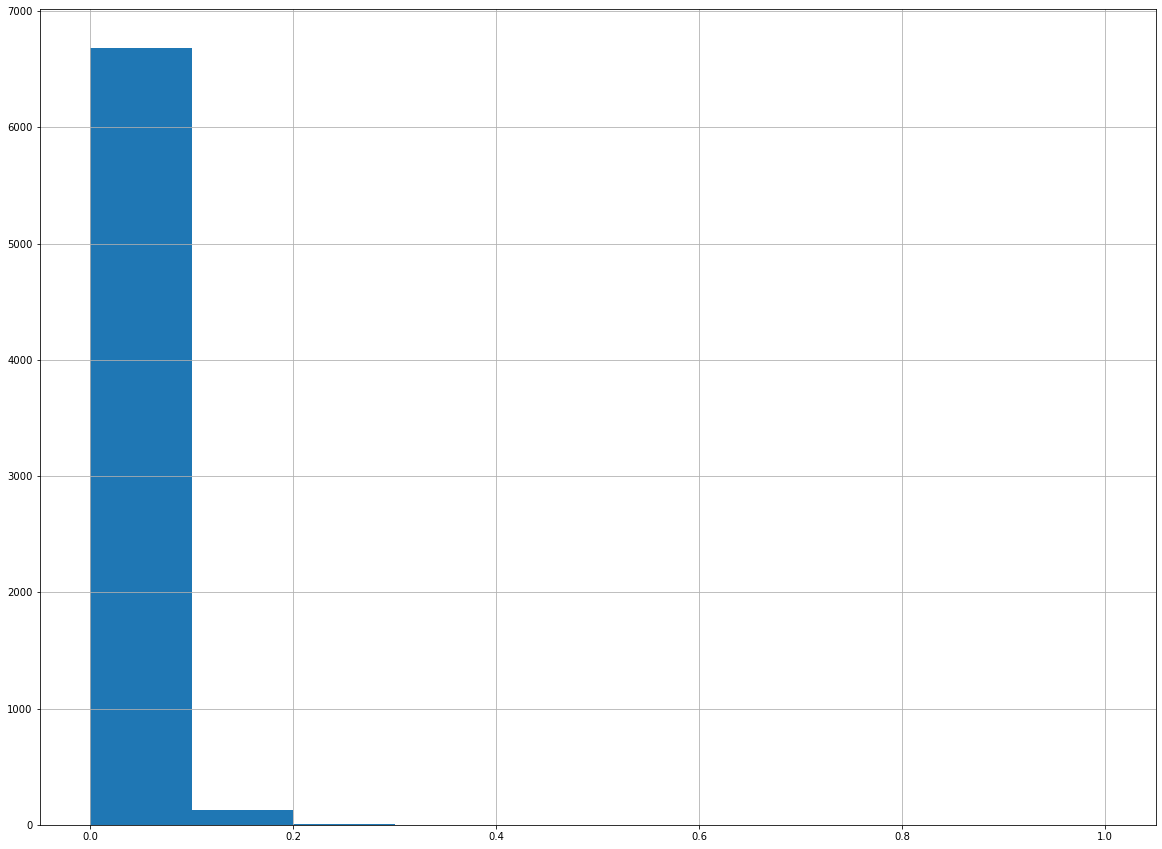

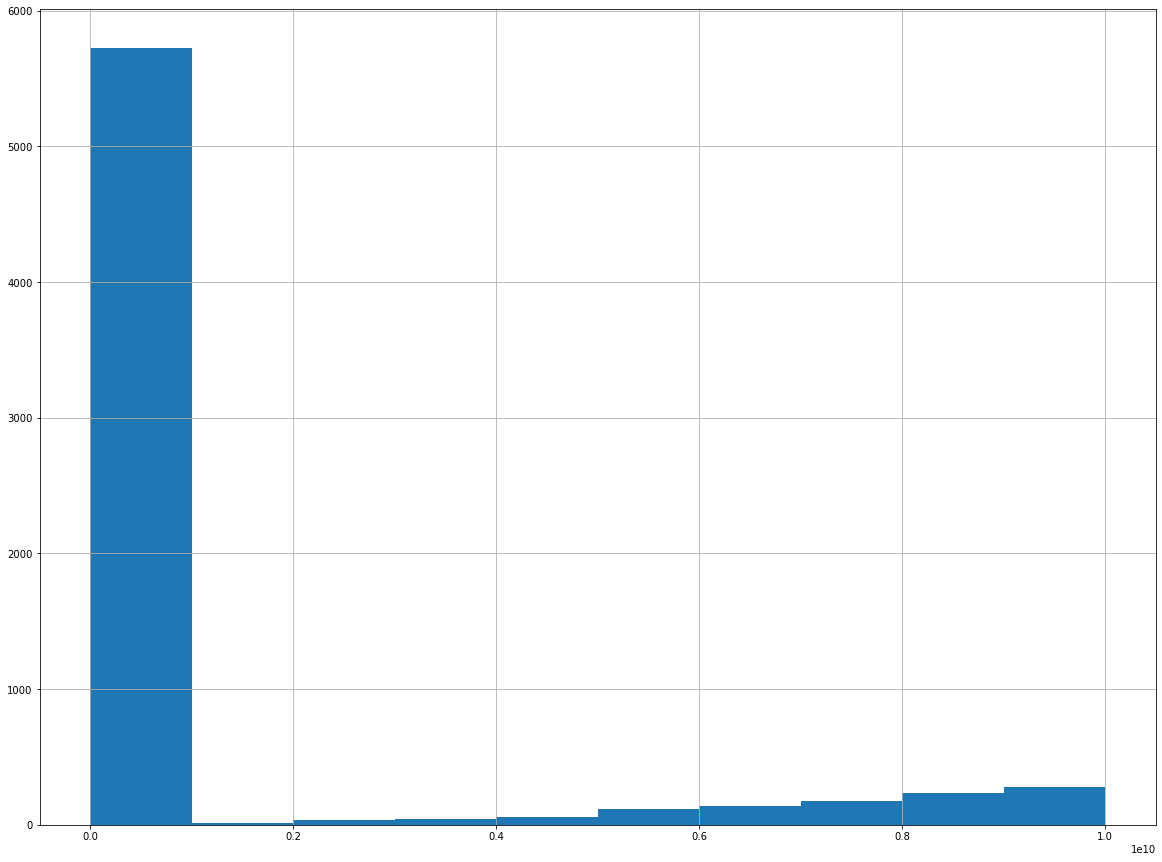

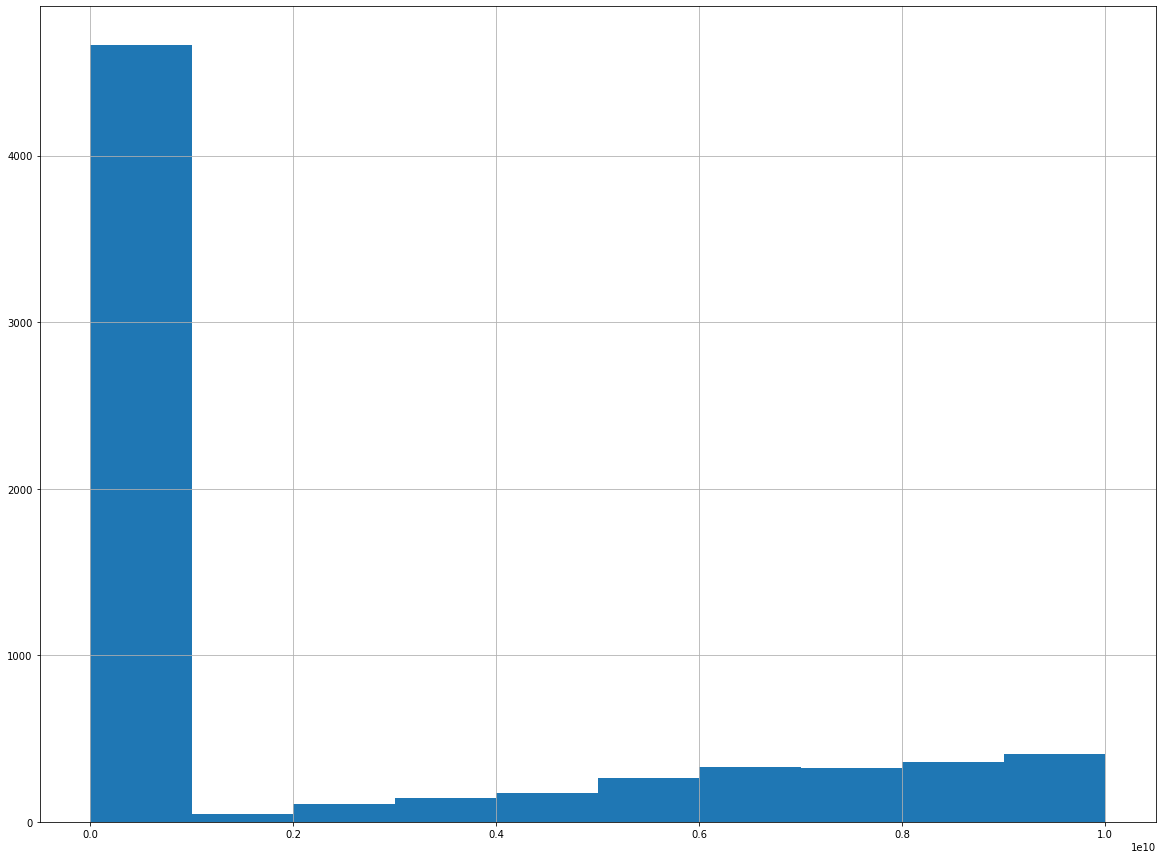

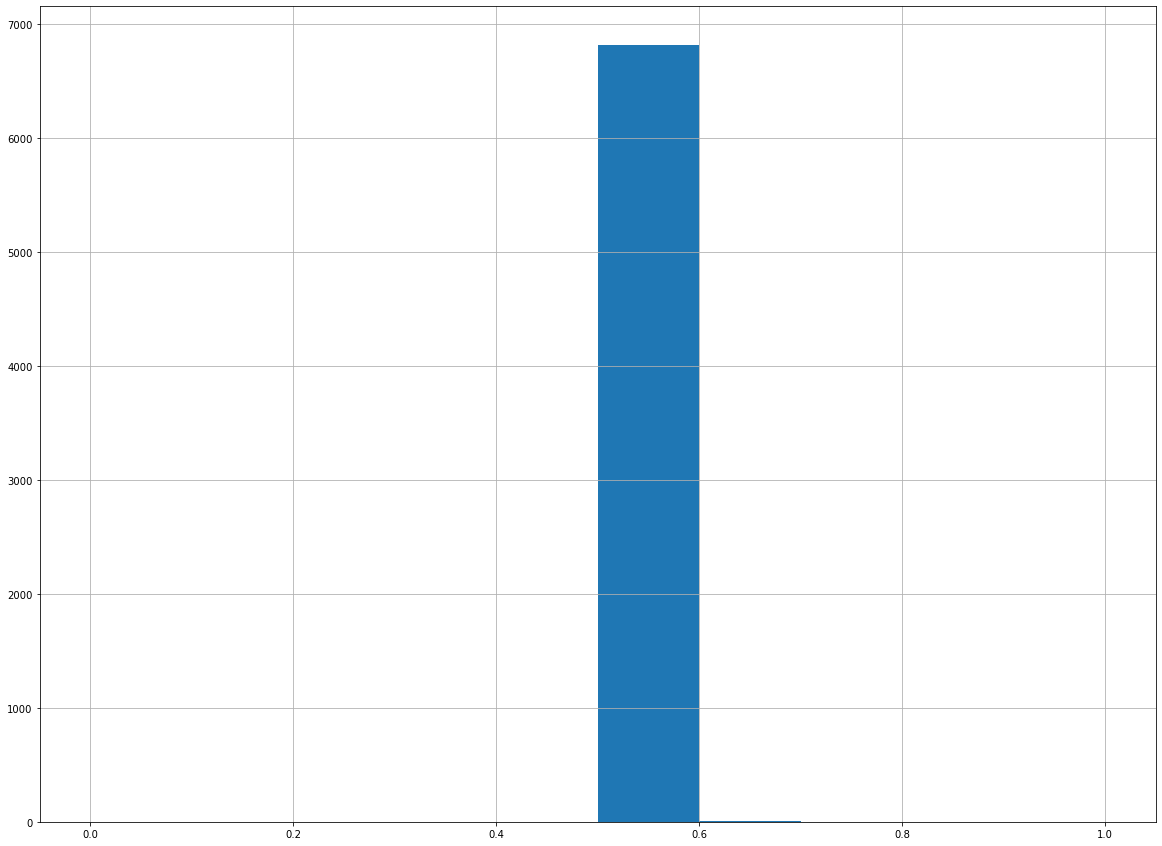

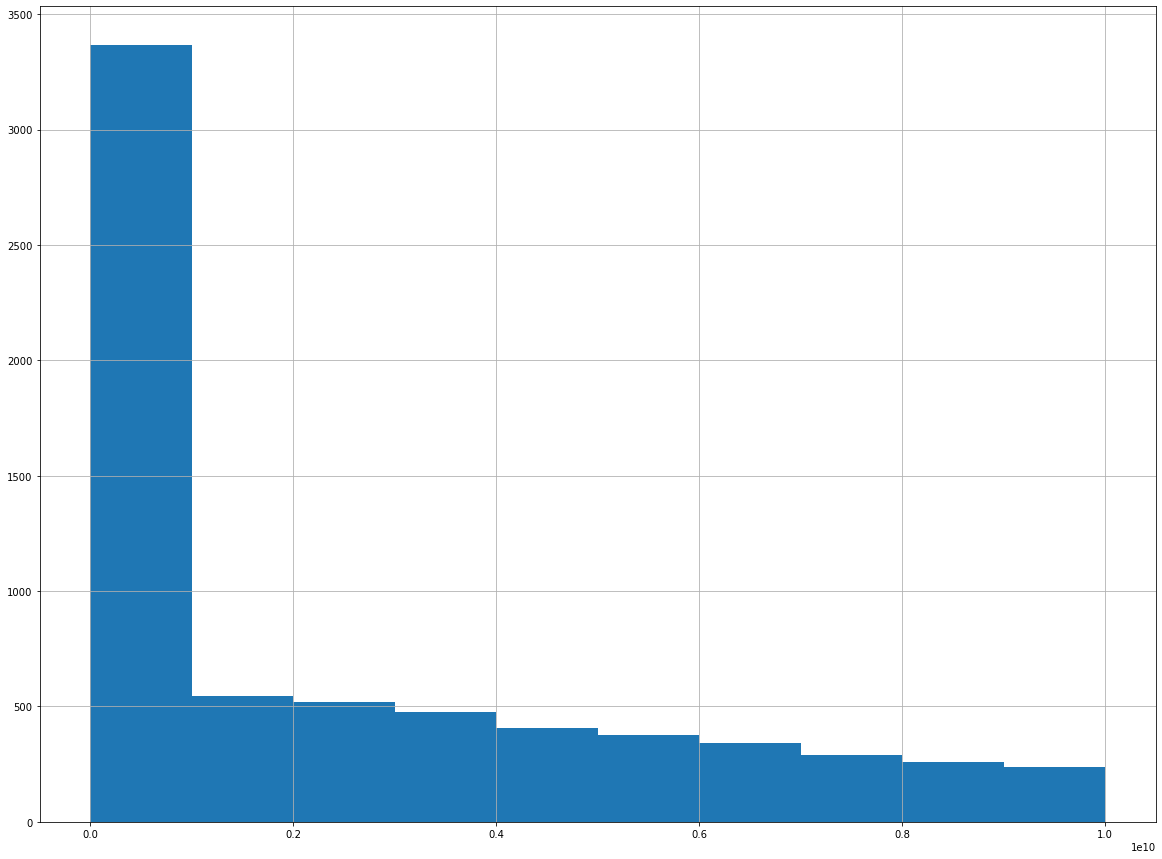

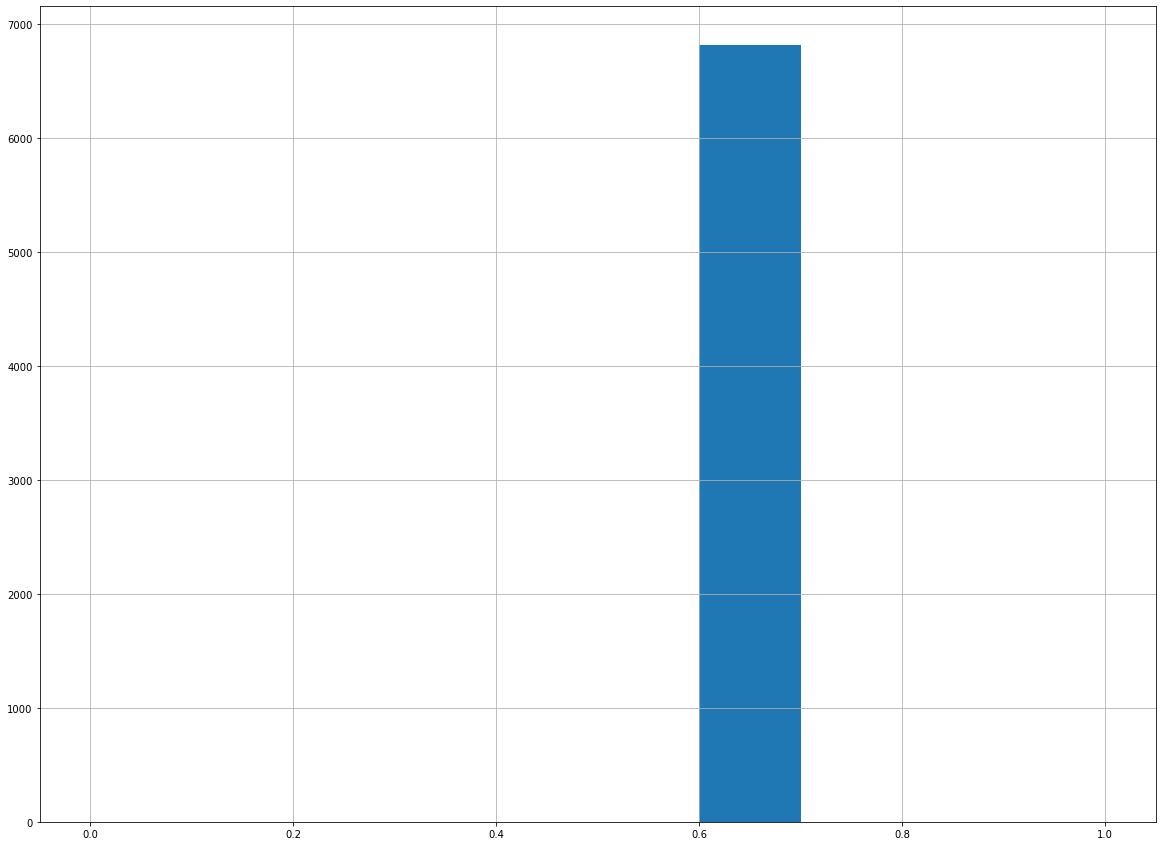

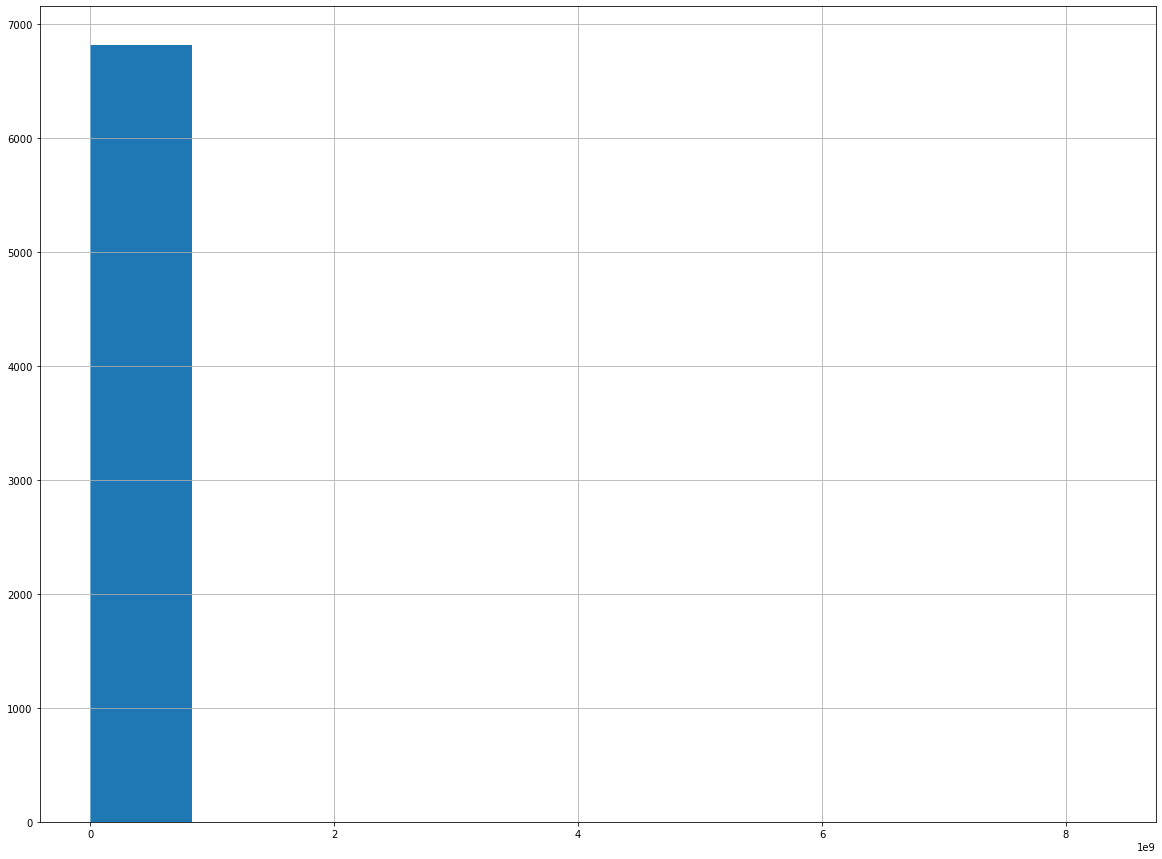

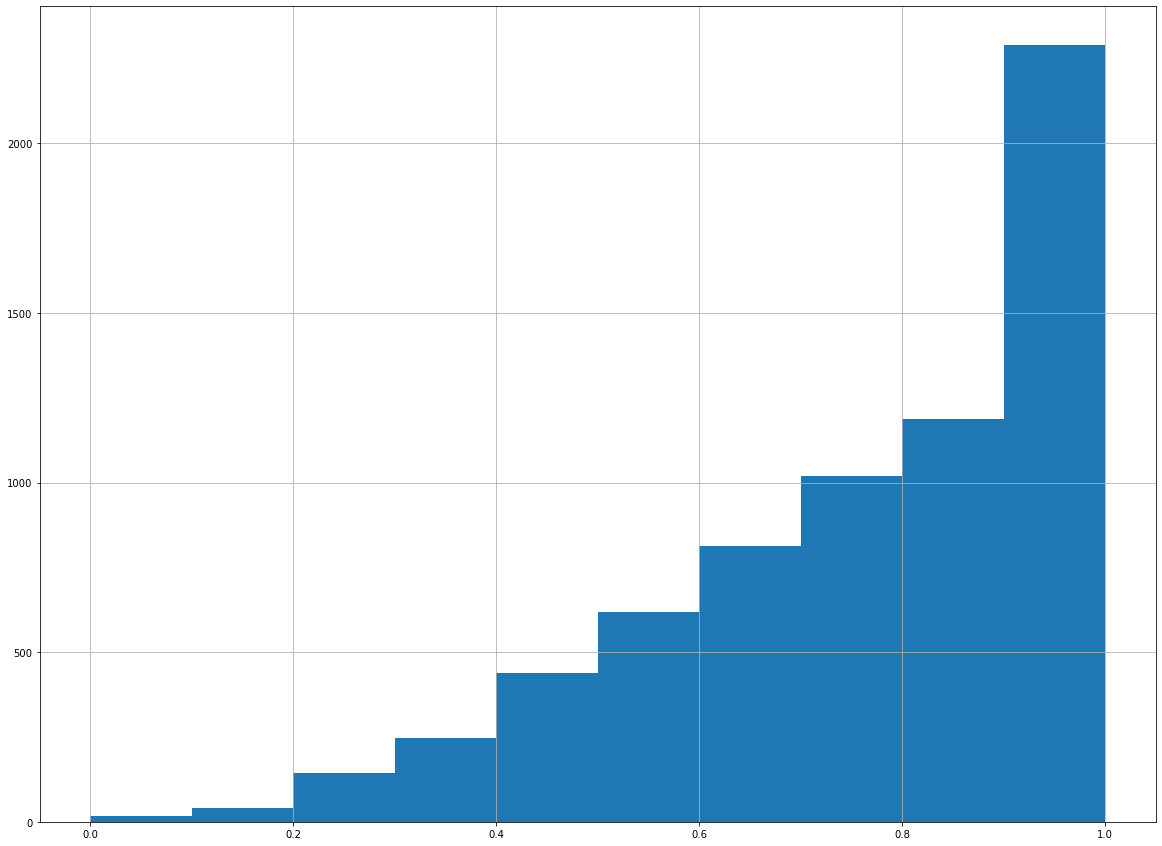

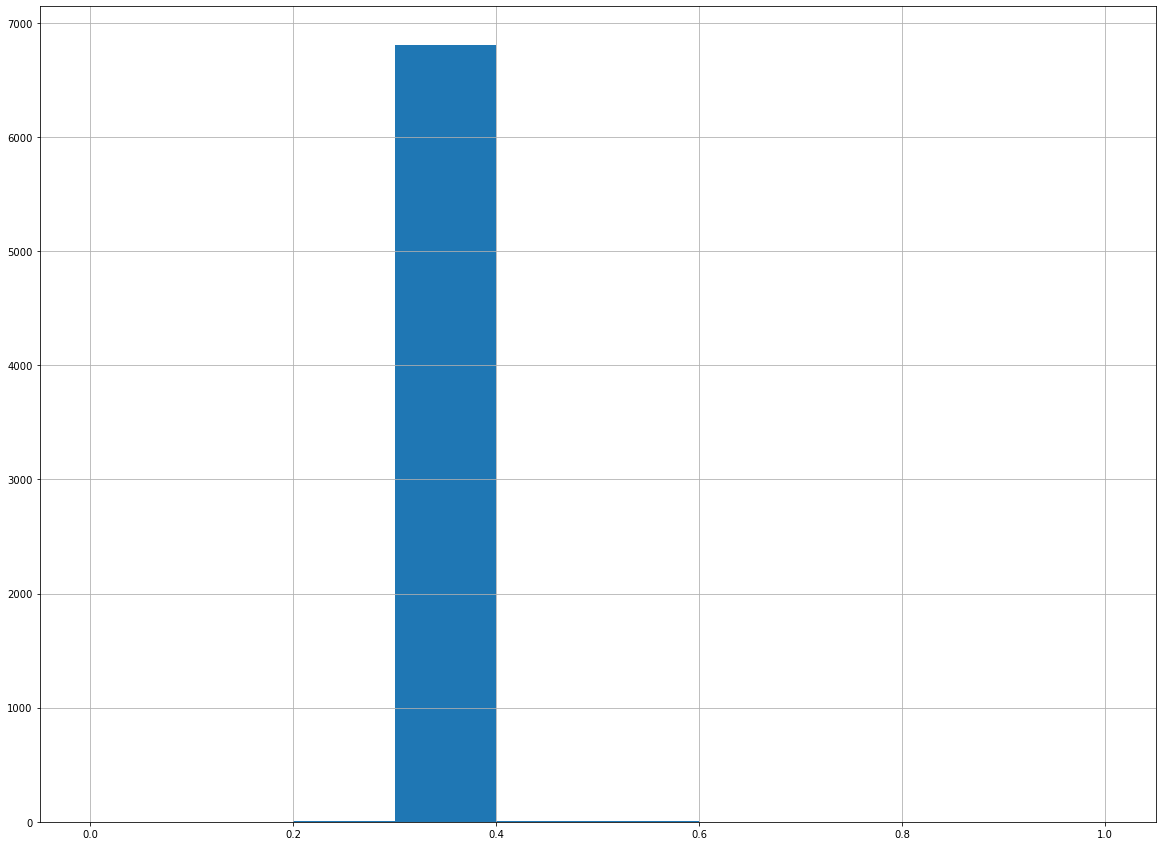

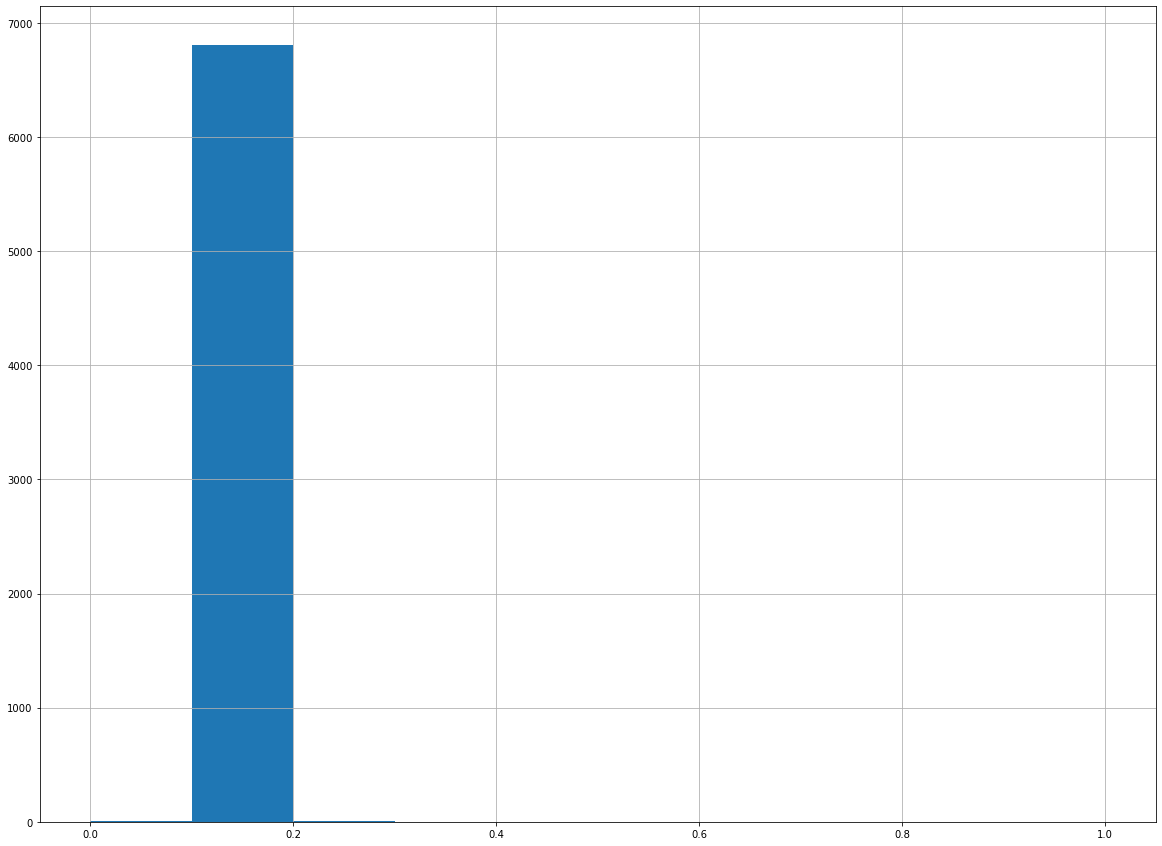

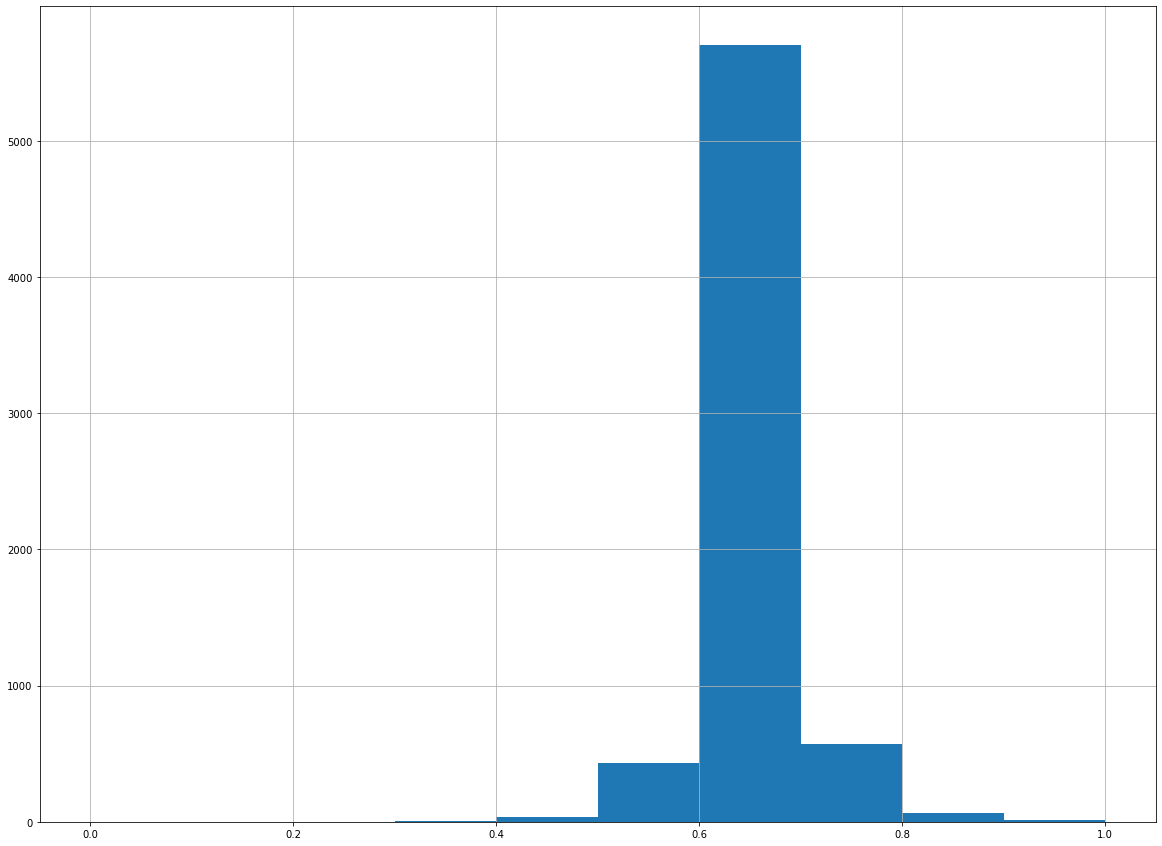

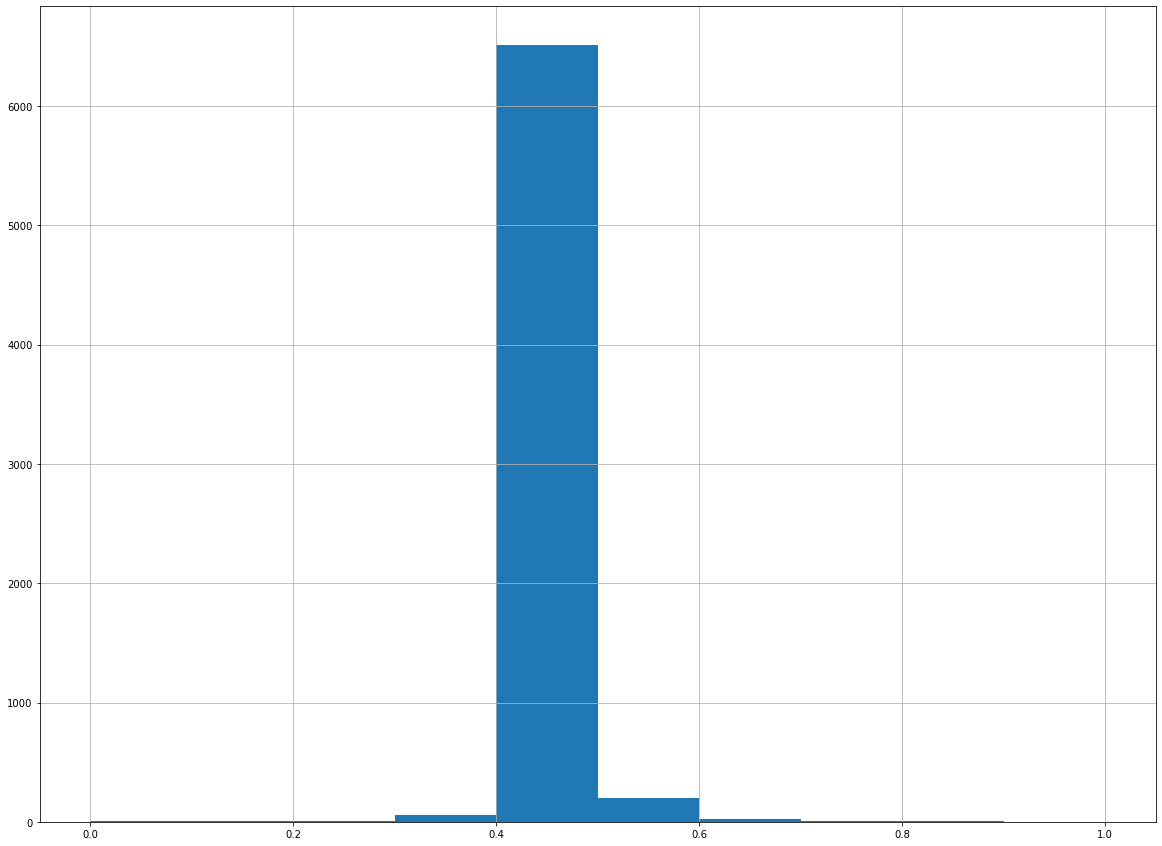

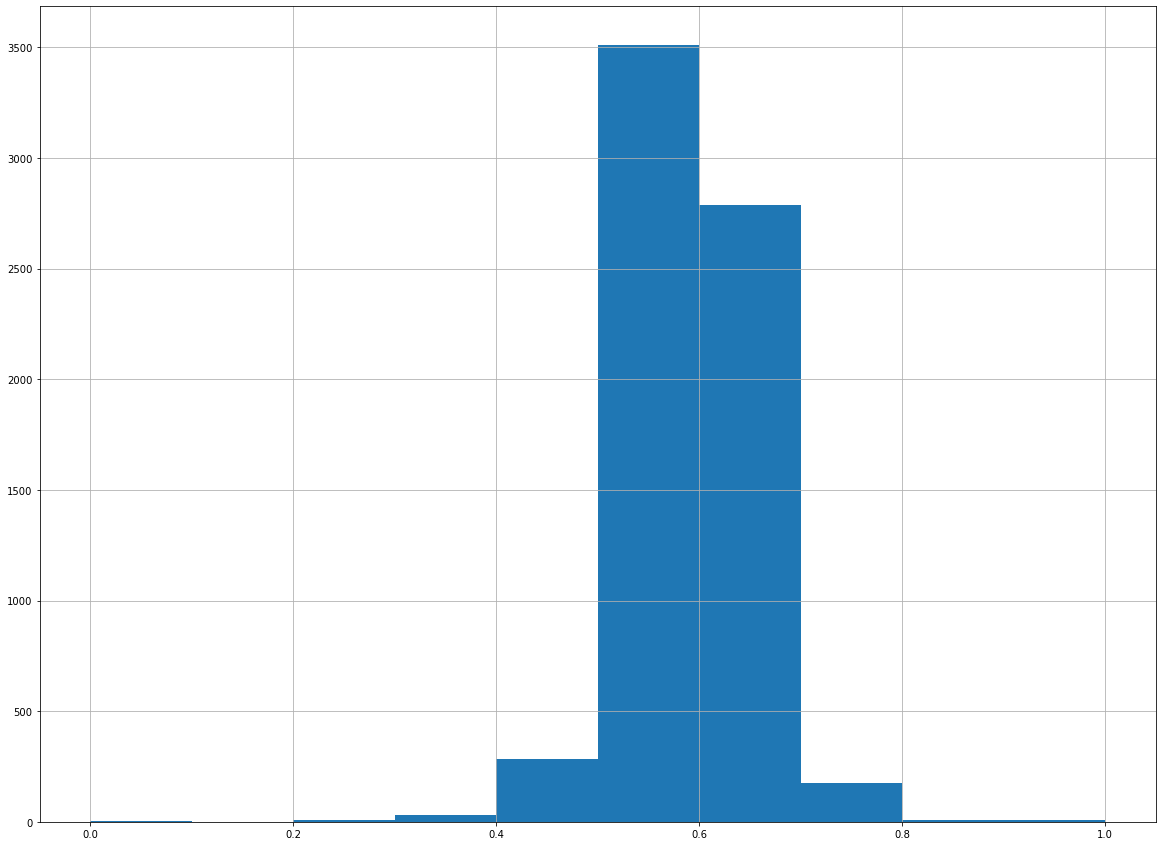

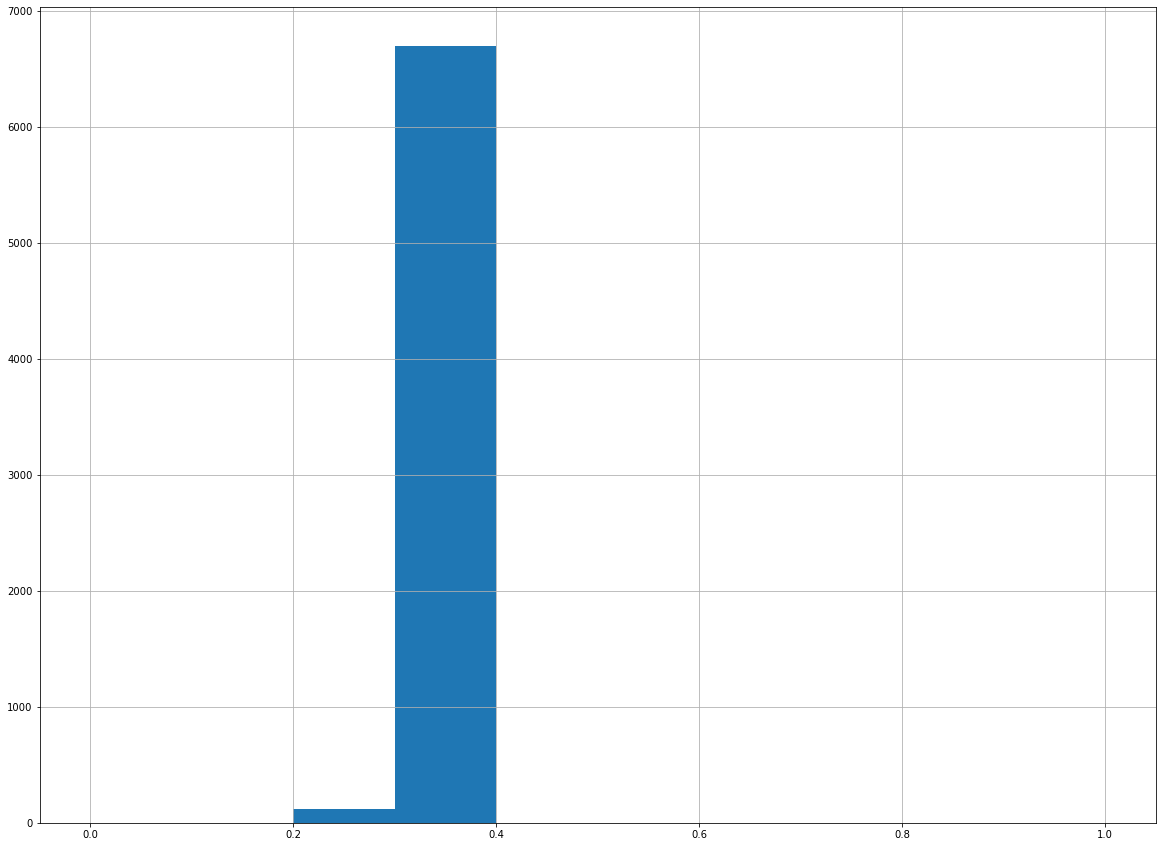

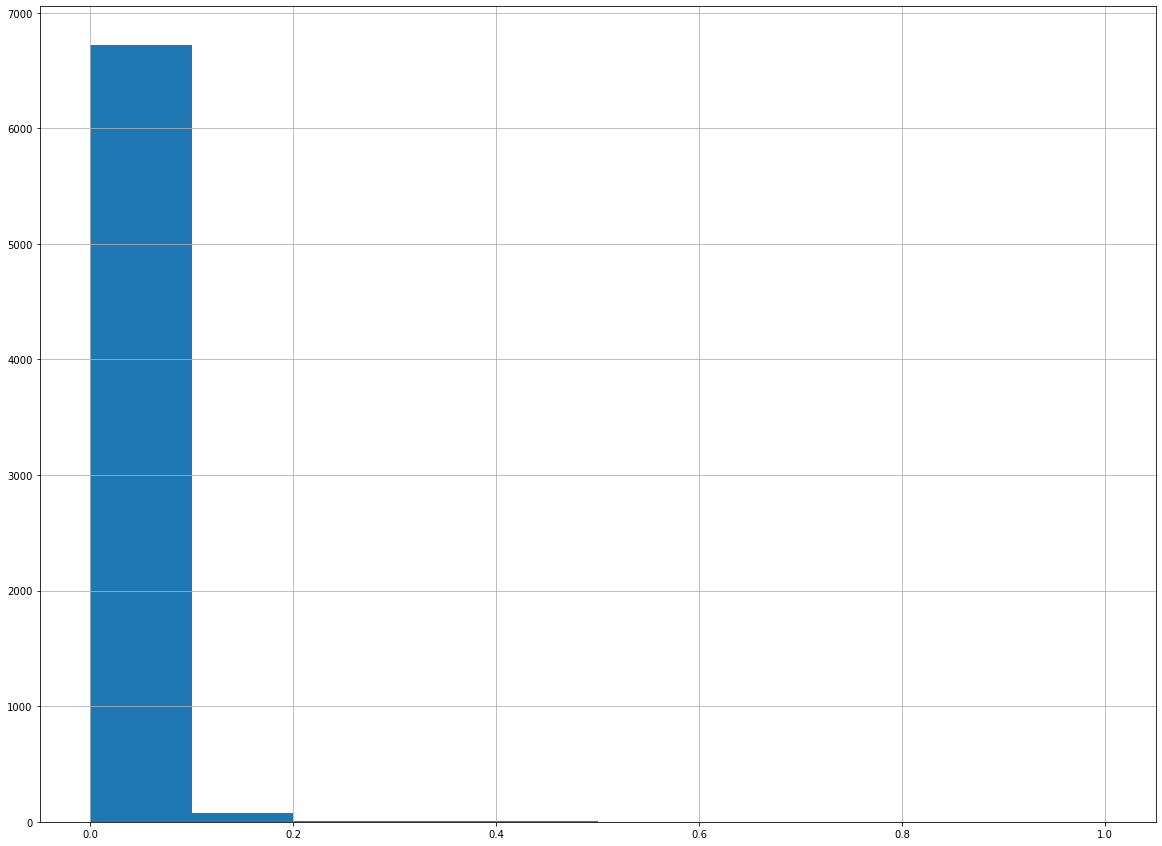

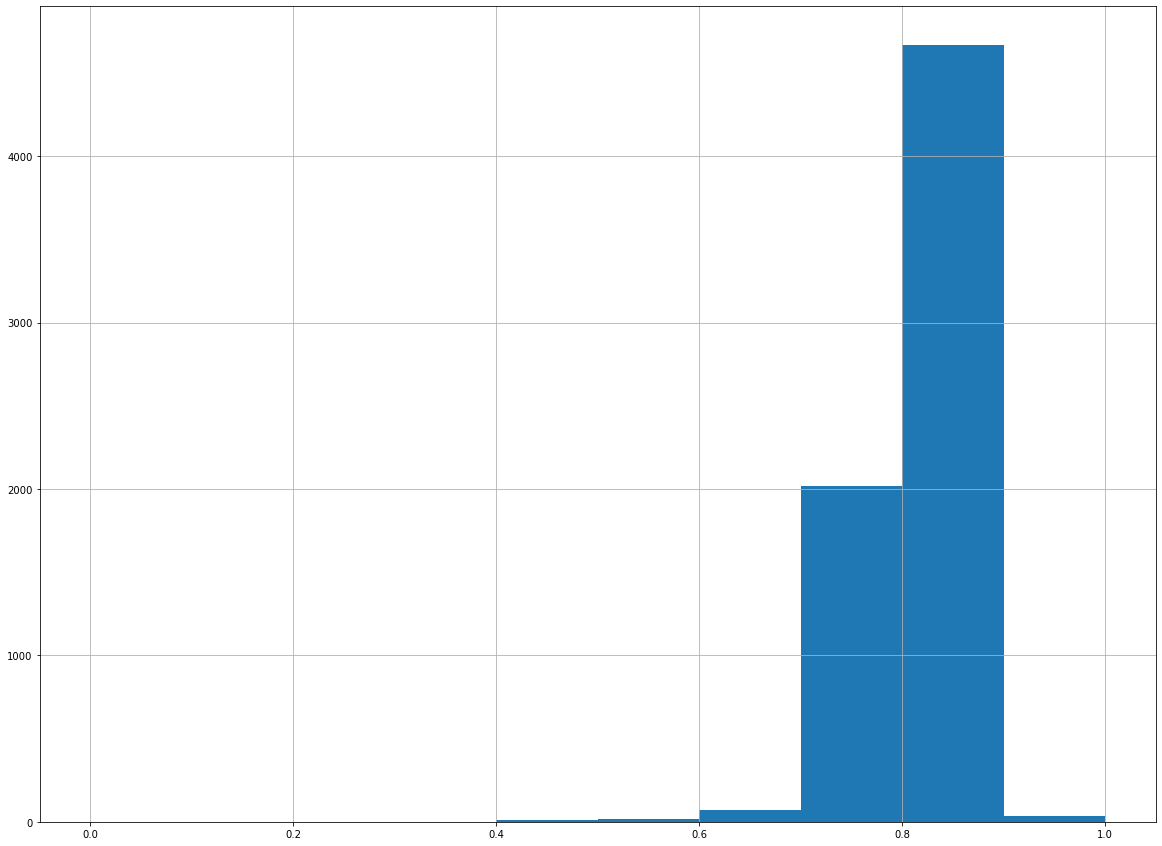

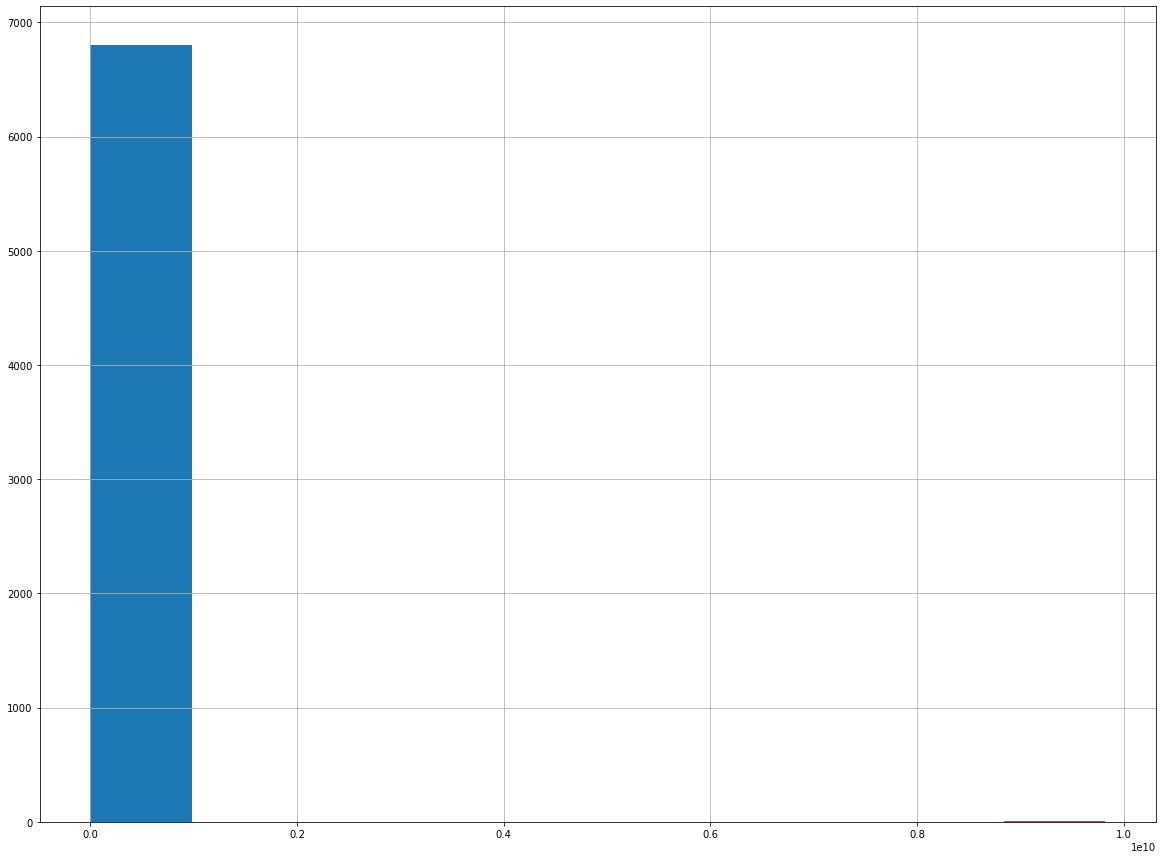

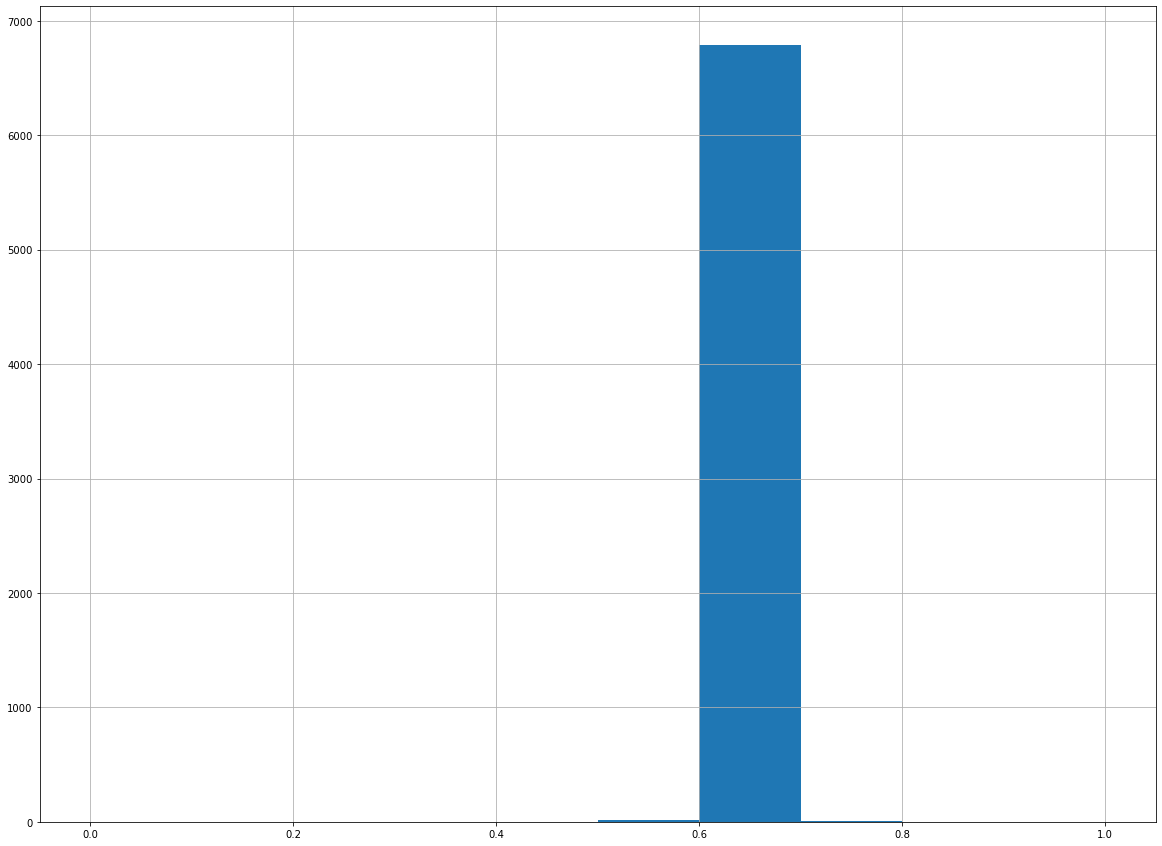

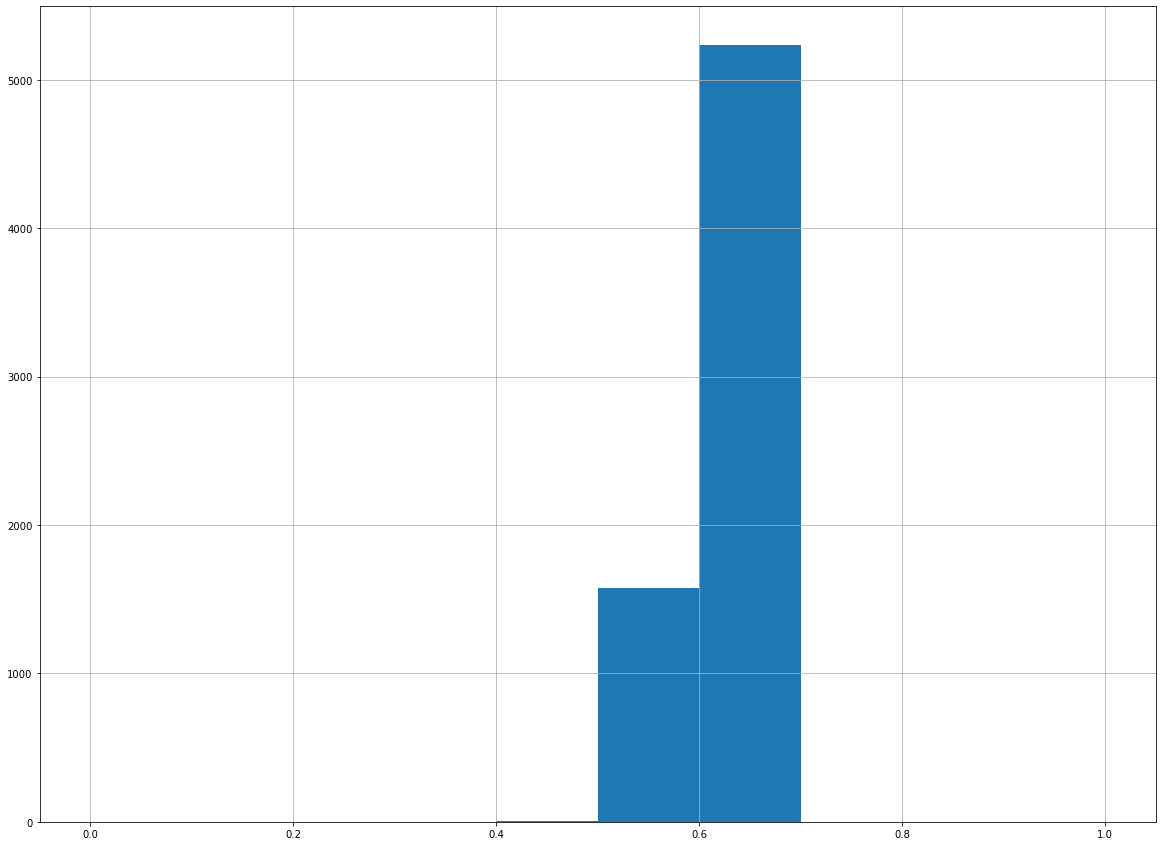

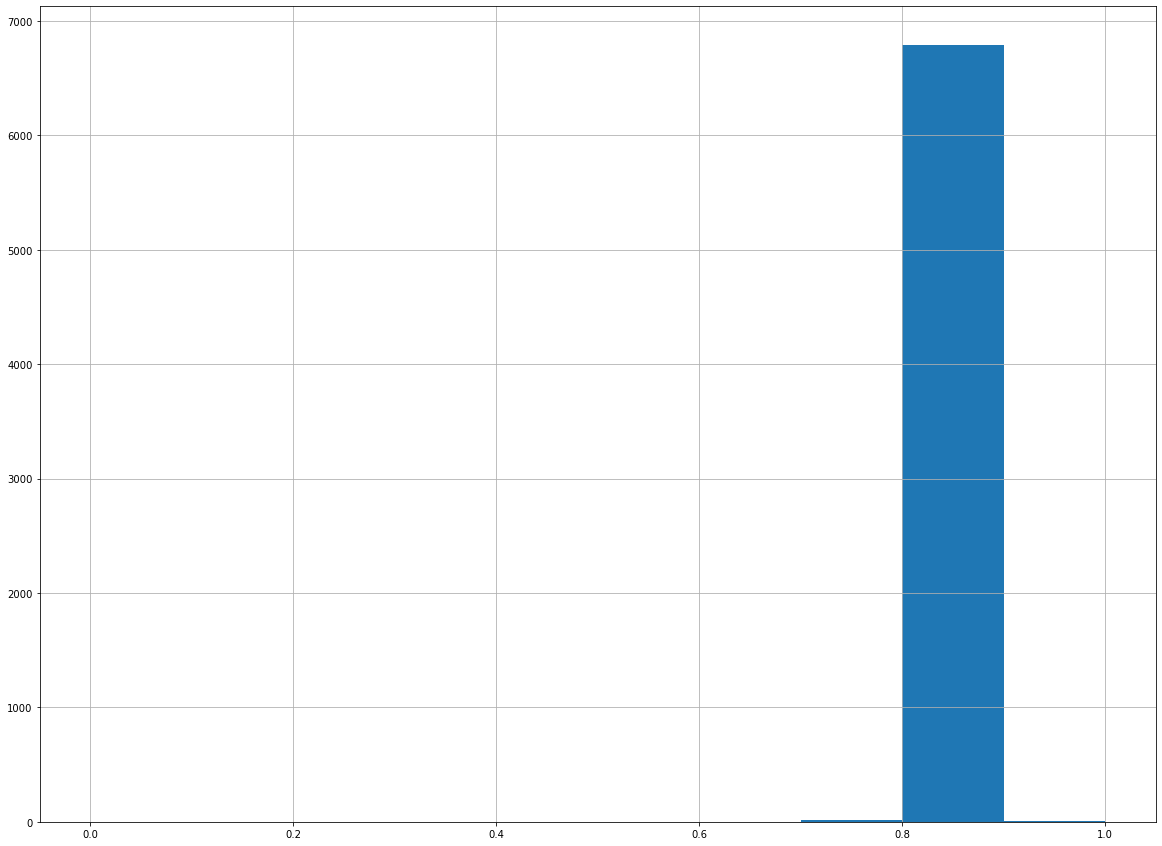

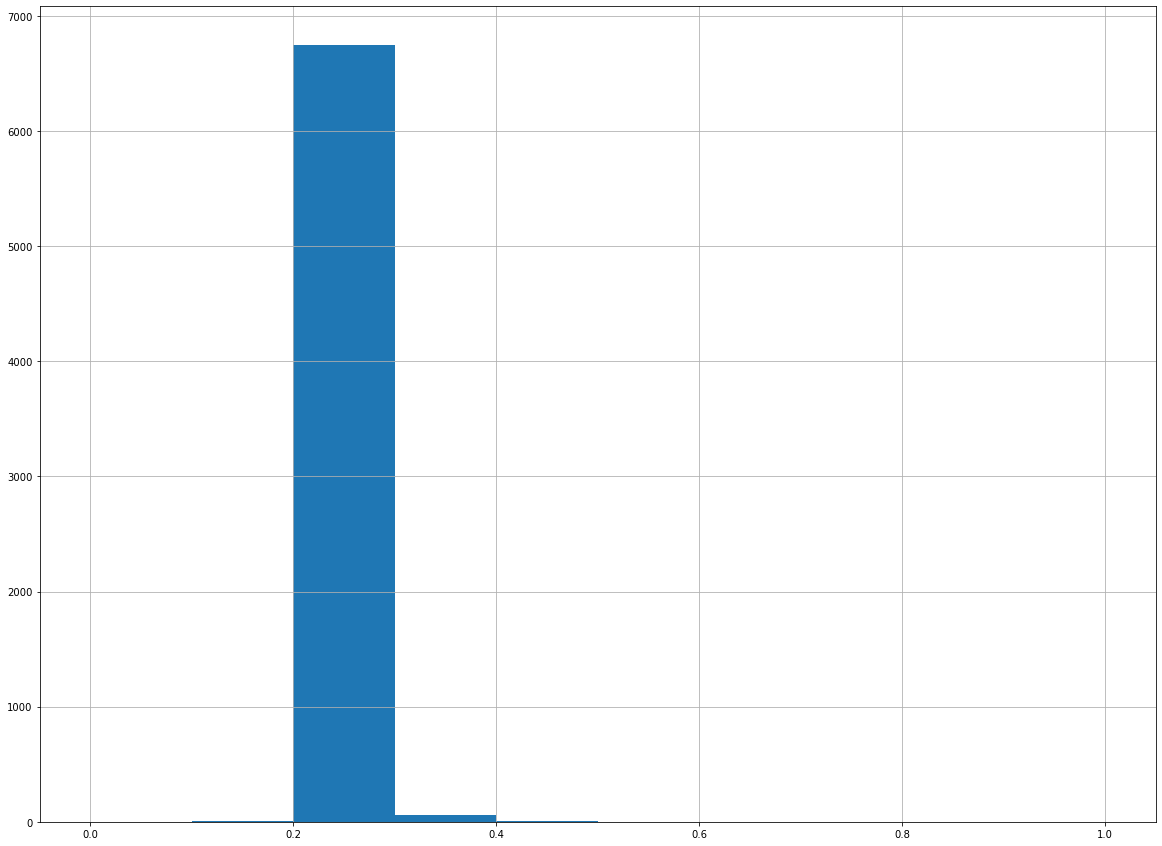

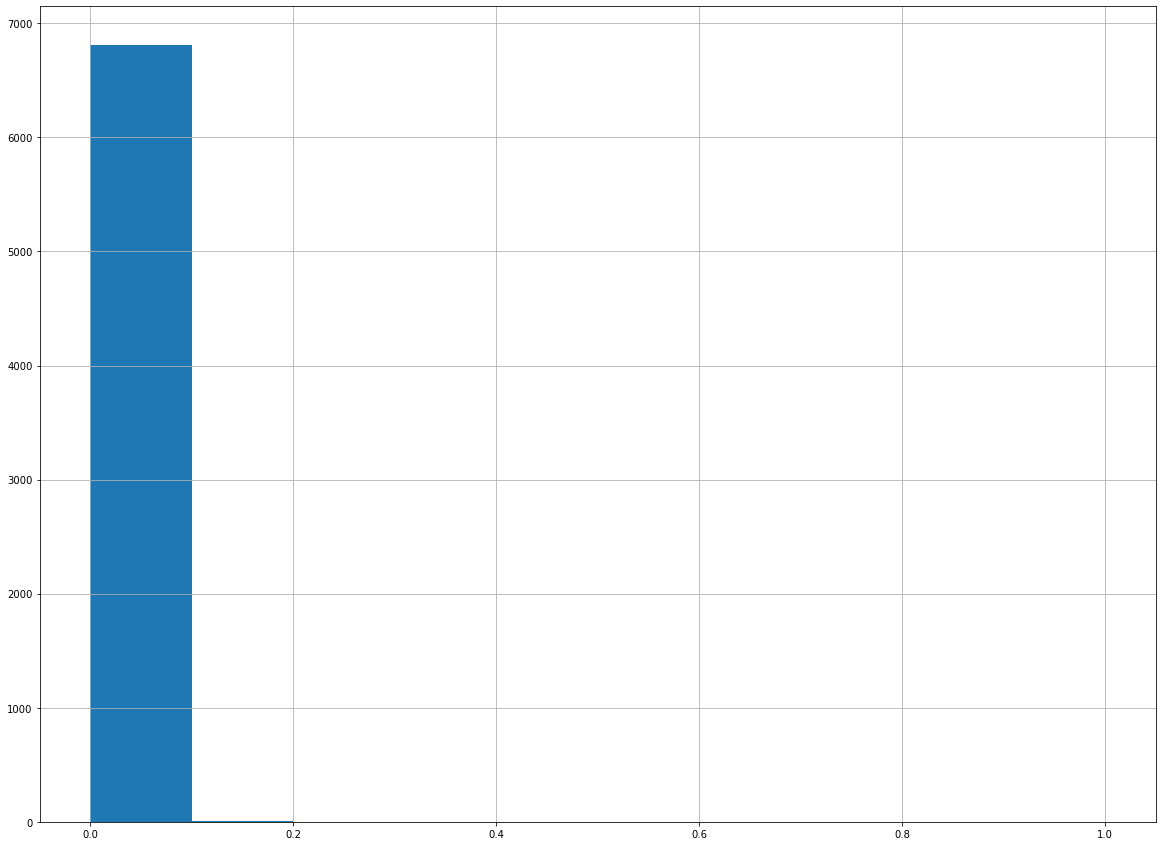

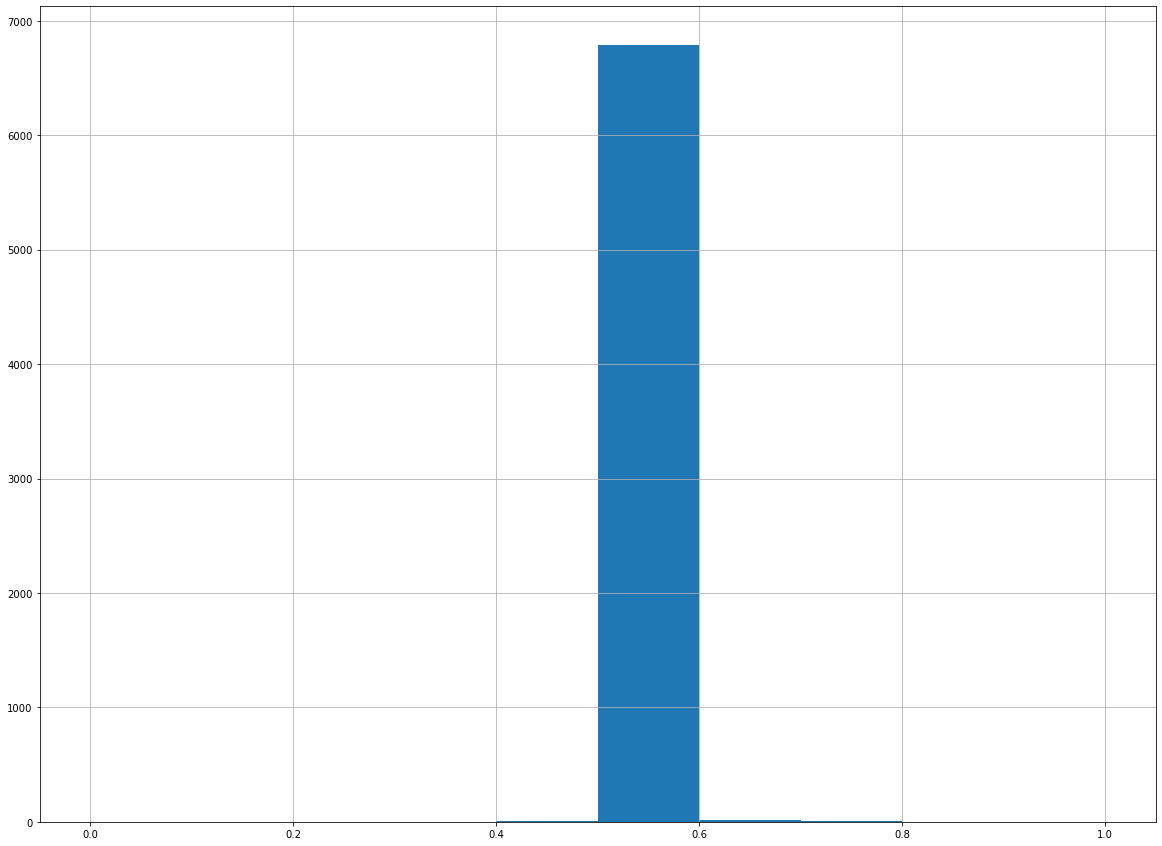

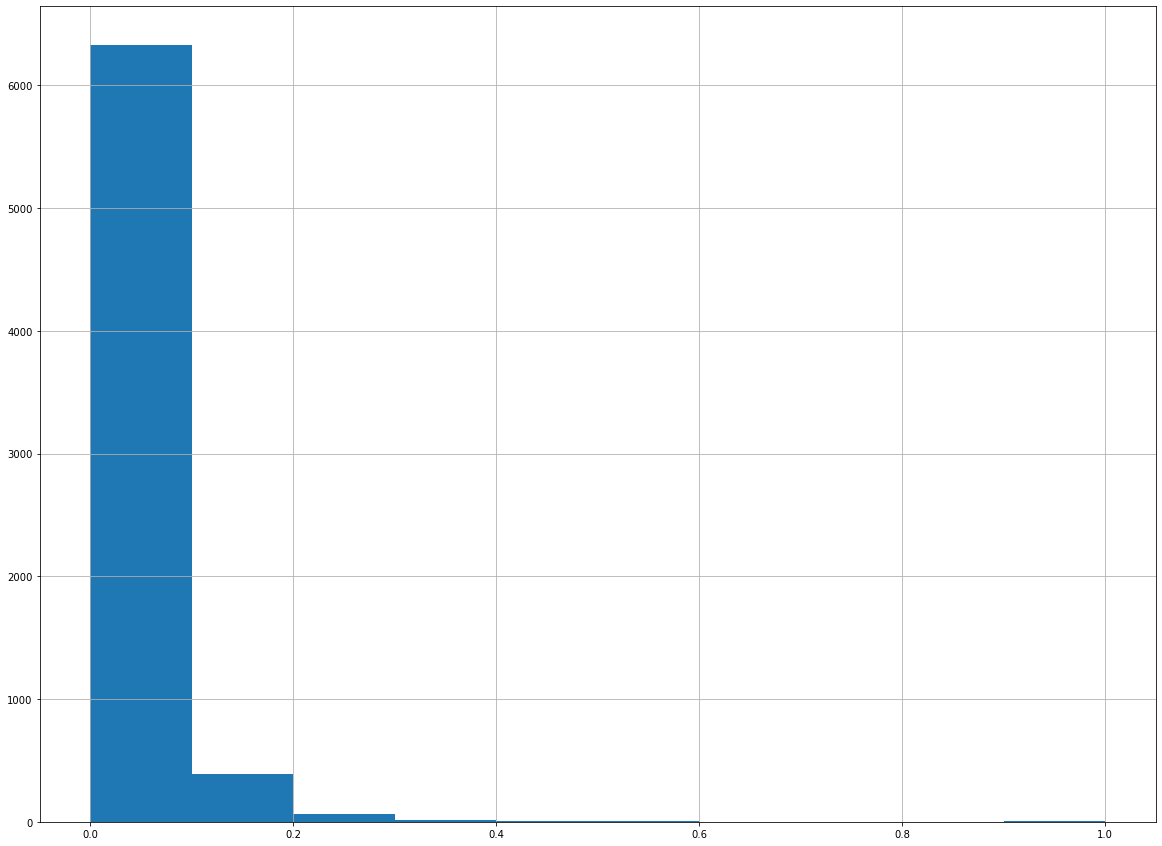

In [8]:
for column in dataset.columns:
    if str(dataset[str(column)].dtypes) == 'float64':
        dataset[str(column)].hist(figsize=(20,15))
        plt.show()

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [9]:
X = dataset.drop("Bankrupt?", axis = 'columns')
y = dataset['Bankrupt?']

In [10]:
normalized_X_data = preprocessing.normalize(X)

In [11]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(normalized_X_data,y)

In [12]:
y_sm.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3, random_state=42, stratify=y_sm)

In [14]:
import tensorflow as tf
from tensorflow import keras

In [25]:
def NN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(92, input_shape=(95,), activation='relu'),
        keras.layers.Dense(70, activation='relu'),
        keras.layers.Dense(65, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    model.fit(X_train, y_train, epochs=64)

    
    print(model.evaluate(X_test, y_test))    
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [26]:
y_preds = NN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/64
289/289 [==============================] - 0s 708us/step - loss: 0.6191 - accuracy: 0.6622
Epoch 2/64
289/289 [==============================] - 0s 748us/step - loss: 0.4933 - accuracy: 0.7667
Epoch 3/64
289/289 [==============================] - 0s 742us/step - loss: 0.4306 - accuracy: 0.8065
Epoch 4/64
289/289 [==============================] - 0s 734us/step - loss: 0.3896 - accuracy: 0.8325
Epoch 5/64
289/289 [==============================] - 0s 737us/step - loss: 0.3726 - accuracy: 0.8305
Epoch 6/64
289/289 [==============================] - 0s 726us/step - loss: 0.3367 - accuracy: 0.8568
Epoch 7/64
289/289 [==============================] - 0s 710us/step - loss: 0.3168 - accuracy: 0.8625
Epoch 8/64
289/289 [==============================] - 0s 723us/step - loss: 0.2979 - accuracy: 0.8761
Epoch 9/64
289/289 [==============================] - 0s 711us/step - loss: 0.2880 - accuracy: 0.8816
Epoch 10/64
289/289 [==============================] - 0s 729us/step - loss: 0.274

Text(69.0, 0.5, 'Truth')

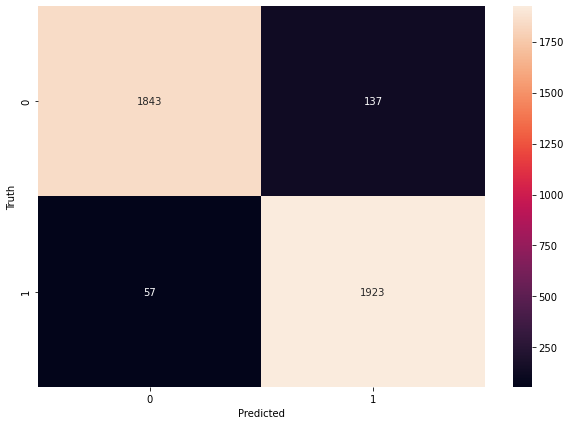

In [58]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')